# Welcome to SImulation of SEctoral Pathways with Uncertainty Exploration for DEcarbonization (SISEPUEDE)

SISEPUEDE is yada yada...


In [1]:
## load packages
import logging
import matplotlib.pyplot as plt
import numpy as np
import os, os.path
import pandas as pd
import temp as tmp
import sisepuede as ssp
from typing import *
import warnings
warnings.filterwarnings("ignore")

##
def _setup_logger(namespace: str, fn_out: Union[str, None] = None) -> None:
    global logger
    
    format_str = "%(asctime)s - %(levelname)s - %(message)s"
    # configure
    if fn_out is not None:
        logging.basicConfig(
            filename = fn_out,
            filemode = "w",
            format = format_str,
            level = logging.DEBUG
        )
    else:
        logging.basicConfig(
            format = format_str,
            level = logging.DEBUG
        )
        
    logger = logging.getLogger(namespace)
    # create console handler and set level to debug
    ch = logging.StreamHandler()
    ch.setLevel(logging.DEBUG)
    # create formatter
    formatter = logging.Formatter(format_str)
    # add formatter to ch
    ch.setFormatter(formatter)
    # add ch to logger
    logger.addHandler(ch)

    return logger

_setup_logger(__name__, os.path.join(os.getcwd(), "log_sisepuede.log"))

/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_attributes.py:1945: UserWarning: Invalid subsector attribute 'key_varreqs_partial'. Valid return type values are:'pycategory_primary', 'abv_subsector', 'sector', 'abv_sector', 'key_varreqs_all'
  warnings.warn(f"Invalid subsector attribute '{return_type}'. Valid return type values are:{valid_rts}")


<Logger __main__ (DEBUG)>

##  Initialize the SISEPUEDE class to get started running some models
- see ``?SISEPUEDE`` for more information on initialization arguments

In [2]:
regions =[
    "argentina",
    #"bahamas",
    #"barbados" - missing in latest?,
    #"belize",
    #"bolivia",
    "brazil",
    "chile",
    "colombia",
    "costa_rica",
    "dominican_republic",
    "ecuador",
    "el_salvador",
    "guatemala",
    #"guyana",
    #"haiti",
    "honduras",
    "jamaica",
    "mexico",
    "nicaragua",
    "panama",
    "paraguay",
    "peru",
    #"suriname",
    #"trinidad_and_tobago",
    "uruguay",
    #"venezuela"
]

In [3]:
sisepuede = ssp.SISEPUEDE(
    "calibrated", 
    logger = logger,
    regions = regions
)


2023-01-27 01:19:53,270 - INFO - Successfully initialized SISEPUEDEFileStructure.
2023-01-27 01:19:53,271 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2023-01-27 01:19:53,271 - INFO - 	Setting export engine to 'sqlite'.
2023-01-27 01:19:53,295 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2023-01-27 01:19:53,296 - INFO - Successfully instantiated table ANALYSIS_METADATA
2023-01-27 01:19:53,298 - WARNING - No index fields found in ATTRIBUTE_DESIGN. Initializing index fields.
2023-01-27 01:19:53,298 - INFO - Successfully instantiated table ATTRIBUTE_DESIGN
2023-01-27 01:19:53,300 - WARNING - No index fields found in ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES. Initializing index fields.
2023-01-27 01:19:53,301 - INFO - Successfully instantiated table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES
2023-01-27 01:19:53,304 - WARNING - No index

###  Call the .project_scenarios() method to write outputs directly to a database (prevents significant memory usage)
- This method returns a list of primary keys that were successfully run
- The first positional argument, ``primary_keys``, can be a list of primary keys *or* a dictionary of scenario dimensions
    - e.g., ``sisepuede.project_scenarios([0, 5, 1989])`` uses 3 primary keys
    - ``sisepuede.project_scenarios({"strategy_id": [0], "future_id": [0, 9, 903]})`` specifies a scenario dimensional subset of primary keys
- see ``?sisepuede.project_scenarios`` for more information on inputs



In [4]:
#sisepuede.attribute_strategy.table


In [4]:
# project across 2 futures for 1 design and, notably, *all* strategies (no filtering)
strats_run = [0] + list(range(3001, 3025)) + [3027]
dict_filt = {
    "future_id": [0],
    "design_id": [0], 
    "strategy_id": strats_run
}
# dict_filt = {
#     "future_id": [1],
#     "design_id": [0], 
#     "strategy_id": [0, 3001]
# }
dict_primary_keys_out = sisepuede.project_scenarios(
    dict_filt,
    chunk_size = 2
)

2023-01-27 01:33:43,580 - INFO - Running AFOLU model
2023-01-27 01:33:43,906 - INFO - AFOLU model run successfully completed
2023-01-27 01:33:43,907 - INFO - Running CircularEconomy model
2023-01-27 01:33:44,009 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:33:44,009 - INFO - Running IPPU model
2023-01-27 01:33:44,108 - INFO - IPPU model run successfully completed
2023-01-27 01:33:44,109 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:33:44,146 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:33:44,273 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:33:44,274 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-27-Jan 01:34:14.104 Started modeling scenario.
2023-27-Jan 01:34:45.624 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-27 01:34:45,877 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-27 01:34:45,901 - INFO - ElectricEnergy model run successfully completed
2023-01-27 01:34:45,976 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:34:45,979 - INFO - Model run for primary_id = 0 successfully completed in 62.4 seconds.
2023-01-27 01:34:45,985 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-27 01:34:46,251 - INFO - AFOLU model run successfully completed
2023-01-27 01:34:46,252 - INFO - Running CircularEconomy model
2023-01-27 01:34:46,330 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:34:46,331 - INFO - Running IPPU model
2023-01-27 01:34:46,435 - INFO - IPPU model run successfully completed
2023-01-27 01:34:46,436 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:34:46,475 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:34:46,630 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:34:46,630 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 01:34:47.584 Started modeling scenario.
2023-27-Jan 01:34:57.941 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:34:58,170 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:34:58,173 - INFO - Model run for primary_id = 5005 successfully completed in 12.19 seconds.
2023-01-27 01:34:58,608 - INFO - Table MODEL_OUTPUT successfully written to database.
2023-01-27 01:34:58,611 - INFO - Running AFOLU model
2023-01-27 01:34:58,863 - INFO - AFOLU model run successfully completed
2023-01-27 01:34:58,864 - INFO - Running CircularEconomy model
2023-01-27 01:34:58,943 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:34:58,944 - INFO - Running IPPU model
2023-01-27 01:34:59,030 - INFO - IPPU model run successfully completed
2023-01-27 01:34:59,031 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:34:59,064 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:34:59,186 - INFO - NonElectricEnergy without F

2023-27-Jan 01:35:00.377 Started modeling scenario.
2023-27-Jan 01:35:11.275 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:35:11,516 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:35:11,519 - INFO - Model run for primary_id = 6006 successfully completed in 12.91 seconds.
2023-01-27 01:35:11,523 - INFO - Running AFOLU model
2023-01-27 01:35:11,852 - INFO - AFOLU model run successfully completed
2023-01-27 01:35:11,852 - INFO - Running CircularEconomy model
2023-01-27 01:35:11,943 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:35:11,947 - INFO - Running IPPU model
2023-01-27 01:35:12,038 - INFO - IPPU model run successfully completed
2023-01-27 01:35:12,039 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:35:12,074 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:35:12,196 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:35:12,196 - INFO - Ru

2023-27-Jan 01:35:13.165 Started modeling scenario.
2023-27-Jan 01:35:23.763 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:35:23,979 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:35:23,982 - INFO - Model run for primary_id = 7007 successfully completed in 12.46 seconds.
2023-01-27 01:35:24,330 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:35:24,334 - INFO - Running AFOLU model
2023-01-27 01:35:24,583 - INFO - AFOLU model run successfully completed
2023-01-27 01:35:24,583 - INFO - Running CircularEconomy model
2023-01-27 01:35:24,669 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:35:24,669 - INFO - Running IPPU model
2023-01-27 01:35:24,761 - INFO - IPPU model run successfully completed
2023-01-27 01:35:24,762 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:35:24,794 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:35:24,923 - INFO - NonElectricEnergy without 

2023-27-Jan 01:35:25.951 Started modeling scenario.
2023-27-Jan 01:35:36.835 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:35:37,061 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:35:37,066 - INFO - Model run for primary_id = 8008 successfully completed in 12.73 seconds.
2023-01-27 01:35:37,071 - INFO - Running AFOLU model
2023-01-27 01:35:37,353 - INFO - AFOLU model run successfully completed
2023-01-27 01:35:37,354 - INFO - Running CircularEconomy model
2023-01-27 01:35:37,435 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:35:37,436 - INFO - Running IPPU model
2023-01-27 01:35:37,527 - INFO - IPPU model run successfully completed
2023-01-27 01:35:37,527 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:35:37,564 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:35:37,690 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:35:37,691 - INFO - Ru

2023-27-Jan 01:35:38.625 Started modeling scenario.
2023-27-Jan 01:35:49.290 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:35:49,528 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:35:49,531 - INFO - Model run for primary_id = 9009 successfully completed in 12.46 seconds.
2023-01-27 01:35:49,879 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:35:49,883 - INFO - Running AFOLU model
2023-01-27 01:35:50,138 - INFO - AFOLU model run successfully completed
2023-01-27 01:35:50,139 - INFO - Running CircularEconomy model
2023-01-27 01:35:50,234 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:35:50,235 - INFO - Running IPPU model
2023-01-27 01:35:50,348 - INFO - IPPU model run successfully completed
2023-01-27 01:35:50,350 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:35:50,389 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:35:50,528 - INFO - NonElectricEnergy without 

2023-27-Jan 01:35:51.450 Started modeling scenario.
2023-27-Jan 01:36:05.671 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:36:05,974 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:36:05,981 - INFO - Model run for primary_id = 10010 successfully completed in 16.1 seconds.
2023-01-27 01:36:06,000 - INFO - Running AFOLU model
2023-01-27 01:36:06,266 - INFO - AFOLU model run successfully completed
2023-01-27 01:36:06,267 - INFO - Running CircularEconomy model
2023-01-27 01:36:06,357 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:36:06,358 - INFO - Running IPPU model
2023-01-27 01:36:06,455 - INFO - IPPU model run successfully completed
2023-01-27 01:36:06,455 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:36:06,491 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:36:06,638 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:36:06,639 - INFO - Ru

2023-27-Jan 01:36:07.869 Started modeling scenario.
2023-27-Jan 01:36:20.459 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:36:20,720 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:36:20,723 - INFO - Model run for primary_id = 11011 successfully completed in 14.72 seconds.
2023-01-27 01:36:21,140 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:36:21,151 - INFO - Running AFOLU model
2023-01-27 01:36:21,442 - INFO - AFOLU model run successfully completed
2023-01-27 01:36:21,443 - INFO - Running CircularEconomy model
2023-01-27 01:36:21,544 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:36:21,545 - INFO - Running IPPU model
2023-01-27 01:36:21,657 - INFO - IPPU model run successfully completed
2023-01-27 01:36:21,657 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:36:21,696 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:36:21,808 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-27 01:36:22,240 - INFO - AFOLU model run successfully completed
2023-01-27 01:36:22,241 - INFO - Running CircularEconomy model
2023-01-27 01:36:22,344 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:36:22,345 - INFO - Running IPPU model
2023-01-27 01:36:22,449 - INFO - IPPU model run successfully completed
2023-01-27 01:36:22,452 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:36:22,489 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:36:22,624 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:36:22,625 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 01:36:24.163 Started modeling scenario.
2023-27-Jan 01:36:37.727 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:36:37,953 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:36:37,956 - INFO - Model run for primary_id = 13013 successfully completed in 16.04 seconds.
2023-01-27 01:36:38,364 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:36:38,397 - INFO - Running AFOLU model
2023-01-27 01:36:38,648 - INFO - AFOLU model run successfully completed
2023-01-27 01:36:38,649 - INFO - Running CircularEconomy model
2023-01-27 01:36:38,725 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:36:38,725 - INFO - Running IPPU model
2023-01-27 01:36:38,807 - INFO - IPPU model run successfully completed
2023-01-27 01:36:38,808 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:36:38,839 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:36:38,955 - INFO - NonElectricEnergy without

2023-27-Jan 01:36:39.873 Started modeling scenario.
2023-27-Jan 01:36:52.106 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:36:52,356 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:36:52,359 - INFO - Model run for primary_id = 14014 successfully completed in 13.96 seconds.
2023-01-27 01:36:52,370 - INFO - Running AFOLU model
2023-01-27 01:36:52,641 - INFO - AFOLU model run successfully completed
2023-01-27 01:36:52,642 - INFO - Running CircularEconomy model
2023-01-27 01:36:52,730 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:36:52,731 - INFO - Running IPPU model
2023-01-27 01:36:52,840 - INFO - IPPU model run successfully completed
2023-01-27 01:36:52,841 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:36:52,884 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:36:53,030 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:36:53,030 - INFO - R

2023-27-Jan 01:36:54.359 Started modeling scenario.
2023-27-Jan 01:37:06.905 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:37:07,146 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:37:07,149 - INFO - Model run for primary_id = 15015 successfully completed in 14.78 seconds.
2023-01-27 01:37:07,505 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:37:07,520 - INFO - Running AFOLU model
2023-01-27 01:37:07,760 - INFO - AFOLU model run successfully completed
2023-01-27 01:37:07,760 - INFO - Running CircularEconomy model
2023-01-27 01:37:07,836 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:37:07,836 - INFO - Running IPPU model
2023-01-27 01:37:07,919 - INFO - IPPU model run successfully completed
2023-01-27 01:37:07,920 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:37:07,950 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:37:08,070 - INFO - NonElectricEnergy without

2023-27-Jan 01:37:09.004 Started modeling scenario.
2023-27-Jan 01:37:20.749 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:37:20,994 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:37:20,998 - INFO - Model run for primary_id = 16016 successfully completed in 13.48 seconds.
2023-01-27 01:37:21,011 - INFO - Running AFOLU model
2023-01-27 01:37:21,270 - INFO - AFOLU model run successfully completed
2023-01-27 01:37:21,271 - INFO - Running CircularEconomy model
2023-01-27 01:37:21,346 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:37:21,347 - INFO - Running IPPU model
2023-01-27 01:37:21,437 - INFO - IPPU model run successfully completed
2023-01-27 01:37:21,440 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:37:21,474 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:37:21,609 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:37:21,609 - INFO - R

2023-27-Jan 01:37:22.646 Started modeling scenario.
2023-27-Jan 01:37:35.636 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-27 01:37:35,847 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-27 01:37:35,869 - INFO - ElectricEnergy model run successfully completed
2023-01-27 01:37:35,951 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:37:35,954 - INFO - Model run for primary_id = 17017 successfully completed in 14.94 seconds.



	Running Energy (Fugitive Emissions)


2023-01-27 01:37:36,473 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:37:36,485 - INFO - Running AFOLU model
2023-01-27 01:37:36,786 - INFO - AFOLU model run successfully completed
2023-01-27 01:37:36,786 - INFO - Running CircularEconomy model
2023-01-27 01:37:36,888 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:37:36,889 - INFO - Running IPPU model
2023-01-27 01:37:36,986 - INFO - IPPU model run successfully completed
2023-01-27 01:37:36,988 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:37:37,034 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:37:37,194 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:37:37,196 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-27-Jan 01:37:38.470 Started modeling scenario.
2023-27-Jan 01:37:50.581 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:37:50,843 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:37:50,847 - INFO - Model run for primary_id = 18018 successfully completed in 14.36 seconds.
2023-01-27 01:37:50,860 - INFO - Running AFOLU model
2023-01-27 01:37:51,118 - INFO - AFOLU model run successfully completed
2023-01-27 01:37:51,120 - INFO - Running CircularEconomy model
2023-01-27 01:37:51,208 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:37:51,209 - INFO - Running IPPU model
2023-01-27 01:37:51,300 - INFO - IPPU model run successfully completed
2023-01-27 01:37:51,300 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:37:51,335 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:37:51,458 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:37:51,459 - INFO - R

2023-27-Jan 01:37:52.502 Started modeling scenario.
2023-27-Jan 01:38:03.231 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:38:03,454 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:38:03,457 - INFO - Model run for primary_id = 19019 successfully completed in 12.6 seconds.
2023-01-27 01:38:13,802 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:38:13,811 - INFO - Running AFOLU model
2023-01-27 01:38:14,074 - INFO - AFOLU model run successfully completed
2023-01-27 01:38:14,075 - INFO - Running CircularEconomy model
2023-01-27 01:38:14,157 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:38:14,157 - INFO - Running IPPU model
2023-01-27 01:38:14,239 - INFO - IPPU model run successfully completed
2023-01-27 01:38:14,240 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:38:14,273 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:38:14,389 - INFO - NonElectricEnergy without 

2023-27-Jan 01:38:15.570 Started modeling scenario.
2023-27-Jan 01:38:42.441 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-27 01:38:42,737 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-27 01:38:42,833 - INFO - ElectricEnergy model run successfully completed
2023-01-27 01:38:42,910 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:38:42,916 - INFO - Model run for primary_id = 20020 successfully completed in 29.11 seconds.
2023-01-27 01:38:42,942 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-27 01:38:43,275 - INFO - AFOLU model run successfully completed
2023-01-27 01:38:43,279 - INFO - Running CircularEconomy model
2023-01-27 01:38:43,375 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:38:43,375 - INFO - Running IPPU model
2023-01-27 01:38:43,479 - INFO - IPPU model run successfully completed
2023-01-27 01:38:43,480 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:38:43,514 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:38:43,652 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:38:43,653 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 01:38:44.846 Started modeling scenario.
2023-27-Jan 01:38:56.154 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:38:56,406 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:38:56,409 - INFO - Model run for primary_id = 21021 successfully completed in 13.47 seconds.
2023-01-27 01:38:56,966 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:38:56,984 - INFO - Running AFOLU model
2023-01-27 01:38:57,227 - INFO - AFOLU model run successfully completed
2023-01-27 01:38:57,228 - INFO - Running CircularEconomy model
2023-01-27 01:38:57,315 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:38:57,316 - INFO - Running IPPU model
2023-01-27 01:38:57,407 - INFO - IPPU model run successfully completed
2023-01-27 01:38:57,408 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:38:57,444 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:38:57,570 - INFO - NonElectricEnergy without

2023-27-Jan 01:38:58.543 Started modeling scenario.
2023-27-Jan 01:39:09.757 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:39:09,971 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:39:09,974 - INFO - Model run for primary_id = 22022 successfully completed in 12.99 seconds.
2023-01-27 01:39:09,992 - INFO - Running AFOLU model
2023-01-27 01:39:10,319 - INFO - AFOLU model run successfully completed
2023-01-27 01:39:10,320 - INFO - Running CircularEconomy model
2023-01-27 01:39:10,405 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:39:10,405 - INFO - Running IPPU model
2023-01-27 01:39:10,492 - INFO - IPPU model run successfully completed
2023-01-27 01:39:10,492 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:39:10,526 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:39:10,644 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:39:10,644 - INFO - R

2023-27-Jan 01:39:11.878 Started modeling scenario.
2023-27-Jan 01:39:23.338 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:39:23,577 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:39:23,581 - INFO - Model run for primary_id = 23023 successfully completed in 13.59 seconds.
2023-01-27 01:39:23,956 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:39:23,971 - INFO - Running AFOLU model
2023-01-27 01:39:24,213 - INFO - AFOLU model run successfully completed
2023-01-27 01:39:24,214 - INFO - Running CircularEconomy model
2023-01-27 01:39:24,296 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:39:24,297 - INFO - Running IPPU model
2023-01-27 01:39:24,389 - INFO - IPPU model run successfully completed
2023-01-27 01:39:24,390 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:39:24,423 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:39:24,545 - INFO - NonElectricEnergy without

2023-27-Jan 01:39:25.748 Started modeling scenario.
2023-27-Jan 01:39:37.632 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:39:37,892 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:39:37,895 - INFO - Model run for primary_id = 24024 successfully completed in 13.92 seconds.
2023-01-27 01:39:37,903 - INFO - Running AFOLU model
2023-01-27 01:39:38,165 - INFO - AFOLU model run successfully completed
2023-01-27 01:39:38,166 - INFO - Running CircularEconomy model
2023-01-27 01:39:38,257 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:39:38,258 - INFO - Running IPPU model
2023-01-27 01:39:38,354 - INFO - IPPU model run successfully completed
2023-01-27 01:39:38,357 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:39:38,392 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:39:38,519 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:39:38,520 - INFO - R

2023-27-Jan 01:39:39.462 Started modeling scenario.
2023-27-Jan 01:39:50.285 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:39:50,553 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:39:50,557 - INFO - Model run for primary_id = 25025 successfully completed in 12.65 seconds.
2023-01-27 01:39:50,944 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:39:50,961 - INFO - Running AFOLU model
2023-01-27 01:39:51,230 - INFO - AFOLU model run successfully completed
2023-01-27 01:39:51,230 - INFO - Running CircularEconomy model
2023-01-27 01:39:51,327 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:39:51,328 - INFO - Running IPPU model
2023-01-27 01:39:51,444 - INFO - IPPU model run successfully completed
2023-01-27 01:39:51,445 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:39:51,484 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:39:51,629 - INFO - NonElectricEnergy without

2023-27-Jan 01:39:52.492 Started modeling scenario.
2023-27-Jan 01:40:03.709 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:40:03,941 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:40:03,945 - INFO - Model run for primary_id = 26026 successfully completed in 12.98 seconds.
2023-01-27 01:40:03,962 - INFO - Running AFOLU model
2023-01-27 01:40:04,210 - INFO - AFOLU model run successfully completed
2023-01-27 01:40:04,211 - INFO - Running CircularEconomy model
2023-01-27 01:40:04,283 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:40:04,284 - INFO - Running IPPU model
2023-01-27 01:40:04,360 - INFO - IPPU model run successfully completed
2023-01-27 01:40:04,361 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:40:04,392 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:40:04,505 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:40:04,506 - INFO - R

2023-27-Jan 01:40:05.635 Started modeling scenario.
2023-27-Jan 01:40:16.907 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:40:17,122 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:40:17,124 - INFO - Model run for primary_id = 27027 successfully completed in 13.16 seconds.
2023-01-27 01:40:17,472 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:40:17,493 - INFO - Running AFOLU model
2023-01-27 01:40:17,732 - INFO - AFOLU model run successfully completed
2023-01-27 01:40:17,732 - INFO - Running CircularEconomy model
2023-01-27 01:40:17,800 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:40:17,800 - INFO - Running IPPU model
2023-01-27 01:40:17,872 - INFO - IPPU model run successfully completed
2023-01-27 01:40:17,873 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:40:17,899 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:40:18,006 - INFO - NonElectricEnergy without

2023-27-Jan 01:40:18.855 Started modeling scenario.
2023-27-Jan 01:40:29.414 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:40:29,629 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:40:29,633 - INFO - Model run for primary_id = 28028 successfully completed in 12.14 seconds.
2023-01-27 01:40:29,654 - INFO - Running AFOLU model
2023-01-27 01:40:29,897 - INFO - AFOLU model run successfully completed
2023-01-27 01:40:29,898 - INFO - Running CircularEconomy model
2023-01-27 01:40:29,975 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:40:29,976 - INFO - Running IPPU model
2023-01-27 01:40:30,071 - INFO - IPPU model run successfully completed
2023-01-27 01:40:30,073 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:40:30,110 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:40:30,260 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:40:30,261 - INFO - R

2023-27-Jan 01:40:31.132 Started modeling scenario.
2023-27-Jan 01:40:41.726 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:40:41,963 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:40:41,967 - INFO - Model run for primary_id = 31031 successfully completed in 12.31 seconds.
2023-01-27 01:40:42,312 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:40:43,527 - INFO - Running AFOLU model
2023-01-27 01:40:43,766 - INFO - AFOLU model run successfully completed
2023-01-27 01:40:43,766 - INFO - Running CircularEconomy model
2023-01-27 01:40:43,845 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:40:43,846 - INFO - Running IPPU model
2023-01-27 01:40:43,932 - INFO - IPPU model run successfully completed
2023-01-27 01:40:43,933 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:40:43,964 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:40:44,076 - INFO - NonElectricEnergy without

2023-27-Jan 01:40:44.988 Started modeling scenario.
2023-27-Jan 01:40:55.949 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:40:56,203 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:40:56,206 - INFO - Model run for primary_id = 0 successfully completed in 12.68 seconds.
2023-01-27 01:40:56,212 - INFO - Running AFOLU model
2023-01-27 01:40:56,484 - INFO - AFOLU model run successfully completed
2023-01-27 01:40:56,484 - INFO - Running CircularEconomy model
2023-01-27 01:40:56,584 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:40:56,585 - INFO - Running IPPU model
2023-01-27 01:40:56,690 - INFO - IPPU model run successfully completed
2023-01-27 01:40:56,690 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:40:56,726 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:40:56,854 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:40:56,854 - INFO - Runni

2023-27-Jan 01:40:57.760 Started modeling scenario.
2023-27-Jan 01:41:08.104 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:41:08,350 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:41:08,353 - INFO - Model run for primary_id = 5005 successfully completed in 12.14 seconds.
2023-01-27 01:41:08,719 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:41:08,723 - INFO - Running AFOLU model
2023-01-27 01:41:08,960 - INFO - AFOLU model run successfully completed
2023-01-27 01:41:08,960 - INFO - Running CircularEconomy model
2023-01-27 01:41:09,028 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:41:09,029 - INFO - Running IPPU model
2023-01-27 01:41:09,107 - INFO - IPPU model run successfully completed
2023-01-27 01:41:09,107 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:41:09,136 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:41:09,246 - INFO - NonElectricEnergy without 

2023-27-Jan 01:41:10.366 Started modeling scenario.
2023-27-Jan 01:41:21.800 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:41:22,029 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:41:22,032 - INFO - Model run for primary_id = 6006 successfully completed in 13.31 seconds.
2023-01-27 01:41:22,035 - INFO - Running AFOLU model
2023-01-27 01:41:22,277 - INFO - AFOLU model run successfully completed
2023-01-27 01:41:22,278 - INFO - Running CircularEconomy model
2023-01-27 01:41:22,351 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:41:22,352 - INFO - Running IPPU model
2023-01-27 01:41:22,433 - INFO - IPPU model run successfully completed
2023-01-27 01:41:22,434 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:41:22,462 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:41:22,573 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:41:22,573 - INFO - Ru

2023-27-Jan 01:41:23.456 Started modeling scenario.
2023-27-Jan 01:41:33.729 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:41:33,941 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:41:33,944 - INFO - Model run for primary_id = 7007 successfully completed in 11.91 seconds.
2023-01-27 01:41:34,274 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:41:34,277 - INFO - Running AFOLU model
2023-01-27 01:41:34,514 - INFO - AFOLU model run successfully completed
2023-01-27 01:41:34,515 - INFO - Running CircularEconomy model
2023-01-27 01:41:34,585 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:41:34,586 - INFO - Running IPPU model
2023-01-27 01:41:34,673 - INFO - IPPU model run successfully completed
2023-01-27 01:41:34,675 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:41:34,704 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:41:34,814 - INFO - NonElectricEnergy without 

2023-27-Jan 01:41:35.749 Started modeling scenario.
2023-27-Jan 01:41:46.123 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:41:46,355 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:41:46,358 - INFO - Model run for primary_id = 8008 successfully completed in 12.08 seconds.
2023-01-27 01:41:46,361 - INFO - Running AFOLU model
2023-01-27 01:41:46,686 - INFO - AFOLU model run successfully completed
2023-01-27 01:41:46,687 - INFO - Running CircularEconomy model
2023-01-27 01:41:46,775 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:41:46,776 - INFO - Running IPPU model
2023-01-27 01:41:46,863 - INFO - IPPU model run successfully completed
2023-01-27 01:41:46,864 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:41:46,893 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:41:47,011 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:41:47,011 - INFO - Ru

2023-27-Jan 01:41:47.883 Started modeling scenario.
2023-27-Jan 01:41:58.160 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:41:58,396 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:41:58,399 - INFO - Model run for primary_id = 9009 successfully completed in 12.04 seconds.
2023-01-27 01:41:58,735 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:41:58,739 - INFO - Running AFOLU model
2023-01-27 01:41:58,972 - INFO - AFOLU model run successfully completed
2023-01-27 01:41:58,973 - INFO - Running CircularEconomy model
2023-01-27 01:41:59,044 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:41:59,046 - INFO - Running IPPU model
2023-01-27 01:41:59,125 - INFO - IPPU model run successfully completed
2023-01-27 01:41:59,125 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:41:59,157 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:41:59,264 - INFO - NonElectricEnergy without 

2023-27-Jan 01:42:00.371 Started modeling scenario.
2023-27-Jan 01:42:10.774 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:42:10,990 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:42:10,993 - INFO - Model run for primary_id = 10010 successfully completed in 12.25 seconds.
2023-01-27 01:42:10,995 - INFO - Running AFOLU model
2023-01-27 01:42:11,233 - INFO - AFOLU model run successfully completed
2023-01-27 01:42:11,233 - INFO - Running CircularEconomy model
2023-01-27 01:42:11,305 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:42:11,306 - INFO - Running IPPU model
2023-01-27 01:42:11,382 - INFO - IPPU model run successfully completed
2023-01-27 01:42:11,383 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:42:11,413 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:42:11,560 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:42:11,561 - INFO - R

2023-27-Jan 01:42:12.431 Started modeling scenario.
2023-27-Jan 01:42:22.618 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:42:22,826 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:42:22,828 - INFO - Model run for primary_id = 11011 successfully completed in 11.83 seconds.
2023-01-27 01:42:23,171 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:42:23,174 - INFO - Running AFOLU model
2023-01-27 01:42:23,405 - INFO - AFOLU model run successfully completed
2023-01-27 01:42:23,405 - INFO - Running CircularEconomy model
2023-01-27 01:42:23,490 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:42:23,491 - INFO - Running IPPU model
2023-01-27 01:42:23,575 - INFO - IPPU model run successfully completed
2023-01-27 01:42:23,576 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:42:23,604 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:42:23,687 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-27 01:42:24,010 - INFO - AFOLU model run successfully completed
2023-01-27 01:42:24,011 - INFO - Running CircularEconomy model
2023-01-27 01:42:24,079 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:42:24,080 - INFO - Running IPPU model
2023-01-27 01:42:24,155 - INFO - IPPU model run successfully completed
2023-01-27 01:42:24,155 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:42:24,184 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:42:24,291 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:42:24,291 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 01:42:25.373 Started modeling scenario.
2023-27-Jan 01:42:35.697 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:42:35,936 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:42:35,938 - INFO - Model run for primary_id = 13013 successfully completed in 12.17 seconds.
2023-01-27 01:42:36,333 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:42:36,336 - INFO - Running AFOLU model
2023-01-27 01:42:36,612 - INFO - AFOLU model run successfully completed
2023-01-27 01:42:36,613 - INFO - Running CircularEconomy model
2023-01-27 01:42:36,708 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:42:36,709 - INFO - Running IPPU model
2023-01-27 01:42:36,805 - INFO - IPPU model run successfully completed
2023-01-27 01:42:36,806 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:42:36,838 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:42:36,946 - INFO - NonElectricEnergy without

2023-27-Jan 01:42:37.774 Started modeling scenario.
2023-27-Jan 01:42:48.021 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:42:48,235 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:42:48,238 - INFO - Model run for primary_id = 14014 successfully completed in 11.9 seconds.
2023-01-27 01:42:48,241 - INFO - Running AFOLU model
2023-01-27 01:42:48,476 - INFO - AFOLU model run successfully completed
2023-01-27 01:42:48,476 - INFO - Running CircularEconomy model
2023-01-27 01:42:48,549 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:42:48,550 - INFO - Running IPPU model
2023-01-27 01:42:48,634 - INFO - IPPU model run successfully completed
2023-01-27 01:42:48,635 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:42:48,665 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:42:48,782 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:42:48,783 - INFO - Ru

2023-27-Jan 01:42:49.621 Started modeling scenario.
2023-27-Jan 01:42:59.830 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:43:00,055 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:43:00,059 - INFO - Model run for primary_id = 15015 successfully completed in 11.82 seconds.
2023-01-27 01:43:00,576 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:43:00,580 - INFO - Running AFOLU model
2023-01-27 01:43:00,807 - INFO - AFOLU model run successfully completed
2023-01-27 01:43:00,807 - INFO - Running CircularEconomy model
2023-01-27 01:43:00,876 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:43:00,876 - INFO - Running IPPU model
2023-01-27 01:43:00,950 - INFO - IPPU model run successfully completed
2023-01-27 01:43:00,951 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:43:00,978 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:43:01,083 - INFO - NonElectricEnergy without

2023-27-Jan 01:43:02.020 Started modeling scenario.
2023-27-Jan 01:43:14.565 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:43:14,777 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:43:14,780 - INFO - Model run for primary_id = 16016 successfully completed in 14.2 seconds.
2023-01-27 01:43:14,783 - INFO - Running AFOLU model
2023-01-27 01:43:15,036 - INFO - AFOLU model run successfully completed
2023-01-27 01:43:15,037 - INFO - Running CircularEconomy model
2023-01-27 01:43:15,135 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:43:15,135 - INFO - Running IPPU model
2023-01-27 01:43:15,244 - INFO - IPPU model run successfully completed
2023-01-27 01:43:15,244 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:43:15,281 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:43:15,405 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:43:15,407 - INFO - Ru

2023-27-Jan 01:43:16.266 Started modeling scenario.
2023-27-Jan 01:43:26.807 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:43:27,033 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:43:27,036 - INFO - Model run for primary_id = 17017 successfully completed in 12.25 seconds.
2023-01-27 01:43:27,396 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:43:27,402 - INFO - Running AFOLU model
2023-01-27 01:43:27,639 - INFO - AFOLU model run successfully completed
2023-01-27 01:43:27,639 - INFO - Running CircularEconomy model
2023-01-27 01:43:27,712 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:43:27,712 - INFO - Running IPPU model
2023-01-27 01:43:27,789 - INFO - IPPU model run successfully completed
2023-01-27 01:43:27,789 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:43:27,819 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:43:27,927 - INFO - NonElectricEnergy without

2023-27-Jan 01:43:28.759 Started modeling scenario.
2023-27-Jan 01:43:38.952 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:43:39,176 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:43:39,179 - INFO - Model run for primary_id = 18018 successfully completed in 11.78 seconds.
2023-01-27 01:43:39,185 - INFO - Running AFOLU model
2023-01-27 01:43:39,419 - INFO - AFOLU model run successfully completed
2023-01-27 01:43:39,419 - INFO - Running CircularEconomy model
2023-01-27 01:43:39,490 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:43:39,490 - INFO - Running IPPU model
2023-01-27 01:43:39,568 - INFO - IPPU model run successfully completed
2023-01-27 01:43:39,569 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:43:39,598 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:43:39,706 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:43:39,707 - INFO - R

2023-27-Jan 01:43:40.643 Started modeling scenario.
2023-27-Jan 01:43:51.325 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-27 01:43:51,716 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-27 01:43:51,737 - INFO - ElectricEnergy model run successfully completed
2023-01-27 01:43:51,805 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:43:51,809 - INFO - Model run for primary_id = 19019 successfully completed in 12.62 seconds.



	Running Energy (Fugitive Emissions)


2023-01-27 01:43:52,151 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:43:52,159 - INFO - Running AFOLU model
2023-01-27 01:43:52,404 - INFO - AFOLU model run successfully completed
2023-01-27 01:43:52,405 - INFO - Running CircularEconomy model
2023-01-27 01:43:52,475 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:43:52,476 - INFO - Running IPPU model
2023-01-27 01:43:52,555 - INFO - IPPU model run successfully completed
2023-01-27 01:43:52,556 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:43:52,588 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:43:52,697 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:43:52,697 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-27-Jan 01:43:53.570 Started modeling scenario.
2023-27-Jan 01:44:03.549 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:44:03,772 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:44:03,774 - INFO - Model run for primary_id = 20020 successfully completed in 11.62 seconds.
2023-01-27 01:44:03,781 - INFO - Running AFOLU model
2023-01-27 01:44:04,015 - INFO - AFOLU model run successfully completed
2023-01-27 01:44:04,016 - INFO - Running CircularEconomy model
2023-01-27 01:44:04,085 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:44:04,085 - INFO - Running IPPU model
2023-01-27 01:44:04,168 - INFO - IPPU model run successfully completed
2023-01-27 01:44:04,169 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:44:04,199 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:44:04,310 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:44:04,311 - INFO - R

2023-27-Jan 01:44:05.401 Started modeling scenario.
2023-27-Jan 01:44:15.924 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:44:16,135 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:44:16,138 - INFO - Model run for primary_id = 21021 successfully completed in 12.36 seconds.
2023-01-27 01:44:16,643 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:44:16,650 - INFO - Running AFOLU model
2023-01-27 01:44:16,903 - INFO - AFOLU model run successfully completed
2023-01-27 01:44:16,904 - INFO - Running CircularEconomy model
2023-01-27 01:44:16,975 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:44:16,976 - INFO - Running IPPU model
2023-01-27 01:44:17,051 - INFO - IPPU model run successfully completed
2023-01-27 01:44:17,052 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:44:17,081 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:44:17,187 - INFO - NonElectricEnergy without

2023-27-Jan 01:44:18.039 Started modeling scenario.
2023-27-Jan 01:44:28.779 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:44:28,991 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:44:28,994 - INFO - Model run for primary_id = 22022 successfully completed in 12.34 seconds.
2023-01-27 01:44:28,998 - INFO - Running AFOLU model
2023-01-27 01:44:29,232 - INFO - AFOLU model run successfully completed
2023-01-27 01:44:29,233 - INFO - Running CircularEconomy model
2023-01-27 01:44:29,306 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:44:29,306 - INFO - Running IPPU model
2023-01-27 01:44:29,392 - INFO - IPPU model run successfully completed
2023-01-27 01:44:29,392 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:44:29,422 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:44:29,532 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:44:29,532 - INFO - R

2023-27-Jan 01:44:30.604 Started modeling scenario.
2023-27-Jan 01:44:41.123 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:44:41,341 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:44:41,344 - INFO - Model run for primary_id = 23023 successfully completed in 12.35 seconds.
2023-01-27 01:44:41,756 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:44:41,760 - INFO - Running AFOLU model
2023-01-27 01:44:42,001 - INFO - AFOLU model run successfully completed
2023-01-27 01:44:42,002 - INFO - Running CircularEconomy model
2023-01-27 01:44:42,075 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:44:42,076 - INFO - Running IPPU model
2023-01-27 01:44:42,155 - INFO - IPPU model run successfully completed
2023-01-27 01:44:42,155 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:44:42,186 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:44:42,294 - INFO - NonElectricEnergy without

2023-27-Jan 01:44:43.148 Started modeling scenario.
2023-27-Jan 01:44:53.337 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:44:53,573 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:44:53,576 - INFO - Model run for primary_id = 24024 successfully completed in 11.82 seconds.
2023-01-27 01:44:53,581 - INFO - Running AFOLU model
2023-01-27 01:44:53,820 - INFO - AFOLU model run successfully completed
2023-01-27 01:44:53,821 - INFO - Running CircularEconomy model
2023-01-27 01:44:53,896 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:44:53,897 - INFO - Running IPPU model
2023-01-27 01:44:53,979 - INFO - IPPU model run successfully completed
2023-01-27 01:44:53,979 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:44:54,009 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:44:54,118 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:44:54,119 - INFO - R

2023-27-Jan 01:44:54.961 Started modeling scenario.
2023-27-Jan 01:45:05.647 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:45:05,874 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:45:05,877 - INFO - Model run for primary_id = 25025 successfully completed in 12.3 seconds.
2023-01-27 01:45:06,217 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:45:06,220 - INFO - Running AFOLU model
2023-01-27 01:45:06,460 - INFO - AFOLU model run successfully completed
2023-01-27 01:45:06,460 - INFO - Running CircularEconomy model
2023-01-27 01:45:06,531 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:45:06,532 - INFO - Running IPPU model
2023-01-27 01:45:06,610 - INFO - IPPU model run successfully completed
2023-01-27 01:45:06,611 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:45:06,639 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:45:06,749 - INFO - NonElectricEnergy without 

2023-27-Jan 01:45:07.596 Started modeling scenario.
2023-27-Jan 01:45:19.026 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:45:19,238 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:45:19,241 - INFO - Model run for primary_id = 26026 successfully completed in 13.02 seconds.
2023-01-27 01:45:19,244 - INFO - Running AFOLU model
2023-01-27 01:45:19,480 - INFO - AFOLU model run successfully completed
2023-01-27 01:45:19,481 - INFO - Running CircularEconomy model
2023-01-27 01:45:19,557 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:45:19,558 - INFO - Running IPPU model
2023-01-27 01:45:19,633 - INFO - IPPU model run successfully completed
2023-01-27 01:45:19,634 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:45:19,663 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:45:19,774 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:45:19,774 - INFO - R

2023-27-Jan 01:45:20.682 Started modeling scenario.
2023-27-Jan 01:45:30.825 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:45:31,033 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:45:31,037 - INFO - Model run for primary_id = 27027 successfully completed in 11.79 seconds.
2023-01-27 01:45:31,374 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:45:31,377 - INFO - Running AFOLU model
2023-01-27 01:45:31,684 - INFO - AFOLU model run successfully completed
2023-01-27 01:45:31,686 - INFO - Running CircularEconomy model
2023-01-27 01:45:31,757 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:45:31,758 - INFO - Running IPPU model
2023-01-27 01:45:31,835 - INFO - IPPU model run successfully completed
2023-01-27 01:45:31,836 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:45:31,865 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:45:31,970 - INFO - NonElectricEnergy without

2023-27-Jan 01:45:32.809 Started modeling scenario.
2023-27-Jan 01:45:42.806 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:45:43,018 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:45:43,021 - INFO - Model run for primary_id = 28028 successfully completed in 11.64 seconds.
2023-01-27 01:45:43,025 - INFO - Running AFOLU model
2023-01-27 01:45:43,256 - INFO - AFOLU model run successfully completed
2023-01-27 01:45:43,257 - INFO - Running CircularEconomy model
2023-01-27 01:45:43,327 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:45:43,327 - INFO - Running IPPU model
2023-01-27 01:45:43,403 - INFO - IPPU model run successfully completed
2023-01-27 01:45:43,404 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:45:43,433 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:45:43,539 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:45:43,539 - INFO - R

2023-27-Jan 01:45:44.376 Started modeling scenario.
2023-27-Jan 01:45:54.978 Finished modeling scenario.


2023-01-27 01:45:55,392 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-27 01:45:55,411 - INFO - ElectricEnergy model run successfully completed
2023-01-27 01:45:55,477 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:45:55,480 - INFO - Model run for primary_id = 31031 successfully completed in 12.45 seconds.



	Running Energy (Fugitive Emissions)


2023-01-27 01:45:55,830 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:45:56,812 - INFO - Running AFOLU model
2023-01-27 01:45:57,085 - INFO - AFOLU model run successfully completed
2023-01-27 01:45:57,085 - INFO - Running CircularEconomy model
2023-01-27 01:45:57,173 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:45:57,174 - INFO - Running IPPU model
2023-01-27 01:45:57,256 - INFO - IPPU model run successfully completed
2023-01-27 01:45:57,256 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:45:57,287 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:45:57,401 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:45:57,402 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-27-Jan 01:45:58.246 Started modeling scenario.
2023-27-Jan 01:46:09.709 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:46:09,915 - INFO - Running AFOLU model
2023-01-27 01:46:10,208 - INFO - AFOLU model run successfully completed
2023-01-27 01:46:10,209 - INFO - Running CircularEconomy model
2023-01-27 01:46:10,298 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:46:10,298 - INFO - Running IPPU model
2023-01-27 01:46:10,378 - INFO - IPPU model run successfully completed
2023-01-27 01:46:10,379 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:46:10,409 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:46:10,516 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:46:10,517 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-27-Jan 01:46:11.605 Started modeling scenario.
2023-27-Jan 01:46:22.941 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:46:23,154 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:46:23,158 - INFO - Model run for primary_id = 5005 successfully completed in 13.24 seconds.
2023-01-27 01:46:31,881 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:46:31,885 - INFO - Running AFOLU model
2023-01-27 01:46:32,118 - INFO - AFOLU model run successfully completed
2023-01-27 01:46:32,119 - INFO - Running CircularEconomy model
2023-01-27 01:46:32,189 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:46:32,189 - INFO - Running IPPU model
2023-01-27 01:46:32,264 - INFO - IPPU model run successfully completed
2023-01-27 01:46:32,265 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:46:32,295 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:46:32,401 - INFO - NonElectricEnergy without 

2023-27-Jan 01:46:33.250 Started modeling scenario.
2023-27-Jan 01:46:44.800 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:46:45,004 - INFO - Running AFOLU model
2023-01-27 01:46:45,312 - INFO - AFOLU model run successfully completed
2023-01-27 01:46:45,312 - INFO - Running CircularEconomy model
2023-01-27 01:46:45,386 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:46:45,386 - INFO - Running IPPU model
2023-01-27 01:46:45,463 - INFO - IPPU model run successfully completed
2023-01-27 01:46:45,463 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:46:45,492 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:46:45,605 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:46:45,606 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-27-Jan 01:46:46.655 Started modeling scenario.
2023-27-Jan 01:46:58.268 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:46:58,813 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:46:58,816 - INFO - Running AFOLU model
2023-01-27 01:46:59,046 - INFO - AFOLU model run successfully completed
2023-01-27 01:46:59,047 - INFO - Running CircularEconomy model
2023-01-27 01:46:59,119 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:46:59,119 - INFO - Running IPPU model
2023-01-27 01:46:59,196 - INFO - IPPU model run successfully completed
2023-01-27 01:46:59,197 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:46:59,226 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:46:59,335 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:46:59,336 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-27-Jan 01:47:00.436 Started modeling scenario.
2023-27-Jan 01:47:12.019 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:47:12,227 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:47:12,230 - INFO - Model run for primary_id = 8008 successfully completed in 13.41 seconds.
2023-01-27 01:47:12,234 - INFO - Running AFOLU model
2023-01-27 01:47:12,466 - INFO - AFOLU model run successfully completed
2023-01-27 01:47:12,466 - INFO - Running CircularEconomy model
2023-01-27 01:47:12,536 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:47:12,536 - INFO - Running IPPU model
2023-01-27 01:47:12,610 - INFO - IPPU model run successfully completed
2023-01-27 01:47:12,610 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:47:12,637 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:47:12,743 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:47:12,743 - INFO - Ru

2023-27-Jan 01:47:13.589 Started modeling scenario.
2023-27-Jan 01:47:25.969 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:47:26,203 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:47:26,207 - INFO - Model run for primary_id = 9009 successfully completed in 13.97 seconds.
2023-01-27 01:47:26,659 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:47:26,663 - INFO - Running AFOLU model
2023-01-27 01:47:26,906 - INFO - AFOLU model run successfully completed
2023-01-27 01:47:26,907 - INFO - Running CircularEconomy model
2023-01-27 01:47:26,980 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:47:26,980 - INFO - Running IPPU model
2023-01-27 01:47:27,059 - INFO - IPPU model run successfully completed
2023-01-27 01:47:27,059 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:47:27,094 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:47:27,214 - INFO - NonElectricEnergy without 

2023-27-Jan 01:47:28.088 Started modeling scenario.
2023-27-Jan 01:47:39.739 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:47:39,947 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:47:39,951 - INFO - Model run for primary_id = 10010 successfully completed in 13.29 seconds.
2023-01-27 01:47:39,958 - INFO - Running AFOLU model
2023-01-27 01:47:40,273 - INFO - AFOLU model run successfully completed
2023-01-27 01:47:40,274 - INFO - Running CircularEconomy model
2023-01-27 01:47:40,367 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:47:40,368 - INFO - Running IPPU model
2023-01-27 01:47:40,452 - INFO - IPPU model run successfully completed
2023-01-27 01:47:40,453 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:47:40,483 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:47:40,593 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:47:40,594 - INFO - R

2023-27-Jan 01:47:41.691 Started modeling scenario.
2023-27-Jan 01:47:53.435 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:47:53,647 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:47:53,649 - INFO - Model run for primary_id = 11011 successfully completed in 13.69 seconds.
2023-01-27 01:47:54,007 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:47:54,014 - INFO - Running AFOLU model
2023-01-27 01:47:54,261 - INFO - AFOLU model run successfully completed
2023-01-27 01:47:54,262 - INFO - Running CircularEconomy model
2023-01-27 01:47:54,334 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:47:54,334 - INFO - Running IPPU model
2023-01-27 01:47:54,420 - INFO - IPPU model run successfully completed
2023-01-27 01:47:54,420 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:47:54,451 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:47:54,543 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-27 01:47:54,900 - INFO - AFOLU model run successfully completed
2023-01-27 01:47:54,901 - INFO - Running CircularEconomy model
2023-01-27 01:47:54,976 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:47:54,977 - INFO - Running IPPU model
2023-01-27 01:47:55,076 - INFO - IPPU model run successfully completed
2023-01-27 01:47:55,076 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:47:55,114 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:47:55,265 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:47:55,265 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 01:47:56.202 Started modeling scenario.
2023-27-Jan 01:48:08.001 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:48:08,206 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:48:08,209 - INFO - Model run for primary_id = 13013 successfully completed in 13.57 seconds.
2023-01-27 01:48:08,604 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:48:08,612 - INFO - Running AFOLU model
2023-01-27 01:48:08,847 - INFO - AFOLU model run successfully completed
2023-01-27 01:48:08,848 - INFO - Running CircularEconomy model
2023-01-27 01:48:08,917 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:48:08,918 - INFO - Running IPPU model
2023-01-27 01:48:08,994 - INFO - IPPU model run successfully completed
2023-01-27 01:48:08,995 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:48:09,023 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:48:09,128 - INFO - NonElectricEnergy without

2023-27-Jan 01:48:09.976 Started modeling scenario.
2023-27-Jan 01:48:22.128 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:48:22,343 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:48:22,346 - INFO - Model run for primary_id = 14014 successfully completed in 13.73 seconds.
2023-01-27 01:48:22,350 - INFO - Running AFOLU model
2023-01-27 01:48:22,593 - INFO - AFOLU model run successfully completed
2023-01-27 01:48:22,594 - INFO - Running CircularEconomy model
2023-01-27 01:48:22,673 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:48:22,673 - INFO - Running IPPU model
2023-01-27 01:48:22,755 - INFO - IPPU model run successfully completed
2023-01-27 01:48:22,756 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:48:22,786 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:48:22,899 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:48:22,899 - INFO - R

2023-27-Jan 01:48:23.772 Started modeling scenario.
2023-27-Jan 01:48:35.321 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:48:35,551 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:48:35,554 - INFO - Model run for primary_id = 15015 successfully completed in 13.2 seconds.
2023-01-27 01:48:35,895 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:48:35,903 - INFO - Running AFOLU model
2023-01-27 01:48:36,141 - INFO - AFOLU model run successfully completed
2023-01-27 01:48:36,142 - INFO - Running CircularEconomy model
2023-01-27 01:48:36,214 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:48:36,214 - INFO - Running IPPU model
2023-01-27 01:48:36,299 - INFO - IPPU model run successfully completed
2023-01-27 01:48:36,299 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:48:36,336 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:48:36,487 - INFO - NonElectricEnergy without 

2023-27-Jan 01:48:37.355 Started modeling scenario.
2023-27-Jan 01:48:48.914 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:48:49,142 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:48:49,145 - INFO - Model run for primary_id = 16016 successfully completed in 13.24 seconds.
2023-01-27 01:48:49,149 - INFO - Running AFOLU model
2023-01-27 01:48:49,403 - INFO - AFOLU model run successfully completed
2023-01-27 01:48:49,404 - INFO - Running CircularEconomy model
2023-01-27 01:48:49,484 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:48:49,484 - INFO - Running IPPU model
2023-01-27 01:48:49,565 - INFO - IPPU model run successfully completed
2023-01-27 01:48:49,566 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:48:49,597 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:48:49,705 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:48:49,706 - INFO - R

2023-27-Jan 01:48:50.650 Started modeling scenario.
2023-27-Jan 01:49:02.333 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:49:02,546 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:49:02,548 - INFO - Model run for primary_id = 17017 successfully completed in 13.4 seconds.
2023-01-27 01:49:02,892 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:49:02,899 - INFO - Running AFOLU model
2023-01-27 01:49:03,128 - INFO - AFOLU model run successfully completed
2023-01-27 01:49:03,129 - INFO - Running CircularEconomy model
2023-01-27 01:49:03,200 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:49:03,201 - INFO - Running IPPU model
2023-01-27 01:49:03,277 - INFO - IPPU model run successfully completed
2023-01-27 01:49:03,277 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:49:03,306 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:49:03,415 - INFO - NonElectricEnergy without 

2023-27-Jan 01:49:04.290 Started modeling scenario.
2023-27-Jan 01:49:15.890 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:49:16,100 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:49:16,103 - INFO - Model run for primary_id = 18018 successfully completed in 13.2 seconds.
2023-01-27 01:49:16,107 - INFO - Running AFOLU model
2023-01-27 01:49:16,344 - INFO - AFOLU model run successfully completed
2023-01-27 01:49:16,345 - INFO - Running CircularEconomy model
2023-01-27 01:49:16,420 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:49:16,420 - INFO - Running IPPU model
2023-01-27 01:49:16,521 - INFO - IPPU model run successfully completed
2023-01-27 01:49:16,522 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:49:16,562 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:49:16,705 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:49:16,705 - INFO - Ru

2023-27-Jan 01:49:17.545 Started modeling scenario.
2023-27-Jan 01:49:28.500 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:49:28,705 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:49:28,708 - INFO - Model run for primary_id = 19019 successfully completed in 12.6 seconds.
2023-01-27 01:49:29,049 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:49:29,059 - INFO - Running AFOLU model
2023-01-27 01:49:29,298 - INFO - AFOLU model run successfully completed
2023-01-27 01:49:29,298 - INFO - Running CircularEconomy model
2023-01-27 01:49:29,369 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:49:29,370 - INFO - Running IPPU model
2023-01-27 01:49:29,447 - INFO - IPPU model run successfully completed
2023-01-27 01:49:29,448 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:49:29,476 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:49:29,585 - INFO - NonElectricEnergy without 

2023-27-Jan 01:49:30.593 Started modeling scenario.
2023-27-Jan 01:49:42.142 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:49:42,348 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:49:42,351 - INFO - Model run for primary_id = 20020 successfully completed in 13.29 seconds.
2023-01-27 01:49:42,358 - INFO - Running AFOLU model
2023-01-27 01:49:42,594 - INFO - AFOLU model run successfully completed
2023-01-27 01:49:42,595 - INFO - Running CircularEconomy model
2023-01-27 01:49:42,671 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:49:42,672 - INFO - Running IPPU model
2023-01-27 01:49:42,751 - INFO - IPPU model run successfully completed
2023-01-27 01:49:42,752 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:49:42,778 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:49:42,883 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:49:42,884 - INFO - R

2023-27-Jan 01:49:43.726 Started modeling scenario.
2023-27-Jan 01:49:55.446 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:49:55,665 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:49:55,668 - INFO - Model run for primary_id = 21021 successfully completed in 13.31 seconds.
2023-01-27 01:49:56,001 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:49:56,004 - INFO - Running AFOLU model
2023-01-27 01:49:56,238 - INFO - AFOLU model run successfully completed
2023-01-27 01:49:56,239 - INFO - Running CircularEconomy model
2023-01-27 01:49:56,310 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:49:56,310 - INFO - Running IPPU model
2023-01-27 01:49:56,398 - INFO - IPPU model run successfully completed
2023-01-27 01:49:56,399 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:49:56,436 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:49:56,584 - INFO - NonElectricEnergy without

2023-27-Jan 01:49:57.440 Started modeling scenario.
2023-27-Jan 01:50:08.824 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:50:09,030 - INFO - Model run for primary_id = 22022 successfully completed in 13.03 seconds.
2023-01-27 01:50:09,037 - INFO - Running AFOLU model
2023-01-27 01:50:09,272 - INFO - AFOLU model run successfully completed
2023-01-27 01:50:09,273 - INFO - Running CircularEconomy model
2023-01-27 01:50:09,342 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:50:09,342 - INFO - Running IPPU model
2023-01-27 01:50:09,419 - INFO - IPPU model run successfully completed
2023-01-27 01:50:09,420 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:50:09,449 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:50:09,559 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:50:09,560 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (

2023-27-Jan 01:50:10.596 Started modeling scenario.
2023-27-Jan 01:50:21.994 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:50:22,526 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:50:22,535 - INFO - Running AFOLU model
2023-01-27 01:50:22,761 - INFO - AFOLU model run successfully completed
2023-01-27 01:50:22,762 - INFO - Running CircularEconomy model
2023-01-27 01:50:22,829 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:50:22,830 - INFO - Running IPPU model
2023-01-27 01:50:22,908 - INFO - IPPU model run successfully completed
2023-01-27 01:50:22,908 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:50:22,937 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:50:23,044 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:50:23,044 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-27-Jan 01:50:23.872 Started modeling scenario.
2023-27-Jan 01:50:35.460 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:50:35,664 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:50:35,667 - INFO - Model run for primary_id = 24024 successfully completed in 13.13 seconds.
2023-01-27 01:50:35,671 - INFO - Running AFOLU model
2023-01-27 01:50:35,914 - INFO - AFOLU model run successfully completed
2023-01-27 01:50:35,914 - INFO - Running CircularEconomy model
2023-01-27 01:50:35,985 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:50:35,985 - INFO - Running IPPU model
2023-01-27 01:50:36,063 - INFO - IPPU model run successfully completed
2023-01-27 01:50:36,063 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:50:36,093 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:50:36,207 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:50:36,208 - INFO - R

2023-27-Jan 01:50:37.130 Started modeling scenario.
2023-27-Jan 01:50:49.026 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:50:49,234 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:50:49,237 - INFO - Model run for primary_id = 25025 successfully completed in 13.57 seconds.
2023-01-27 01:50:49,568 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:50:49,572 - INFO - Running AFOLU model
2023-01-27 01:50:49,806 - INFO - AFOLU model run successfully completed
2023-01-27 01:50:49,806 - INFO - Running CircularEconomy model
2023-01-27 01:50:49,875 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:50:49,875 - INFO - Running IPPU model
2023-01-27 01:50:49,949 - INFO - IPPU model run successfully completed
2023-01-27 01:50:49,949 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:50:49,976 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:50:50,118 - INFO - NonElectricEnergy without

2023-27-Jan 01:50:50.996 Started modeling scenario.
2023-27-Jan 01:51:02.585 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:51:02,793 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:51:02,796 - INFO - Model run for primary_id = 26026 successfully completed in 13.22 seconds.
2023-01-27 01:51:02,799 - INFO - Running AFOLU model
2023-01-27 01:51:03,040 - INFO - AFOLU model run successfully completed
2023-01-27 01:51:03,040 - INFO - Running CircularEconomy model
2023-01-27 01:51:03,115 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:51:03,116 - INFO - Running IPPU model
2023-01-27 01:51:03,201 - INFO - IPPU model run successfully completed
2023-01-27 01:51:03,202 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:51:03,233 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:51:03,345 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:51:03,346 - INFO - R

2023-27-Jan 01:51:04.234 Started modeling scenario.
2023-27-Jan 01:51:16.293 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:51:16,524 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:51:16,527 - INFO - Model run for primary_id = 27027 successfully completed in 13.73 seconds.
2023-01-27 01:51:17,032 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:51:17,035 - INFO - Running AFOLU model
2023-01-27 01:51:17,275 - INFO - AFOLU model run successfully completed
2023-01-27 01:51:17,276 - INFO - Running CircularEconomy model
2023-01-27 01:51:17,349 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:51:17,349 - INFO - Running IPPU model
2023-01-27 01:51:17,430 - INFO - IPPU model run successfully completed
2023-01-27 01:51:17,431 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:51:17,461 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:51:17,567 - INFO - NonElectricEnergy without

2023-27-Jan 01:51:18.398 Started modeling scenario.
2023-27-Jan 01:51:29.934 Finished modeling scenario.


2023-01-27 01:51:30,313 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-27 01:51:30,335 - INFO - ElectricEnergy model run successfully completed
2023-01-27 01:51:30,398 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:51:30,400 - INFO - Model run for primary_id = 28028 successfully completed in 13.37 seconds.
2023-01-27 01:51:30,408 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-27 01:51:30,649 - INFO - AFOLU model run successfully completed
2023-01-27 01:51:30,650 - INFO - Running CircularEconomy model
2023-01-27 01:51:30,723 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:51:30,724 - INFO - Running IPPU model
2023-01-27 01:51:30,801 - INFO - IPPU model run successfully completed
2023-01-27 01:51:30,801 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:51:30,831 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:51:30,940 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:51:30,941 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 01:51:31.890 Started modeling scenario.
2023-27-Jan 01:51:43.089 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:51:43,308 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:51:43,311 - INFO - Model run for primary_id = 31031 successfully completed in 12.9 seconds.
2023-01-27 01:51:43,647 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:51:44,400 - INFO - Running AFOLU model
2023-01-27 01:51:44,651 - INFO - AFOLU model run successfully completed
2023-01-27 01:51:44,652 - INFO - Running CircularEconomy model
2023-01-27 01:51:44,737 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:51:44,738 - INFO - Running IPPU model
2023-01-27 01:51:44,820 - INFO - IPPU model run successfully completed
2023-01-27 01:51:44,820 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:51:44,850 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:51:44,959 - INFO - NonElectricEnergy without 

2023-27-Jan 01:51:45.890 Started modeling scenario.
2023-27-Jan 01:51:56.712 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:51:56,932 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:51:56,934 - INFO - Model run for primary_id = 0 successfully completed in 12.53 seconds.
2023-01-27 01:51:56,939 - INFO - Running AFOLU model
2023-01-27 01:51:57,176 - INFO - AFOLU model run successfully completed
2023-01-27 01:51:57,177 - INFO - Running CircularEconomy model
2023-01-27 01:51:57,247 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:51:57,247 - INFO - Running IPPU model
2023-01-27 01:51:57,327 - INFO - IPPU model run successfully completed
2023-01-27 01:51:57,328 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:51:57,356 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:51:57,462 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:51:57,462 - INFO - Runni

2023-27-Jan 01:51:58.313 Started modeling scenario.
2023-27-Jan 01:52:09.054 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:52:09,270 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:52:09,273 - INFO - Model run for primary_id = 5005 successfully completed in 12.33 seconds.
2023-01-27 01:52:09,610 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:52:09,613 - INFO - Running AFOLU model
2023-01-27 01:52:09,844 - INFO - AFOLU model run successfully completed
2023-01-27 01:52:09,844 - INFO - Running CircularEconomy model
2023-01-27 01:52:09,913 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:52:09,913 - INFO - Running IPPU model
2023-01-27 01:52:09,992 - INFO - IPPU model run successfully completed
2023-01-27 01:52:09,992 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:52:10,028 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:52:10,175 - INFO - NonElectricEnergy without 

2023-27-Jan 01:52:11.043 Started modeling scenario.
2023-27-Jan 01:52:21.855 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:52:22,063 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:52:22,065 - INFO - Model run for primary_id = 6006 successfully completed in 12.45 seconds.
2023-01-27 01:52:22,068 - INFO - Running AFOLU model
2023-01-27 01:52:22,299 - INFO - AFOLU model run successfully completed
2023-01-27 01:52:22,300 - INFO - Running CircularEconomy model
2023-01-27 01:52:22,371 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:52:22,371 - INFO - Running IPPU model
2023-01-27 01:52:22,449 - INFO - IPPU model run successfully completed
2023-01-27 01:52:22,450 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:52:22,478 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:52:22,582 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:52:22,583 - INFO - Ru

2023-27-Jan 01:52:23.418 Started modeling scenario.
2023-27-Jan 01:52:34.126 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:52:34,330 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:52:34,333 - INFO - Model run for primary_id = 7007 successfully completed in 12.26 seconds.
2023-01-27 01:52:34,670 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:52:34,673 - INFO - Running AFOLU model
2023-01-27 01:52:34,901 - INFO - AFOLU model run successfully completed
2023-01-27 01:52:34,902 - INFO - Running CircularEconomy model
2023-01-27 01:52:34,969 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:52:34,969 - INFO - Running IPPU model
2023-01-27 01:52:35,062 - INFO - IPPU model run successfully completed
2023-01-27 01:52:35,063 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:52:35,100 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:52:35,252 - INFO - NonElectricEnergy without 

2023-27-Jan 01:52:36.098 Started modeling scenario.
2023-27-Jan 01:52:46.985 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:52:47,243 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:52:47,246 - INFO - Model run for primary_id = 8008 successfully completed in 12.57 seconds.
2023-01-27 01:52:47,250 - INFO - Running AFOLU model
2023-01-27 01:52:47,512 - INFO - AFOLU model run successfully completed
2023-01-27 01:52:47,513 - INFO - Running CircularEconomy model
2023-01-27 01:52:47,593 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:52:47,593 - INFO - Running IPPU model
2023-01-27 01:52:47,677 - INFO - IPPU model run successfully completed
2023-01-27 01:52:47,677 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:52:47,708 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:52:47,817 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:52:47,818 - INFO - Ru

2023-27-Jan 01:52:48.725 Started modeling scenario.
2023-27-Jan 01:52:59.563 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:53:00,245 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:53:00,249 - INFO - Running AFOLU model
2023-01-27 01:53:00,486 - INFO - AFOLU model run successfully completed
2023-01-27 01:53:00,486 - INFO - Running CircularEconomy model
2023-01-27 01:53:00,564 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:53:00,564 - INFO - Running IPPU model
2023-01-27 01:53:00,645 - INFO - IPPU model run successfully completed
2023-01-27 01:53:00,646 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:53:00,675 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:53:00,779 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:53:00,780 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-27-Jan 01:53:01.835 Started modeling scenario.
2023-27-Jan 01:53:12.209 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:53:12,420 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:53:12,423 - INFO - Model run for primary_id = 10010 successfully completed in 12.17 seconds.
2023-01-27 01:53:12,426 - INFO - Running AFOLU model
2023-01-27 01:53:12,665 - INFO - AFOLU model run successfully completed
2023-01-27 01:53:12,665 - INFO - Running CircularEconomy model
2023-01-27 01:53:12,736 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:53:12,736 - INFO - Running IPPU model
2023-01-27 01:53:12,811 - INFO - IPPU model run successfully completed
2023-01-27 01:53:12,812 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:53:12,841 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:53:12,949 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:53:12,949 - INFO - R

2023-27-Jan 01:53:13.775 Started modeling scenario.
2023-27-Jan 01:53:24.519 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:53:24,733 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:53:24,736 - INFO - Model run for primary_id = 11011 successfully completed in 12.31 seconds.
2023-01-27 01:53:25,238 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:53:25,242 - INFO - Running AFOLU model
2023-01-27 01:53:25,482 - INFO - AFOLU model run successfully completed
2023-01-27 01:53:25,483 - INFO - Running CircularEconomy model
2023-01-27 01:53:25,555 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:53:25,555 - INFO - Running IPPU model
2023-01-27 01:53:25,630 - INFO - IPPU model run successfully completed
2023-01-27 01:53:25,631 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:53:25,660 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:53:25,743 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-27 01:53:26,066 - INFO - AFOLU model run successfully completed
2023-01-27 01:53:26,066 - INFO - Running CircularEconomy model
2023-01-27 01:53:26,141 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:53:26,142 - INFO - Running IPPU model
2023-01-27 01:53:26,219 - INFO - IPPU model run successfully completed
2023-01-27 01:53:26,220 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:53:26,252 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:53:26,400 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:53:26,401 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 01:53:27.284 Started modeling scenario.
2023-27-Jan 01:53:37.555 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:53:37,767 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:53:37,769 - INFO - Model run for primary_id = 13013 successfully completed in 11.94 seconds.
2023-01-27 01:53:38,145 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:53:38,148 - INFO - Running AFOLU model
2023-01-27 01:53:38,389 - INFO - AFOLU model run successfully completed
2023-01-27 01:53:38,390 - INFO - Running CircularEconomy model
2023-01-27 01:53:38,459 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:53:38,460 - INFO - Running IPPU model
2023-01-27 01:53:38,537 - INFO - IPPU model run successfully completed
2023-01-27 01:53:38,537 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:53:38,566 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:53:38,672 - INFO - NonElectricEnergy without

2023-27-Jan 01:53:39.562 Started modeling scenario.
2023-27-Jan 01:53:50.336 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:53:50,595 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:53:50,598 - INFO - Model run for primary_id = 14014 successfully completed in 12.45 seconds.
2023-01-27 01:53:50,602 - INFO - Running AFOLU model
2023-01-27 01:53:50,875 - INFO - AFOLU model run successfully completed
2023-01-27 01:53:50,876 - INFO - Running CircularEconomy model
2023-01-27 01:53:50,955 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:53:50,956 - INFO - Running IPPU model
2023-01-27 01:53:51,038 - INFO - IPPU model run successfully completed
2023-01-27 01:53:51,039 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:53:51,070 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:53:51,184 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:53:51,184 - INFO - R

2023-27-Jan 01:53:52.137 Started modeling scenario.
2023-27-Jan 01:54:03.444 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:54:03,663 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:54:03,666 - INFO - Model run for primary_id = 15015 successfully completed in 13.06 seconds.
2023-01-27 01:54:04,008 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:54:04,011 - INFO - Running AFOLU model
2023-01-27 01:54:04,240 - INFO - AFOLU model run successfully completed
2023-01-27 01:54:04,241 - INFO - Running CircularEconomy model
2023-01-27 01:54:04,314 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:54:04,315 - INFO - Running IPPU model
2023-01-27 01:54:04,392 - INFO - IPPU model run successfully completed
2023-01-27 01:54:04,393 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:54:04,423 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:54:04,536 - INFO - NonElectricEnergy without

2023-27-Jan 01:54:05.547 Started modeling scenario.
2023-27-Jan 01:54:17.209 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:54:17,416 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:54:17,419 - INFO - Model run for primary_id = 16016 successfully completed in 13.41 seconds.
2023-01-27 01:54:17,422 - INFO - Running AFOLU model
2023-01-27 01:54:17,670 - INFO - AFOLU model run successfully completed
2023-01-27 01:54:17,671 - INFO - Running CircularEconomy model
2023-01-27 01:54:17,745 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:54:17,746 - INFO - Running IPPU model
2023-01-27 01:54:17,828 - INFO - IPPU model run successfully completed
2023-01-27 01:54:17,828 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:54:17,858 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:54:17,968 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:54:17,968 - INFO - R

2023-27-Jan 01:54:18.828 Started modeling scenario.
2023-27-Jan 01:54:29.790 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-27 01:54:30,042 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-27 01:54:30,063 - INFO - ElectricEnergy model run successfully completed
2023-01-27 01:54:30,140 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:54:30,144 - INFO - Model run for primary_id = 17017 successfully completed in 12.72 seconds.



	Running Energy (Fugitive Emissions)


2023-01-27 01:54:30,523 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:54:30,526 - INFO - Running AFOLU model
2023-01-27 01:54:30,759 - INFO - AFOLU model run successfully completed
2023-01-27 01:54:30,760 - INFO - Running CircularEconomy model
2023-01-27 01:54:30,830 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:54:30,830 - INFO - Running IPPU model
2023-01-27 01:54:30,907 - INFO - IPPU model run successfully completed
2023-01-27 01:54:30,907 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:54:30,938 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:54:31,045 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:54:31,046 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-27-Jan 01:54:32.010 Started modeling scenario.
2023-27-Jan 01:54:42.879 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:54:43,094 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:54:43,096 - INFO - Model run for primary_id = 18018 successfully completed in 12.57 seconds.
2023-01-27 01:54:43,100 - INFO - Running AFOLU model
2023-01-27 01:54:43,338 - INFO - AFOLU model run successfully completed
2023-01-27 01:54:43,338 - INFO - Running CircularEconomy model
2023-01-27 01:54:43,409 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:54:43,410 - INFO - Running IPPU model
2023-01-27 01:54:43,487 - INFO - IPPU model run successfully completed
2023-01-27 01:54:43,488 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:54:43,517 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:54:43,632 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:54:43,632 - INFO - R

2023-27-Jan 01:54:44.544 Started modeling scenario.
2023-27-Jan 01:54:55.286 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:54:55,502 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:54:55,505 - INFO - Model run for primary_id = 19019 successfully completed in 12.41 seconds.
2023-01-27 01:54:55,837 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:54:55,840 - INFO - Running AFOLU model
2023-01-27 01:54:56,072 - INFO - AFOLU model run successfully completed
2023-01-27 01:54:56,073 - INFO - Running CircularEconomy model
2023-01-27 01:54:56,144 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:54:56,144 - INFO - Running IPPU model
2023-01-27 01:54:56,223 - INFO - IPPU model run successfully completed
2023-01-27 01:54:56,223 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:54:56,255 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:54:56,397 - INFO - NonElectricEnergy without

2023-27-Jan 01:55:00.835 Started modeling scenario.
2023-27-Jan 01:55:22.438 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:55:22,706 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:55:22,710 - INFO - Model run for primary_id = 20020 successfully completed in 26.87 seconds.
2023-01-27 01:55:22,715 - INFO - Running AFOLU model
2023-01-27 01:55:22,948 - INFO - AFOLU model run successfully completed
2023-01-27 01:55:22,949 - INFO - Running CircularEconomy model
2023-01-27 01:55:23,019 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:55:23,020 - INFO - Running IPPU model
2023-01-27 01:55:23,097 - INFO - IPPU model run successfully completed
2023-01-27 01:55:23,097 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:55:23,126 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:55:23,229 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:55:23,230 - INFO - R

2023-27-Jan 01:55:24.347 Started modeling scenario.
2023-27-Jan 01:55:36.825 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:55:37,038 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:55:37,041 - INFO - Model run for primary_id = 21021 successfully completed in 14.33 seconds.
2023-01-27 01:55:37,480 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:55:37,486 - INFO - Running AFOLU model
2023-01-27 01:55:37,732 - INFO - AFOLU model run successfully completed
2023-01-27 01:55:37,732 - INFO - Running CircularEconomy model
2023-01-27 01:55:37,801 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:55:37,802 - INFO - Running IPPU model
2023-01-27 01:55:37,879 - INFO - IPPU model run successfully completed
2023-01-27 01:55:37,879 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:55:37,905 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:55:38,010 - INFO - NonElectricEnergy without

2023-27-Jan 01:55:38.866 Started modeling scenario.
2023-27-Jan 01:55:49.824 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-27 01:55:50,191 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-27 01:55:50,211 - INFO - ElectricEnergy model run successfully completed
2023-01-27 01:55:50,273 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:55:50,275 - INFO - Model run for primary_id = 22022 successfully completed in 12.79 seconds.
2023-01-27 01:55:50,284 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-27 01:55:50,529 - INFO - AFOLU model run successfully completed
2023-01-27 01:55:50,530 - INFO - Running CircularEconomy model
2023-01-27 01:55:50,602 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:55:50,603 - INFO - Running IPPU model
2023-01-27 01:55:50,678 - INFO - IPPU model run successfully completed
2023-01-27 01:55:50,679 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:55:50,708 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:55:50,815 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:55:50,816 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 01:55:51.771 Started modeling scenario.
2023-27-Jan 01:56:02.861 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:56:03,079 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:56:03,082 - INFO - Model run for primary_id = 23023 successfully completed in 12.8 seconds.
2023-01-27 01:56:03,467 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:56:03,471 - INFO - Running AFOLU model
2023-01-27 01:56:03,713 - INFO - AFOLU model run successfully completed
2023-01-27 01:56:03,713 - INFO - Running CircularEconomy model
2023-01-27 01:56:03,782 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:56:03,783 - INFO - Running IPPU model
2023-01-27 01:56:03,861 - INFO - IPPU model run successfully completed
2023-01-27 01:56:03,861 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:56:03,888 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:56:03,996 - INFO - NonElectricEnergy without 

2023-27-Jan 01:56:04.846 Started modeling scenario.
2023-27-Jan 01:56:16.255 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-27 01:56:16,626 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-27 01:56:16,644 - INFO - ElectricEnergy model run successfully completed
2023-01-27 01:56:16,710 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:56:16,713 - INFO - Model run for primary_id = 24024 successfully completed in 13.24 seconds.
2023-01-27 01:56:16,718 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-27 01:56:16,968 - INFO - AFOLU model run successfully completed
2023-01-27 01:56:16,968 - INFO - Running CircularEconomy model
2023-01-27 01:56:17,041 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:56:17,041 - INFO - Running IPPU model
2023-01-27 01:56:17,117 - INFO - IPPU model run successfully completed
2023-01-27 01:56:17,117 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:56:17,148 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:56:17,256 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:56:17,256 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 01:56:18.129 Started modeling scenario.
2023-27-Jan 01:56:28.827 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:56:29,036 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:56:29,040 - INFO - Model run for primary_id = 25025 successfully completed in 12.32 seconds.
2023-01-27 01:56:29,457 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:56:29,460 - INFO - Running AFOLU model
2023-01-27 01:56:29,691 - INFO - AFOLU model run successfully completed
2023-01-27 01:56:29,692 - INFO - Running CircularEconomy model
2023-01-27 01:56:29,763 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:56:29,764 - INFO - Running IPPU model
2023-01-27 01:56:29,847 - INFO - IPPU model run successfully completed
2023-01-27 01:56:29,847 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:56:29,878 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:56:30,013 - INFO - NonElectricEnergy without

2023-27-Jan 01:56:30.925 Started modeling scenario.
2023-27-Jan 01:56:41.839 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:56:42,051 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:56:42,054 - INFO - Model run for primary_id = 26026 successfully completed in 12.59 seconds.
2023-01-27 01:56:42,058 - INFO - Running AFOLU model
2023-01-27 01:56:42,303 - INFO - AFOLU model run successfully completed
2023-01-27 01:56:42,304 - INFO - Running CircularEconomy model
2023-01-27 01:56:42,379 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:56:42,379 - INFO - Running IPPU model
2023-01-27 01:56:42,459 - INFO - IPPU model run successfully completed
2023-01-27 01:56:42,459 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:56:42,489 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:56:42,597 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:56:42,597 - INFO - R

2023-27-Jan 01:56:43.467 Started modeling scenario.
2023-27-Jan 01:56:54.743 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:56:54,974 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:56:54,978 - INFO - Model run for primary_id = 27027 successfully completed in 12.92 seconds.
2023-01-27 01:56:55,579 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:56:55,583 - INFO - Running AFOLU model
2023-01-27 01:56:55,814 - INFO - AFOLU model run successfully completed
2023-01-27 01:56:55,815 - INFO - Running CircularEconomy model
2023-01-27 01:56:55,883 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:56:55,884 - INFO - Running IPPU model
2023-01-27 01:56:55,958 - INFO - IPPU model run successfully completed
2023-01-27 01:56:55,959 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:56:55,991 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:56:56,106 - INFO - NonElectricEnergy without

2023-27-Jan 01:56:57.080 Started modeling scenario.
2023-27-Jan 01:57:07.981 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:57:08,190 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:57:08,193 - INFO - Model run for primary_id = 28028 successfully completed in 12.61 seconds.
2023-01-27 01:57:08,196 - INFO - Running AFOLU model
2023-01-27 01:57:08,435 - INFO - AFOLU model run successfully completed
2023-01-27 01:57:08,435 - INFO - Running CircularEconomy model
2023-01-27 01:57:08,505 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:57:08,506 - INFO - Running IPPU model
2023-01-27 01:57:08,588 - INFO - IPPU model run successfully completed
2023-01-27 01:57:08,588 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:57:08,620 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:57:08,730 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:57:08,731 - INFO - R

2023-27-Jan 01:57:09.618 Started modeling scenario.
2023-27-Jan 01:57:20.814 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:57:21,021 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:57:21,025 - INFO - Model run for primary_id = 31031 successfully completed in 12.83 seconds.
2023-01-27 01:57:21,579 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:57:22,526 - INFO - Running AFOLU model
2023-01-27 01:57:22,797 - INFO - AFOLU model run successfully completed
2023-01-27 01:57:22,797 - INFO - Running CircularEconomy model
2023-01-27 01:57:22,894 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:57:22,894 - INFO - Running IPPU model
2023-01-27 01:57:22,987 - INFO - IPPU model run successfully completed
2023-01-27 01:57:22,988 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:57:23,021 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:57:23,132 - INFO - NonElectricEnergy without

2023-27-Jan 01:57:24.036 Started modeling scenario.
2023-27-Jan 01:57:36.853 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:57:37,060 - INFO - Model run for primary_id = 0 successfully completed in 14.53 seconds.
2023-01-27 01:57:37,065 - INFO - Running AFOLU model
2023-01-27 01:57:37,304 - INFO - AFOLU model run successfully completed
2023-01-27 01:57:37,305 - INFO - Running CircularEconomy model
2023-01-27 01:57:37,375 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:57:37,376 - INFO - Running IPPU model
2023-01-27 01:57:37,452 - INFO - IPPU model run successfully completed
2023-01-27 01:57:37,452 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:57:37,480 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:57:37,586 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:57:37,586 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-27-Jan 01:57:38.455 Started modeling scenario.
2023-27-Jan 01:57:51.258 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-27 01:57:51,605 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-27 01:57:51,622 - INFO - ElectricEnergy model run successfully completed
2023-01-27 01:57:51,686 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:57:51,689 - INFO - Model run for primary_id = 5005 successfully completed in 14.62 seconds.



	Running Energy (Fugitive Emissions)


2023-01-27 01:57:52,069 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:57:52,073 - INFO - Running AFOLU model
2023-01-27 01:57:52,309 - INFO - AFOLU model run successfully completed
2023-01-27 01:57:52,310 - INFO - Running CircularEconomy model
2023-01-27 01:57:52,382 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:57:52,383 - INFO - Running IPPU model
2023-01-27 01:57:52,461 - INFO - IPPU model run successfully completed
2023-01-27 01:57:52,461 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:57:52,491 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:57:52,596 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:57:52,597 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-27-Jan 01:57:53.478 Started modeling scenario.
2023-27-Jan 01:58:06.992 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:58:07,207 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:58:07,210 - INFO - Model run for primary_id = 6006 successfully completed in 15.14 seconds.
2023-01-27 01:58:07,214 - INFO - Running AFOLU model
2023-01-27 01:58:07,453 - INFO - AFOLU model run successfully completed
2023-01-27 01:58:07,454 - INFO - Running CircularEconomy model
2023-01-27 01:58:07,524 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:58:07,524 - INFO - Running IPPU model
2023-01-27 01:58:07,598 - INFO - IPPU model run successfully completed
2023-01-27 01:58:07,599 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:58:07,626 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:58:07,731 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:58:07,732 - INFO - Ru

2023-27-Jan 01:58:08.585 Started modeling scenario.
2023-27-Jan 01:58:21.871 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:58:22,083 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:58:22,086 - INFO - Model run for primary_id = 7007 successfully completed in 14.87 seconds.
2023-01-27 01:58:22,457 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:58:22,461 - INFO - Running AFOLU model
2023-01-27 01:58:22,701 - INFO - AFOLU model run successfully completed
2023-01-27 01:58:22,702 - INFO - Running CircularEconomy model
2023-01-27 01:58:22,776 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:58:22,777 - INFO - Running IPPU model
2023-01-27 01:58:22,861 - INFO - IPPU model run successfully completed
2023-01-27 01:58:22,862 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:58:22,893 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:58:23,000 - INFO - NonElectricEnergy without 

2023-27-Jan 01:58:23.853 Started modeling scenario.
2023-27-Jan 01:58:36.832 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:58:37,035 - INFO - Running AFOLU model
2023-01-27 01:58:37,274 - INFO - AFOLU model run successfully completed
2023-01-27 01:58:37,274 - INFO - Running CircularEconomy model
2023-01-27 01:58:37,344 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:58:37,345 - INFO - Running IPPU model
2023-01-27 01:58:37,421 - INFO - IPPU model run successfully completed
2023-01-27 01:58:37,422 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:58:37,451 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:58:37,556 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:58:37,557 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-27-Jan 01:58:38.415 Started modeling scenario.
2023-27-Jan 01:58:51.662 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:58:51,871 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:58:51,873 - INFO - Model run for primary_id = 9009 successfully completed in 14.84 seconds.
2023-01-27 01:58:52,262 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:58:52,266 - INFO - Running AFOLU model
2023-01-27 01:58:52,493 - INFO - AFOLU model run successfully completed
2023-01-27 01:58:52,494 - INFO - Running CircularEconomy model
2023-01-27 01:58:52,564 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:58:52,564 - INFO - Running IPPU model
2023-01-27 01:58:52,641 - INFO - IPPU model run successfully completed
2023-01-27 01:58:52,642 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:58:52,671 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:58:52,776 - INFO - NonElectricEnergy without 

2023-27-Jan 01:58:53.636 Started modeling scenario.
2023-27-Jan 01:59:06.874 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:59:07,078 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:59:07,081 - INFO - Model run for primary_id = 10010 successfully completed in 14.82 seconds.
2023-01-27 01:59:07,085 - INFO - Running AFOLU model
2023-01-27 01:59:07,325 - INFO - AFOLU model run successfully completed
2023-01-27 01:59:07,326 - INFO - Running CircularEconomy model
2023-01-27 01:59:07,396 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:59:07,396 - INFO - Running IPPU model
2023-01-27 01:59:07,471 - INFO - IPPU model run successfully completed
2023-01-27 01:59:07,472 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:59:07,500 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:59:07,607 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:59:07,608 - INFO - R

2023-27-Jan 01:59:08.440 Started modeling scenario.
2023-27-Jan 01:59:20.953 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:59:21,570 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:59:21,574 - INFO - Running AFOLU model
2023-01-27 01:59:21,824 - INFO - AFOLU model run successfully completed
2023-01-27 01:59:21,824 - INFO - Running CircularEconomy model
2023-01-27 01:59:21,892 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:59:21,893 - INFO - Running IPPU model
2023-01-27 01:59:21,970 - INFO - IPPU model run successfully completed
2023-01-27 01:59:21,970 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:59:21,999 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:59:22,083 - ERROR - Error running NonElectricEnergy without Fugitive Emissions: Invalid summations found: some categories exceed the sum threshold.Energy fractions by category do not sum to 1. See definition of dict_arrs_trns_frac_fuel.
2023-01-27 


	Running Energy (Fugitive Emissions)


2023-01-27 01:59:22,427 - INFO - AFOLU model run successfully completed
2023-01-27 01:59:22,427 - INFO - Running CircularEconomy model
2023-01-27 01:59:22,498 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:59:22,499 - INFO - Running IPPU model
2023-01-27 01:59:22,575 - INFO - IPPU model run successfully completed
2023-01-27 01:59:22,575 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:59:22,602 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:59:22,707 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:59:22,708 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 01:59:23.572 Started modeling scenario.
2023-27-Jan 01:59:36.708 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:59:36,923 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:59:36,926 - INFO - Model run for primary_id = 13013 successfully completed in 14.76 seconds.
2023-01-27 01:59:37,329 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 01:59:37,332 - INFO - Running AFOLU model
2023-01-27 01:59:37,563 - INFO - AFOLU model run successfully completed
2023-01-27 01:59:37,564 - INFO - Running CircularEconomy model
2023-01-27 01:59:37,632 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:59:37,633 - INFO - Running IPPU model
2023-01-27 01:59:37,708 - INFO - IPPU model run successfully completed
2023-01-27 01:59:37,708 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:59:37,736 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:59:37,839 - INFO - NonElectricEnergy without

2023-27-Jan 01:59:38.675 Started modeling scenario.
2023-27-Jan 01:59:51.697 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 01:59:51,916 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 01:59:51,918 - INFO - Model run for primary_id = 14014 successfully completed in 14.59 seconds.
2023-01-27 01:59:51,922 - INFO - Running AFOLU model
2023-01-27 01:59:52,165 - INFO - AFOLU model run successfully completed
2023-01-27 01:59:52,166 - INFO - Running CircularEconomy model
2023-01-27 01:59:52,239 - INFO - CircularEconomy model run successfully completed
2023-01-27 01:59:52,240 - INFO - Running IPPU model
2023-01-27 01:59:52,320 - INFO - IPPU model run successfully completed
2023-01-27 01:59:52,322 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 01:59:52,353 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 01:59:52,461 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 01:59:52,462 - INFO - R

2023-27-Jan 01:59:53.317 Started modeling scenario.
2023-27-Jan 02:00:06.199 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:00:06,439 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:00:06,443 - INFO - Model run for primary_id = 15015 successfully completed in 14.52 seconds.
2023-01-27 02:00:06,953 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:00:06,957 - INFO - Running AFOLU model
2023-01-27 02:00:07,193 - INFO - AFOLU model run successfully completed
2023-01-27 02:00:07,194 - INFO - Running CircularEconomy model
2023-01-27 02:00:07,266 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:00:07,267 - INFO - Running IPPU model
2023-01-27 02:00:07,346 - INFO - IPPU model run successfully completed
2023-01-27 02:00:07,347 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:00:07,381 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:00:07,502 - INFO - NonElectricEnergy without

2023-27-Jan 02:00:08.373 Started modeling scenario.
2023-27-Jan 02:00:20.971 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:00:21,183 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:00:21,186 - INFO - Model run for primary_id = 16016 successfully completed in 14.23 seconds.
2023-01-27 02:00:21,189 - INFO - Running AFOLU model
2023-01-27 02:00:21,470 - INFO - AFOLU model run successfully completed
2023-01-27 02:00:21,471 - INFO - Running CircularEconomy model
2023-01-27 02:00:21,566 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:00:21,567 - INFO - Running IPPU model
2023-01-27 02:00:21,655 - INFO - IPPU model run successfully completed
2023-01-27 02:00:21,655 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:00:21,685 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:00:21,793 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:00:21,793 - INFO - R

2023-27-Jan 02:00:22.632 Started modeling scenario.
2023-27-Jan 02:00:35.581 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:00:36,117 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:00:36,120 - INFO - Running AFOLU model
2023-01-27 02:00:36,358 - INFO - AFOLU model run successfully completed
2023-01-27 02:00:36,359 - INFO - Running CircularEconomy model
2023-01-27 02:00:36,454 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:00:36,454 - INFO - Running IPPU model
2023-01-27 02:00:36,560 - INFO - IPPU model run successfully completed
2023-01-27 02:00:36,562 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:00:36,600 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:00:36,726 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:00:36,726 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-27-Jan 02:00:37.588 Started modeling scenario.
2023-27-Jan 02:00:50.165 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:00:50,379 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:00:50,382 - INFO - Model run for primary_id = 18018 successfully completed in 14.26 seconds.
2023-01-27 02:00:50,385 - INFO - Running AFOLU model
2023-01-27 02:00:50,616 - INFO - AFOLU model run successfully completed
2023-01-27 02:00:50,617 - INFO - Running CircularEconomy model
2023-01-27 02:00:50,690 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:00:50,690 - INFO - Running IPPU model
2023-01-27 02:00:50,769 - INFO - IPPU model run successfully completed
2023-01-27 02:00:50,769 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:00:50,798 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:00:50,907 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:00:50,909 - INFO - R

2023-27-Jan 02:00:51.845 Started modeling scenario.
2023-27-Jan 02:01:04.485 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:01:04,692 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:01:04,695 - INFO - Model run for primary_id = 19019 successfully completed in 14.31 seconds.
2023-01-27 02:01:05,120 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:01:05,125 - INFO - Running AFOLU model
2023-01-27 02:01:05,358 - INFO - AFOLU model run successfully completed
2023-01-27 02:01:05,359 - INFO - Running CircularEconomy model
2023-01-27 02:01:05,427 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:01:05,427 - INFO - Running IPPU model
2023-01-27 02:01:05,503 - INFO - IPPU model run successfully completed
2023-01-27 02:01:05,504 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:01:05,531 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:01:05,640 - INFO - NonElectricEnergy without

2023-27-Jan 02:01:06.701 Started modeling scenario.
2023-27-Jan 02:01:20.169 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:01:20,383 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:01:20,385 - INFO - Model run for primary_id = 20020 successfully completed in 15.26 seconds.
2023-01-27 02:01:20,391 - INFO - Running AFOLU model
2023-01-27 02:01:20,622 - INFO - AFOLU model run successfully completed
2023-01-27 02:01:20,622 - INFO - Running CircularEconomy model
2023-01-27 02:01:20,695 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:01:20,695 - INFO - Running IPPU model
2023-01-27 02:01:20,773 - INFO - IPPU model run successfully completed
2023-01-27 02:01:20,773 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:01:20,802 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:01:20,908 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:01:20,909 - INFO - R

2023-27-Jan 02:01:21.839 Started modeling scenario.
2023-27-Jan 02:01:34.901 Finished modeling scenario.


2023-01-27 02:01:35,263 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-27 02:01:35,279 - INFO - ElectricEnergy model run successfully completed
2023-01-27 02:01:35,339 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:01:35,341 - INFO - Model run for primary_id = 21021 successfully completed in 14.95 seconds.



	Running Energy (Fugitive Emissions)


2023-01-27 02:01:35,678 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:01:35,682 - INFO - Running AFOLU model
2023-01-27 02:01:35,912 - INFO - AFOLU model run successfully completed
2023-01-27 02:01:35,913 - INFO - Running CircularEconomy model
2023-01-27 02:01:35,980 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:01:35,981 - INFO - Running IPPU model
2023-01-27 02:01:36,054 - INFO - IPPU model run successfully completed
2023-01-27 02:01:36,057 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:01:36,089 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:01:36,216 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:01:36,217 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-27-Jan 02:01:37.120 Started modeling scenario.
2023-27-Jan 02:01:49.378 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:01:49,584 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:01:49,587 - INFO - Model run for primary_id = 22022 successfully completed in 13.9 seconds.
2023-01-27 02:01:49,593 - INFO - Running AFOLU model
2023-01-27 02:01:49,847 - INFO - AFOLU model run successfully completed
2023-01-27 02:01:49,848 - INFO - Running CircularEconomy model
2023-01-27 02:01:49,933 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:01:49,935 - INFO - Running IPPU model
2023-01-27 02:01:50,036 - INFO - IPPU model run successfully completed
2023-01-27 02:01:50,037 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:01:50,078 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:01:50,220 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:01:50,221 - INFO - Ru

2023-27-Jan 02:01:51.063 Started modeling scenario.
2023-27-Jan 02:02:04.243 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:02:04,450 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:02:04,453 - INFO - Model run for primary_id = 23023 successfully completed in 14.86 seconds.
2023-01-27 02:02:04,790 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:02:04,795 - INFO - Running AFOLU model
2023-01-27 02:02:05,072 - INFO - AFOLU model run successfully completed
2023-01-27 02:02:05,073 - INFO - Running CircularEconomy model
2023-01-27 02:02:05,168 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:02:05,169 - INFO - Running IPPU model
2023-01-27 02:02:05,256 - INFO - IPPU model run successfully completed
2023-01-27 02:02:05,256 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:02:05,287 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:02:05,392 - INFO - NonElectricEnergy without

2023-27-Jan 02:02:06.420 Started modeling scenario.
2023-27-Jan 02:02:18.685 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:02:18,890 - INFO - Model run for primary_id = 24024 successfully completed in 14.1 seconds.
2023-01-27 02:02:18,895 - INFO - Running AFOLU model
2023-01-27 02:02:19,129 - INFO - AFOLU model run successfully completed
2023-01-27 02:02:19,129 - INFO - Running CircularEconomy model
2023-01-27 02:02:19,200 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:02:19,200 - INFO - Running IPPU model
2023-01-27 02:02:19,277 - INFO - IPPU model run successfully completed
2023-01-27 02:02:19,277 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:02:19,306 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:02:19,414 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:02:19,414 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (M

2023-27-Jan 02:02:20.493 Started modeling scenario.
2023-27-Jan 02:02:33.246 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:02:33,470 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:02:33,473 - INFO - Model run for primary_id = 25025 successfully completed in 14.58 seconds.
2023-01-27 02:02:33,821 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:02:33,825 - INFO - Running AFOLU model
2023-01-27 02:02:34,054 - INFO - AFOLU model run successfully completed
2023-01-27 02:02:34,055 - INFO - Running CircularEconomy model
2023-01-27 02:02:34,124 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:02:34,125 - INFO - Running IPPU model
2023-01-27 02:02:34,199 - INFO - IPPU model run successfully completed
2023-01-27 02:02:34,200 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:02:34,229 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:02:34,337 - INFO - NonElectricEnergy without

2023-27-Jan 02:02:35.397 Started modeling scenario.
2023-27-Jan 02:02:48.128 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:02:48,332 - INFO - Model run for primary_id = 26026 successfully completed in 14.51 seconds.
2023-01-27 02:02:48,336 - INFO - Running AFOLU model
2023-01-27 02:02:48,569 - INFO - AFOLU model run successfully completed
2023-01-27 02:02:48,570 - INFO - Running CircularEconomy model
2023-01-27 02:02:48,643 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:02:48,644 - INFO - Running IPPU model
2023-01-27 02:02:48,722 - INFO - IPPU model run successfully completed
2023-01-27 02:02:48,723 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:02:48,753 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:02:48,858 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:02:48,860 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (

2023-27-Jan 02:02:49.710 Started modeling scenario.
2023-27-Jan 02:03:03.844 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:03:04,051 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:03:04,054 - INFO - Model run for primary_id = 27027 successfully completed in 15.72 seconds.
2023-01-27 02:03:04,396 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:03:04,400 - INFO - Running AFOLU model
2023-01-27 02:03:04,647 - INFO - AFOLU model run successfully completed
2023-01-27 02:03:04,648 - INFO - Running CircularEconomy model
2023-01-27 02:03:04,726 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:03:04,727 - INFO - Running IPPU model
2023-01-27 02:03:04,810 - INFO - IPPU model run successfully completed
2023-01-27 02:03:04,811 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:03:04,840 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:03:04,958 - INFO - NonElectricEnergy without

2023-27-Jan 02:03:05.863 Started modeling scenario.
2023-27-Jan 02:03:18.508 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:03:18,738 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:03:18,743 - INFO - Model run for primary_id = 28028 successfully completed in 14.34 seconds.
2023-01-27 02:03:18,747 - INFO - Running AFOLU model
2023-01-27 02:03:18,986 - INFO - AFOLU model run successfully completed
2023-01-27 02:03:18,986 - INFO - Running CircularEconomy model
2023-01-27 02:03:19,054 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:03:19,055 - INFO - Running IPPU model
2023-01-27 02:03:19,131 - INFO - IPPU model run successfully completed
2023-01-27 02:03:19,132 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:03:19,161 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:03:19,268 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:03:19,268 - INFO - R

2023-27-Jan 02:03:20.337 Started modeling scenario.
2023-27-Jan 02:03:32.540 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:03:32,751 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:03:32,754 - INFO - Model run for primary_id = 31031 successfully completed in 14.01 seconds.
2023-01-27 02:03:33,110 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:03:34,571 - INFO - Running AFOLU model
2023-01-27 02:03:34,789 - INFO - AFOLU model run successfully completed
2023-01-27 02:03:34,790 - INFO - Running CircularEconomy model
2023-01-27 02:03:34,868 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:03:34,869 - INFO - Running IPPU model
2023-01-27 02:03:34,968 - INFO - IPPU model run successfully completed
2023-01-27 02:03:34,968 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:03:35,006 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:03:35,154 - INFO - NonElectricEnergy without

2023-27-Jan 02:03:36.013 Started modeling scenario.
2023-27-Jan 02:03:51.688 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:03:51,910 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:03:51,913 - INFO - Model run for primary_id = 0 successfully completed in 17.34 seconds.
2023-01-27 02:03:51,918 - INFO - Running AFOLU model
2023-01-27 02:03:52,146 - INFO - AFOLU model run successfully completed
2023-01-27 02:03:52,147 - INFO - Running CircularEconomy model
2023-01-27 02:03:52,231 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:03:52,232 - INFO - Running IPPU model
2023-01-27 02:03:52,311 - INFO - IPPU model run successfully completed
2023-01-27 02:03:52,312 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:03:52,342 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:03:52,445 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:03:52,446 - INFO - Runni

2023-27-Jan 02:03:53.282 Started modeling scenario.
2023-27-Jan 02:04:08.771 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:04:08,978 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:04:08,981 - INFO - Model run for primary_id = 5005 successfully completed in 17.06 seconds.
2023-01-27 02:04:09,320 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:04:09,323 - INFO - Running AFOLU model
2023-01-27 02:04:09,563 - INFO - AFOLU model run successfully completed
2023-01-27 02:04:09,563 - INFO - Running CircularEconomy model
2023-01-27 02:04:09,634 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:04:09,635 - INFO - Running IPPU model
2023-01-27 02:04:09,720 - INFO - IPPU model run successfully completed
2023-01-27 02:04:09,720 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:04:09,749 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:04:09,854 - INFO - NonElectricEnergy without 

2023-27-Jan 02:04:10.820 Started modeling scenario.
2023-27-Jan 02:04:26.750 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:04:26,956 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:04:26,958 - INFO - Model run for primary_id = 6006 successfully completed in 17.64 seconds.
2023-01-27 02:04:26,962 - INFO - Running AFOLU model
2023-01-27 02:04:27,197 - INFO - AFOLU model run successfully completed
2023-01-27 02:04:27,198 - INFO - Running CircularEconomy model
2023-01-27 02:04:27,269 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:04:27,269 - INFO - Running IPPU model
2023-01-27 02:04:27,348 - INFO - IPPU model run successfully completed
2023-01-27 02:04:27,348 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:04:27,377 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:04:27,484 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:04:27,484 - INFO - Ru

2023-27-Jan 02:04:28.326 Started modeling scenario.
2023-27-Jan 02:04:43.773 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:04:43,992 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:04:43,995 - INFO - Model run for primary_id = 7007 successfully completed in 17.03 seconds.
2023-01-27 02:04:44,348 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:04:44,352 - INFO - Running AFOLU model
2023-01-27 02:04:44,618 - INFO - AFOLU model run successfully completed
2023-01-27 02:04:44,619 - INFO - Running CircularEconomy model
2023-01-27 02:04:44,688 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:04:44,689 - INFO - Running IPPU model
2023-01-27 02:04:44,765 - INFO - IPPU model run successfully completed
2023-01-27 02:04:44,766 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:04:44,797 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:04:44,904 - INFO - NonElectricEnergy without 

2023-27-Jan 02:04:45.858 Started modeling scenario.
2023-27-Jan 02:05:01.698 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:05:01,909 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:05:01,912 - INFO - Model run for primary_id = 8008 successfully completed in 17.56 seconds.
2023-01-27 02:05:01,915 - INFO - Running AFOLU model
2023-01-27 02:05:02,146 - INFO - AFOLU model run successfully completed
2023-01-27 02:05:02,147 - INFO - Running CircularEconomy model
2023-01-27 02:05:02,215 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:05:02,216 - INFO - Running IPPU model
2023-01-27 02:05:02,293 - INFO - IPPU model run successfully completed
2023-01-27 02:05:02,295 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:05:02,325 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:05:02,438 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:05:02,439 - INFO - Ru

2023-27-Jan 02:05:03.276 Started modeling scenario.
2023-27-Jan 02:05:19.448 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:05:19,702 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:05:19,705 - INFO - Model run for primary_id = 9009 successfully completed in 17.79 seconds.
2023-01-27 02:05:20,185 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:05:20,189 - INFO - Running AFOLU model
2023-01-27 02:05:20,438 - INFO - AFOLU model run successfully completed
2023-01-27 02:05:20,439 - INFO - Running CircularEconomy model
2023-01-27 02:05:20,515 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:05:20,515 - INFO - Running IPPU model
2023-01-27 02:05:20,601 - INFO - IPPU model run successfully completed
2023-01-27 02:05:20,601 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:05:20,631 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:05:20,747 - INFO - NonElectricEnergy without 

2023-27-Jan 02:05:21.824 Started modeling scenario.
2023-27-Jan 02:05:38.763 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:05:38,969 - INFO - Model run for primary_id = 10010 successfully completed in 18.78 seconds.
2023-01-27 02:05:38,973 - INFO - Running AFOLU model
2023-01-27 02:05:39,204 - INFO - AFOLU model run successfully completed
2023-01-27 02:05:39,204 - INFO - Running CircularEconomy model
2023-01-27 02:05:39,274 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:05:39,275 - INFO - Running IPPU model
2023-01-27 02:05:39,350 - INFO - IPPU model run successfully completed
2023-01-27 02:05:39,351 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:05:39,380 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:05:39,486 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:05:39,487 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (

2023-27-Jan 02:05:40.595 Started modeling scenario.
2023-27-Jan 02:05:56.815 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:05:57,035 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:05:57,038 - INFO - Model run for primary_id = 11011 successfully completed in 18.07 seconds.
2023-01-27 02:06:06,600 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:06:06,605 - INFO - Running AFOLU model
2023-01-27 02:06:06,852 - INFO - AFOLU model run successfully completed
2023-01-27 02:06:06,853 - INFO - Running CircularEconomy model
2023-01-27 02:06:06,931 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:06:06,932 - INFO - Running IPPU model
2023-01-27 02:06:07,010 - INFO - IPPU model run successfully completed
2023-01-27 02:06:07,011 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:06:07,040 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:06:07,130 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-27 02:06:07,469 - INFO - AFOLU model run successfully completed
2023-01-27 02:06:07,470 - INFO - Running CircularEconomy model
2023-01-27 02:06:07,539 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:06:07,540 - INFO - Running IPPU model
2023-01-27 02:06:07,618 - INFO - IPPU model run successfully completed
2023-01-27 02:06:07,618 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:06:07,649 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:06:07,757 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:06:07,758 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 02:06:08.603 Started modeling scenario.
2023-27-Jan 02:06:23.988 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:06:24,235 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:06:24,238 - INFO - Model run for primary_id = 13013 successfully completed in 17.02 seconds.
2023-01-27 02:06:24,701 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:06:24,708 - INFO - Running AFOLU model
2023-01-27 02:06:24,976 - INFO - AFOLU model run successfully completed
2023-01-27 02:06:24,977 - INFO - Running CircularEconomy model
2023-01-27 02:06:25,073 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:06:25,074 - INFO - Running IPPU model
2023-01-27 02:06:25,176 - INFO - IPPU model run successfully completed
2023-01-27 02:06:25,177 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:06:25,214 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:06:25,334 - INFO - NonElectricEnergy without

2023-27-Jan 02:06:26.453 Started modeling scenario.
2023-27-Jan 02:06:41.766 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:06:41,979 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:06:41,982 - INFO - Model run for primary_id = 14014 successfully completed in 17.27 seconds.
2023-01-27 02:06:41,990 - INFO - Running AFOLU model
2023-01-27 02:06:42,227 - INFO - AFOLU model run successfully completed
2023-01-27 02:06:42,227 - INFO - Running CircularEconomy model
2023-01-27 02:06:42,301 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:06:42,301 - INFO - Running IPPU model
2023-01-27 02:06:42,378 - INFO - IPPU model run successfully completed
2023-01-27 02:06:42,379 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:06:42,410 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:06:42,523 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:06:42,538 - INFO - R

2023-27-Jan 02:06:43.392 Started modeling scenario.
2023-27-Jan 02:06:59.233 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:06:59,449 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:06:59,452 - INFO - Model run for primary_id = 15015 successfully completed in 17.46 seconds.
2023-01-27 02:06:59,791 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:06:59,797 - INFO - Running AFOLU model
2023-01-27 02:07:00,081 - INFO - AFOLU model run successfully completed
2023-01-27 02:07:00,082 - INFO - Running CircularEconomy model
2023-01-27 02:07:00,178 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:07:00,179 - INFO - Running IPPU model
2023-01-27 02:07:00,268 - INFO - IPPU model run successfully completed
2023-01-27 02:07:00,269 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:07:00,299 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:07:00,408 - INFO - NonElectricEnergy without

2023-27-Jan 02:07:01.456 Started modeling scenario.
2023-27-Jan 02:07:16.962 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:07:17,170 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:07:17,174 - INFO - Model run for primary_id = 16016 successfully completed in 17.38 seconds.
2023-01-27 02:07:17,180 - INFO - Running AFOLU model
2023-01-27 02:07:17,419 - INFO - AFOLU model run successfully completed
2023-01-27 02:07:17,420 - INFO - Running CircularEconomy model
2023-01-27 02:07:17,490 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:07:17,490 - INFO - Running IPPU model
2023-01-27 02:07:17,569 - INFO - IPPU model run successfully completed
2023-01-27 02:07:17,570 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:07:17,602 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:07:17,714 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:07:17,714 - INFO - R

2023-27-Jan 02:07:18.556 Started modeling scenario.
2023-27-Jan 02:07:35.310 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:07:35,533 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:07:35,536 - INFO - Model run for primary_id = 17017 successfully completed in 18.36 seconds.
2023-01-27 02:07:35,877 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:07:35,883 - INFO - Running AFOLU model
2023-01-27 02:07:36,116 - INFO - AFOLU model run successfully completed
2023-01-27 02:07:36,116 - INFO - Running CircularEconomy model
2023-01-27 02:07:36,187 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:07:36,187 - INFO - Running IPPU model
2023-01-27 02:07:36,269 - INFO - IPPU model run successfully completed
2023-01-27 02:07:36,270 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:07:36,306 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:07:36,452 - INFO - NonElectricEnergy without

2023-27-Jan 02:07:37.337 Started modeling scenario.
2023-27-Jan 02:07:52.971 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:07:53,187 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:07:53,190 - INFO - Model run for primary_id = 18018 successfully completed in 17.31 seconds.
2023-01-27 02:07:53,197 - INFO - Running AFOLU model
2023-01-27 02:07:53,431 - INFO - AFOLU model run successfully completed
2023-01-27 02:07:53,432 - INFO - Running CircularEconomy model
2023-01-27 02:07:53,504 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:07:53,505 - INFO - Running IPPU model
2023-01-27 02:07:53,580 - INFO - IPPU model run successfully completed
2023-01-27 02:07:53,580 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:07:53,607 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:07:53,710 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:07:53,710 - INFO - R

2023-27-Jan 02:07:54.609 Started modeling scenario.
2023-27-Jan 02:08:11.724 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:08:11,939 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:08:11,942 - INFO - Model run for primary_id = 19019 successfully completed in 18.75 seconds.
2023-01-27 02:08:12,280 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:08:12,285 - INFO - Running AFOLU model
2023-01-27 02:08:12,541 - INFO - AFOLU model run successfully completed
2023-01-27 02:08:12,542 - INFO - Running CircularEconomy model
2023-01-27 02:08:12,619 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:08:12,620 - INFO - Running IPPU model
2023-01-27 02:08:12,697 - INFO - IPPU model run successfully completed
2023-01-27 02:08:12,697 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:08:12,726 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:08:12,834 - INFO - NonElectricEnergy without

2023-27-Jan 02:08:13.708 Started modeling scenario.
2023-27-Jan 02:08:29.763 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:08:29,999 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:08:30,002 - INFO - Model run for primary_id = 20020 successfully completed in 17.72 seconds.
2023-01-27 02:08:30,007 - INFO - Running AFOLU model
2023-01-27 02:08:30,298 - INFO - AFOLU model run successfully completed
2023-01-27 02:08:30,299 - INFO - Running CircularEconomy model
2023-01-27 02:08:30,369 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:08:30,370 - INFO - Running IPPU model
2023-01-27 02:08:30,447 - INFO - IPPU model run successfully completed
2023-01-27 02:08:30,447 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:08:30,477 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:08:30,588 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:08:30,589 - INFO - R

2023-27-Jan 02:08:31.689 Started modeling scenario.
2023-27-Jan 02:08:50.219 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:08:50,445 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:08:50,448 - INFO - Model run for primary_id = 21021 successfully completed in 20.44 seconds.
2023-01-27 02:08:50,820 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:08:50,825 - INFO - Running AFOLU model
2023-01-27 02:08:51,064 - INFO - AFOLU model run successfully completed
2023-01-27 02:08:51,064 - INFO - Running CircularEconomy model
2023-01-27 02:08:51,134 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:08:51,135 - INFO - Running IPPU model
2023-01-27 02:08:51,230 - INFO - IPPU model run successfully completed
2023-01-27 02:08:51,231 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:08:51,269 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:08:51,416 - INFO - NonElectricEnergy without

2023-27-Jan 02:08:52.313 Started modeling scenario.
2023-27-Jan 02:09:10.092 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:09:10,310 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:09:10,313 - INFO - Model run for primary_id = 22022 successfully completed in 19.49 seconds.
2023-01-27 02:09:10,318 - INFO - Running AFOLU model
2023-01-27 02:09:10,553 - INFO - AFOLU model run successfully completed
2023-01-27 02:09:10,554 - INFO - Running CircularEconomy model
2023-01-27 02:09:10,623 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:09:10,623 - INFO - Running IPPU model
2023-01-27 02:09:10,697 - INFO - IPPU model run successfully completed
2023-01-27 02:09:10,697 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:09:10,724 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:09:10,828 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:09:10,829 - INFO - R

2023-27-Jan 02:09:11.822 Started modeling scenario.
2023-27-Jan 02:09:28.007 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:09:28,224 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:09:28,228 - INFO - Model run for primary_id = 23023 successfully completed in 17.91 seconds.
2023-01-27 02:09:28,576 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:09:28,584 - INFO - Running AFOLU model
2023-01-27 02:09:28,818 - INFO - AFOLU model run successfully completed
2023-01-27 02:09:28,819 - INFO - Running CircularEconomy model
2023-01-27 02:09:28,886 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:09:28,887 - INFO - Running IPPU model
2023-01-27 02:09:28,962 - INFO - IPPU model run successfully completed
2023-01-27 02:09:28,962 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:09:28,997 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:09:29,105 - INFO - NonElectricEnergy without

2023-27-Jan 02:09:30.196 Started modeling scenario.
2023-27-Jan 02:09:48.114 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:09:48,332 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:09:48,335 - INFO - Model run for primary_id = 24024 successfully completed in 19.75 seconds.
2023-01-27 02:09:48,339 - INFO - Running AFOLU model
2023-01-27 02:09:48,576 - INFO - AFOLU model run successfully completed
2023-01-27 02:09:48,577 - INFO - Running CircularEconomy model
2023-01-27 02:09:48,654 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:09:48,655 - INFO - Running IPPU model
2023-01-27 02:09:48,732 - INFO - IPPU model run successfully completed
2023-01-27 02:09:48,733 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:09:48,762 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:09:48,870 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:09:48,871 - INFO - R

2023-27-Jan 02:09:49.720 Started modeling scenario.
2023-27-Jan 02:10:05.351 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:10:05,567 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:10:05,570 - INFO - Model run for primary_id = 25025 successfully completed in 17.23 seconds.
2023-01-27 02:10:05,918 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:10:05,922 - INFO - Running AFOLU model
2023-01-27 02:10:06,158 - INFO - AFOLU model run successfully completed
2023-01-27 02:10:06,159 - INFO - Running CircularEconomy model
2023-01-27 02:10:06,234 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:10:06,234 - INFO - Running IPPU model
2023-01-27 02:10:06,338 - INFO - IPPU model run successfully completed
2023-01-27 02:10:06,338 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:10:06,380 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:10:06,524 - INFO - NonElectricEnergy without

2023-27-Jan 02:10:07.390 Started modeling scenario.
2023-27-Jan 02:10:23.312 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:10:23,526 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:10:23,528 - INFO - Model run for primary_id = 26026 successfully completed in 17.61 seconds.
2023-01-27 02:10:23,532 - INFO - Running AFOLU model
2023-01-27 02:10:23,764 - INFO - AFOLU model run successfully completed
2023-01-27 02:10:23,764 - INFO - Running CircularEconomy model
2023-01-27 02:10:23,835 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:10:23,836 - INFO - Running IPPU model
2023-01-27 02:10:23,912 - INFO - IPPU model run successfully completed
2023-01-27 02:10:23,913 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:10:23,943 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:10:24,054 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:10:24,055 - INFO - R

2023-27-Jan 02:10:25.187 Started modeling scenario.
2023-27-Jan 02:10:40.981 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:10:41,189 - INFO - Model run for primary_id = 27027 successfully completed in 17.66 seconds.
2023-01-27 02:10:41,686 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:10:41,689 - INFO - Running AFOLU model
2023-01-27 02:10:41,920 - INFO - AFOLU model run successfully completed
2023-01-27 02:10:41,921 - INFO - Running CircularEconomy model
2023-01-27 02:10:41,989 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:10:41,990 - INFO - Running IPPU model
2023-01-27 02:10:42,065 - INFO - IPPU model run successfully completed
2023-01-27 02:10:42,066 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:10:42,101 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:10:42,211 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:10:42,211 - INFO - Running Ene

2023-27-Jan 02:10:43.086 Started modeling scenario.
2023-27-Jan 02:10:58.987 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:10:59,199 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:10:59,202 - INFO - Model run for primary_id = 28028 successfully completed in 17.51 seconds.
2023-01-27 02:10:59,206 - INFO - Running AFOLU model
2023-01-27 02:10:59,439 - INFO - AFOLU model run successfully completed
2023-01-27 02:10:59,440 - INFO - Running CircularEconomy model
2023-01-27 02:10:59,513 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:10:59,514 - INFO - Running IPPU model
2023-01-27 02:10:59,590 - INFO - IPPU model run successfully completed
2023-01-27 02:10:59,590 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:10:59,619 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:10:59,722 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:10:59,723 - INFO - R

2023-27-Jan 02:11:00.644 Started modeling scenario.
2023-27-Jan 02:11:17.146 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:11:17,382 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:11:17,385 - INFO - Model run for primary_id = 31031 successfully completed in 18.18 seconds.
2023-01-27 02:11:17,728 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:11:18,751 - INFO - Running AFOLU model
2023-01-27 02:11:18,977 - INFO - AFOLU model run successfully completed
2023-01-27 02:11:18,977 - INFO - Running CircularEconomy model
2023-01-27 02:11:19,050 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:11:19,050 - INFO - Running IPPU model
2023-01-27 02:11:19,130 - INFO - IPPU model run successfully completed
2023-01-27 02:11:19,131 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:11:19,161 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:11:19,271 - INFO - NonElectricEnergy without

2023-27-Jan 02:11:20.348 Started modeling scenario.
2023-27-Jan 02:11:33.045 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:11:33,258 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:11:33,260 - INFO - Model run for primary_id = 0 successfully completed in 14.51 seconds.
2023-01-27 02:11:33,266 - INFO - Running AFOLU model
2023-01-27 02:11:33,512 - INFO - AFOLU model run successfully completed
2023-01-27 02:11:33,513 - INFO - Running CircularEconomy model
2023-01-27 02:11:33,586 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:11:33,587 - INFO - Running IPPU model
2023-01-27 02:11:33,666 - INFO - IPPU model run successfully completed
2023-01-27 02:11:33,667 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:11:33,695 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:11:33,803 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:11:33,804 - INFO - Runni

2023-27-Jan 02:11:34.658 Started modeling scenario.
2023-27-Jan 02:11:47.265 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:11:47,813 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:11:47,816 - INFO - Running AFOLU model
2023-01-27 02:11:48,045 - INFO - AFOLU model run successfully completed
2023-01-27 02:11:48,046 - INFO - Running CircularEconomy model
2023-01-27 02:11:48,119 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:11:48,119 - INFO - Running IPPU model
2023-01-27 02:11:48,200 - INFO - IPPU model run successfully completed
2023-01-27 02:11:48,201 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:11:48,229 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:11:48,336 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:11:48,337 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-27-Jan 02:11:49.182 Started modeling scenario.
2023-27-Jan 02:12:02.573 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:12:03,017 - INFO - AFOLU model run successfully completed
2023-01-27 02:12:03,017 - INFO - Running CircularEconomy model
2023-01-27 02:12:03,089 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:12:03,089 - INFO - Running IPPU model
2023-01-27 02:12:03,167 - INFO - IPPU model run successfully completed
2023-01-27 02:12:03,168 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:12:03,197 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:12:03,307 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:12:03,308 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 02:12:04.162 Started modeling scenario.
2023-27-Jan 02:12:17.701 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:12:17,907 - INFO - Model run for primary_id = 7007 successfully completed in 15.13 seconds.
2023-01-27 02:12:18,243 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:12:18,246 - INFO - Running AFOLU model
2023-01-27 02:12:18,480 - INFO - AFOLU model run successfully completed
2023-01-27 02:12:18,481 - INFO - Running CircularEconomy model
2023-01-27 02:12:18,553 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:12:18,554 - INFO - Running IPPU model
2023-01-27 02:12:18,631 - INFO - IPPU model run successfully completed
2023-01-27 02:12:18,631 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:12:18,659 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:12:18,764 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:12:18,765 - INFO - Running Ener

2023-27-Jan 02:12:19.590 Started modeling scenario.
2023-27-Jan 02:12:32.126 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:12:32,338 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:12:32,342 - INFO - Model run for primary_id = 8008 successfully completed in 14.1 seconds.
2023-01-27 02:12:32,345 - INFO - Running AFOLU model
2023-01-27 02:12:32,589 - INFO - AFOLU model run successfully completed
2023-01-27 02:12:32,590 - INFO - Running CircularEconomy model
2023-01-27 02:12:32,664 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:12:32,665 - INFO - Running IPPU model
2023-01-27 02:12:32,744 - INFO - IPPU model run successfully completed
2023-01-27 02:12:32,744 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:12:32,774 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:12:32,887 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:12:32,887 - INFO - Run

2023-27-Jan 02:12:33.731 Started modeling scenario.
2023-27-Jan 02:12:46.041 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:12:46,249 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:12:46,252 - INFO - Model run for primary_id = 9009 successfully completed in 13.91 seconds.
2023-01-27 02:12:46,797 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:12:46,800 - INFO - Running AFOLU model
2023-01-27 02:12:47,039 - INFO - AFOLU model run successfully completed
2023-01-27 02:12:47,039 - INFO - Running CircularEconomy model
2023-01-27 02:12:47,146 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:12:47,147 - INFO - Running IPPU model
2023-01-27 02:12:47,234 - INFO - IPPU model run successfully completed
2023-01-27 02:12:47,235 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:12:47,264 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:12:47,374 - INFO - NonElectricEnergy without 

2023-27-Jan 02:12:48.221 Started modeling scenario.
2023-27-Jan 02:13:05.479 Finished modeling scenario.


2023-01-27 02:13:05,712 - INFO - ElectricEnergy model run successfully completed
2023-01-27 02:13:05,793 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:13:05,799 - INFO - Model run for primary_id = 10010 successfully completed in 19.0 seconds.
2023-01-27 02:13:05,810 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-27 02:13:06,099 - INFO - AFOLU model run successfully completed
2023-01-27 02:13:06,099 - INFO - Running CircularEconomy model
2023-01-27 02:13:06,180 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:13:06,181 - INFO - Running IPPU model
2023-01-27 02:13:06,283 - INFO - IPPU model run successfully completed
2023-01-27 02:13:06,283 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:13:06,321 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:13:06,472 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:13:06,473 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 02:13:07.665 Started modeling scenario.
2023-27-Jan 02:13:22.656 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:13:23,285 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:13:23,293 - INFO - Running AFOLU model
2023-01-27 02:13:23,530 - INFO - AFOLU model run successfully completed
2023-01-27 02:13:23,531 - INFO - Running CircularEconomy model
2023-01-27 02:13:23,603 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:13:23,604 - INFO - Running IPPU model
2023-01-27 02:13:23,678 - INFO - IPPU model run successfully completed
2023-01-27 02:13:23,679 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:13:23,706 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:13:23,787 - ERROR - Error running NonElectricEnergy without Fugitive Emissions: Invalid summations found: some categories exceed the sum threshold.Energy fractions by category do not sum to 1. See definition of dict_arrs_trns_frac_fuel.
2023-01-27 


	Running Energy (Fugitive Emissions)


2023-01-27 02:13:24,110 - INFO - AFOLU model run successfully completed
2023-01-27 02:13:24,110 - INFO - Running CircularEconomy model
2023-01-27 02:13:24,181 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:13:24,182 - INFO - Running IPPU model
2023-01-27 02:13:24,259 - INFO - IPPU model run successfully completed
2023-01-27 02:13:24,260 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:13:24,288 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:13:24,394 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:13:24,395 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 02:13:25.445 Started modeling scenario.
2023-27-Jan 02:13:38.408 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:13:38,614 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:13:38,618 - INFO - Model run for primary_id = 13013 successfully completed in 14.75 seconds.
2023-01-27 02:13:39,013 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:13:39,017 - INFO - Running AFOLU model
2023-01-27 02:13:39,248 - INFO - AFOLU model run successfully completed
2023-01-27 02:13:39,249 - INFO - Running CircularEconomy model
2023-01-27 02:13:39,322 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:13:39,322 - INFO - Running IPPU model
2023-01-27 02:13:39,400 - INFO - IPPU model run successfully completed
2023-01-27 02:13:39,402 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:13:39,434 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:13:39,542 - INFO - NonElectricEnergy without

2023-27-Jan 02:13:40.483 Started modeling scenario.
2023-27-Jan 02:13:53.341 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:13:53,545 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:13:53,548 - INFO - Model run for primary_id = 14014 successfully completed in 14.53 seconds.
2023-01-27 02:13:53,555 - INFO - Running AFOLU model
2023-01-27 02:13:53,790 - INFO - AFOLU model run successfully completed
2023-01-27 02:13:53,791 - INFO - Running CircularEconomy model
2023-01-27 02:13:53,863 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:13:53,864 - INFO - Running IPPU model
2023-01-27 02:13:53,942 - INFO - IPPU model run successfully completed
2023-01-27 02:13:53,943 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:13:53,973 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:13:54,078 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:13:54,079 - INFO - R

2023-27-Jan 02:13:55.182 Started modeling scenario.
2023-27-Jan 02:14:07.989 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:14:08,532 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:14:08,540 - INFO - Running AFOLU model
2023-01-27 02:14:08,776 - INFO - AFOLU model run successfully completed
2023-01-27 02:14:08,777 - INFO - Running CircularEconomy model
2023-01-27 02:14:08,847 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:14:08,848 - INFO - Running IPPU model
2023-01-27 02:14:08,925 - INFO - IPPU model run successfully completed
2023-01-27 02:14:08,925 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:14:08,952 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:14:09,062 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:14:09,063 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-27-Jan 02:14:10.140 Started modeling scenario.
2023-27-Jan 02:14:22.366 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:14:22,571 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:14:22,574 - INFO - Model run for primary_id = 16016 successfully completed in 14.03 seconds.
2023-01-27 02:14:22,578 - INFO - Running AFOLU model
2023-01-27 02:14:22,815 - INFO - AFOLU model run successfully completed
2023-01-27 02:14:22,816 - INFO - Running CircularEconomy model
2023-01-27 02:14:22,886 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:14:22,887 - INFO - Running IPPU model
2023-01-27 02:14:22,963 - INFO - IPPU model run successfully completed
2023-01-27 02:14:22,965 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:14:22,995 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:14:23,102 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:14:23,103 - INFO - R

2023-27-Jan 02:14:23.943 Started modeling scenario.
2023-27-Jan 02:14:36.637 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:14:36,846 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:14:36,849 - INFO - Model run for primary_id = 17017 successfully completed in 14.27 seconds.
2023-01-27 02:14:37,187 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:14:37,200 - INFO - Running AFOLU model
2023-01-27 02:14:37,439 - INFO - AFOLU model run successfully completed
2023-01-27 02:14:37,440 - INFO - Running CircularEconomy model
2023-01-27 02:14:37,510 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:14:37,510 - INFO - Running IPPU model
2023-01-27 02:14:37,586 - INFO - IPPU model run successfully completed
2023-01-27 02:14:37,586 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:14:37,622 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:14:37,736 - INFO - NonElectricEnergy without

2023-27-Jan 02:14:38.570 Started modeling scenario.
2023-27-Jan 02:14:51.550 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:14:51,764 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:14:51,766 - INFO - Model run for primary_id = 18018 successfully completed in 14.57 seconds.
2023-01-27 02:14:51,770 - INFO - Running AFOLU model
2023-01-27 02:14:52,003 - INFO - AFOLU model run successfully completed
2023-01-27 02:14:52,004 - INFO - Running CircularEconomy model
2023-01-27 02:14:52,074 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:14:52,075 - INFO - Running IPPU model
2023-01-27 02:14:52,151 - INFO - IPPU model run successfully completed
2023-01-27 02:14:52,152 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:14:52,180 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:14:52,285 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:14:52,285 - INFO - R

2023-27-Jan 02:14:53.121 Started modeling scenario.
2023-27-Jan 02:15:05.336 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:15:05,548 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:15:05,552 - INFO - Model run for primary_id = 19019 successfully completed in 13.78 seconds.
2023-01-27 02:15:05,898 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:15:05,907 - INFO - Running AFOLU model
2023-01-27 02:15:06,137 - INFO - AFOLU model run successfully completed
2023-01-27 02:15:06,137 - INFO - Running CircularEconomy model
2023-01-27 02:15:06,211 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:15:06,212 - INFO - Running IPPU model
2023-01-27 02:15:06,309 - INFO - IPPU model run successfully completed
2023-01-27 02:15:06,310 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:15:06,349 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:15:06,497 - INFO - NonElectricEnergy without

2023-27-Jan 02:15:07.359 Started modeling scenario.
2023-27-Jan 02:15:19.744 Finished modeling scenario.


2023-01-27 02:15:20,077 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-27 02:15:20,096 - INFO - ElectricEnergy model run successfully completed
2023-01-27 02:15:20,157 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:15:20,159 - INFO - Model run for primary_id = 20020 successfully completed in 14.25 seconds.
2023-01-27 02:15:20,163 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-27 02:15:20,398 - INFO - AFOLU model run successfully completed
2023-01-27 02:15:20,399 - INFO - Running CircularEconomy model
2023-01-27 02:15:20,470 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:15:20,471 - INFO - Running IPPU model
2023-01-27 02:15:20,548 - INFO - IPPU model run successfully completed
2023-01-27 02:15:20,549 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:15:20,574 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:15:20,678 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:15:20,679 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 02:15:21.646 Started modeling scenario.
2023-27-Jan 02:15:34.305 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:15:34,516 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:15:34,522 - INFO - Model run for primary_id = 21021 successfully completed in 14.36 seconds.
2023-01-27 02:15:35,024 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:15:35,034 - INFO - Running AFOLU model
2023-01-27 02:15:35,277 - INFO - AFOLU model run successfully completed
2023-01-27 02:15:35,277 - INFO - Running CircularEconomy model
2023-01-27 02:15:35,350 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:15:35,351 - INFO - Running IPPU model
2023-01-27 02:15:35,427 - INFO - IPPU model run successfully completed
2023-01-27 02:15:35,427 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:15:35,456 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:15:35,564 - INFO - NonElectricEnergy without

2023-27-Jan 02:15:36.687 Started modeling scenario.
2023-27-Jan 02:15:49.128 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:15:49,350 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:15:49,353 - INFO - Model run for primary_id = 22022 successfully completed in 14.32 seconds.
2023-01-27 02:15:49,357 - INFO - Running AFOLU model
2023-01-27 02:15:49,593 - INFO - AFOLU model run successfully completed
2023-01-27 02:15:49,594 - INFO - Running CircularEconomy model
2023-01-27 02:15:49,668 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:15:49,668 - INFO - Running IPPU model
2023-01-27 02:15:49,741 - INFO - IPPU model run successfully completed
2023-01-27 02:15:49,742 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:15:49,769 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:15:49,897 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:15:49,898 - INFO - R

2023-27-Jan 02:15:50.785 Started modeling scenario.
2023-27-Jan 02:16:03.480 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:16:04,019 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:16:04,029 - INFO - Running AFOLU model
2023-01-27 02:16:04,268 - INFO - AFOLU model run successfully completed
2023-01-27 02:16:04,268 - INFO - Running CircularEconomy model
2023-01-27 02:16:04,342 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:16:04,344 - INFO - Running IPPU model
2023-01-27 02:16:04,422 - INFO - IPPU model run successfully completed
2023-01-27 02:16:04,422 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:16:04,452 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:16:04,559 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:16:04,559 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-27-Jan 02:16:05.466 Started modeling scenario.
2023-27-Jan 02:16:18.338 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:16:18,545 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:16:18,548 - INFO - Model run for primary_id = 24024 successfully completed in 14.52 seconds.
2023-01-27 02:16:18,551 - INFO - Running AFOLU model
2023-01-27 02:16:18,789 - INFO - AFOLU model run successfully completed
2023-01-27 02:16:18,789 - INFO - Running CircularEconomy model
2023-01-27 02:16:18,858 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:16:18,859 - INFO - Running IPPU model
2023-01-27 02:16:18,933 - INFO - IPPU model run successfully completed
2023-01-27 02:16:18,934 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:16:18,960 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:16:19,067 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:16:19,068 - INFO - R

2023-27-Jan 02:16:20.135 Started modeling scenario.
2023-27-Jan 02:16:32.778 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:16:32,981 - INFO - Model run for primary_id = 25025 successfully completed in 14.43 seconds.
2023-01-27 02:16:33,326 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:16:33,329 - INFO - Running AFOLU model
2023-01-27 02:16:33,575 - INFO - AFOLU model run successfully completed
2023-01-27 02:16:33,576 - INFO - Running CircularEconomy model
2023-01-27 02:16:33,647 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:16:33,648 - INFO - Running IPPU model
2023-01-27 02:16:33,726 - INFO - IPPU model run successfully completed
2023-01-27 02:16:33,727 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:16:33,755 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:16:33,861 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:16:33,862 - INFO - Running Ene

2023-27-Jan 02:16:34.710 Started modeling scenario.
2023-27-Jan 02:16:47.378 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:16:47,588 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:16:47,592 - INFO - Model run for primary_id = 26026 successfully completed in 14.26 seconds.
2023-01-27 02:16:47,596 - INFO - Running AFOLU model
2023-01-27 02:16:47,842 - INFO - AFOLU model run successfully completed
2023-01-27 02:16:47,843 - INFO - Running CircularEconomy model
2023-01-27 02:16:47,913 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:16:47,914 - INFO - Running IPPU model
2023-01-27 02:16:47,991 - INFO - IPPU model run successfully completed
2023-01-27 02:16:47,991 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:16:48,020 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:16:48,125 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:16:48,126 - INFO - R

2023-27-Jan 02:16:48.953 Started modeling scenario.
2023-27-Jan 02:17:01.666 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:17:02,196 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:17:02,201 - INFO - Running AFOLU model
2023-01-27 02:17:02,439 - INFO - AFOLU model run successfully completed
2023-01-27 02:17:02,440 - INFO - Running CircularEconomy model
2023-01-27 02:17:02,511 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:17:02,512 - INFO - Running IPPU model
2023-01-27 02:17:02,587 - INFO - IPPU model run successfully completed
2023-01-27 02:17:02,588 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:17:02,617 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:17:02,722 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:17:02,722 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-27-Jan 02:17:03.564 Started modeling scenario.
2023-27-Jan 02:17:16.474 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:17:16,707 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:17:16,710 - INFO - Model run for primary_id = 28028 successfully completed in 14.51 seconds.
2023-01-27 02:17:16,716 - INFO - Running AFOLU model
2023-01-27 02:17:16,951 - INFO - AFOLU model run successfully completed
2023-01-27 02:17:16,952 - INFO - Running CircularEconomy model
2023-01-27 02:17:17,019 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:17:17,020 - INFO - Running IPPU model
2023-01-27 02:17:17,094 - INFO - IPPU model run successfully completed
2023-01-27 02:17:17,095 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:17:17,123 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:17:17,228 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:17:17,230 - INFO - R

2023-27-Jan 02:17:18.073 Started modeling scenario.
2023-27-Jan 02:17:30.049 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:17:30,253 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:17:30,257 - INFO - Model run for primary_id = 31031 successfully completed in 13.54 seconds.
2023-01-27 02:17:30,588 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:17:31,721 - INFO - Running AFOLU model
2023-01-27 02:17:31,952 - INFO - AFOLU model run successfully completed
2023-01-27 02:17:31,952 - INFO - Running CircularEconomy model
2023-01-27 02:17:32,027 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:17:32,029 - INFO - Running IPPU model
2023-01-27 02:17:32,110 - INFO - IPPU model run successfully completed
2023-01-27 02:17:32,111 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:17:32,194 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:17:32,302 - INFO - NonElectricEnergy without

2023-27-Jan 02:17:33.133 Started modeling scenario.
2023-27-Jan 02:17:45.912 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:17:46,132 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:17:46,135 - INFO - Model run for primary_id = 0 successfully completed in 14.41 seconds.
2023-01-27 02:17:46,140 - INFO - Running AFOLU model
2023-01-27 02:17:46,423 - INFO - AFOLU model run successfully completed
2023-01-27 02:17:46,423 - INFO - Running CircularEconomy model
2023-01-27 02:17:46,514 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:17:46,515 - INFO - Running IPPU model
2023-01-27 02:17:46,605 - INFO - IPPU model run successfully completed
2023-01-27 02:17:46,606 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:17:46,655 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:17:46,758 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:17:46,759 - INFO - Runni

2023-27-Jan 02:17:47.683 Started modeling scenario.
2023-27-Jan 02:18:00.556 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:18:00,773 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:18:00,775 - INFO - Model run for primary_id = 5005 successfully completed in 14.64 seconds.
2023-01-27 02:18:09,783 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:18:09,787 - INFO - Running AFOLU model
2023-01-27 02:18:10,100 - INFO - AFOLU model run successfully completed
2023-01-27 02:18:10,101 - INFO - Running CircularEconomy model
2023-01-27 02:18:10,177 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:18:10,178 - INFO - Running IPPU model
2023-01-27 02:18:10,254 - INFO - IPPU model run successfully completed
2023-01-27 02:18:10,254 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:18:10,299 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:18:10,404 - INFO - NonElectricEnergy without 

2023-27-Jan 02:18:17.857 Started modeling scenario.
2023-27-Jan 02:18:34.413 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:18:34,643 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:18:34,650 - INFO - Model run for primary_id = 6006 successfully completed in 24.86 seconds.
2023-01-27 02:18:34,658 - INFO - Running AFOLU model
2023-01-27 02:18:34,935 - INFO - AFOLU model run successfully completed
2023-01-27 02:18:34,936 - INFO - Running CircularEconomy model
2023-01-27 02:18:35,033 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:18:35,034 - INFO - Running IPPU model
2023-01-27 02:18:35,131 - INFO - IPPU model run successfully completed
2023-01-27 02:18:35,132 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:18:35,184 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:18:35,288 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:18:35,288 - INFO - Ru

2023-27-Jan 02:18:36.363 Started modeling scenario.
2023-27-Jan 02:18:50.282 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:18:50,524 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:18:50,526 - INFO - Model run for primary_id = 7007 successfully completed in 15.87 seconds.
2023-01-27 02:18:50,897 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:18:50,906 - INFO - Running AFOLU model
2023-01-27 02:18:51,141 - INFO - AFOLU model run successfully completed
2023-01-27 02:18:51,142 - INFO - Running CircularEconomy model
2023-01-27 02:18:51,236 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:18:51,237 - INFO - Running IPPU model
2023-01-27 02:18:51,341 - INFO - IPPU model run successfully completed
2023-01-27 02:18:51,342 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:18:51,402 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:18:51,519 - INFO - NonElectricEnergy without 

2023-27-Jan 02:18:52.401 Started modeling scenario.
2023-27-Jan 02:19:05.098 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:19:05,337 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:19:05,340 - INFO - Model run for primary_id = 8008 successfully completed in 14.43 seconds.
2023-01-27 02:19:05,347 - INFO - Running AFOLU model
2023-01-27 02:19:05,583 - INFO - AFOLU model run successfully completed
2023-01-27 02:19:05,583 - INFO - Running CircularEconomy model
2023-01-27 02:19:05,653 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:19:05,654 - INFO - Running IPPU model
2023-01-27 02:19:05,728 - INFO - IPPU model run successfully completed
2023-01-27 02:19:05,729 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:19:05,772 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:19:05,876 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:19:05,877 - INFO - Ru

2023-27-Jan 02:19:06.877 Started modeling scenario.
2023-27-Jan 02:19:19.452 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:19:19,683 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:19:19,686 - INFO - Model run for primary_id = 9009 successfully completed in 14.34 seconds.
2023-01-27 02:19:20,136 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:19:20,143 - INFO - Running AFOLU model
2023-01-27 02:19:20,367 - INFO - AFOLU model run successfully completed
2023-01-27 02:19:20,368 - INFO - Running CircularEconomy model
2023-01-27 02:19:20,447 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:19:20,447 - INFO - Running IPPU model
2023-01-27 02:19:20,525 - INFO - IPPU model run successfully completed
2023-01-27 02:19:20,529 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:19:20,583 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:19:20,687 - INFO - NonElectricEnergy without 

2023-27-Jan 02:19:21.681 Started modeling scenario.
2023-27-Jan 02:19:35.053 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:19:35,293 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:19:35,298 - INFO - Model run for primary_id = 10010 successfully completed in 15.15 seconds.
2023-01-27 02:19:35,308 - INFO - Running AFOLU model
2023-01-27 02:19:35,551 - INFO - AFOLU model run successfully completed
2023-01-27 02:19:35,552 - INFO - Running CircularEconomy model
2023-01-27 02:19:35,618 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:19:35,619 - INFO - Running IPPU model
2023-01-27 02:19:35,691 - INFO - IPPU model run successfully completed
2023-01-27 02:19:35,693 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:19:35,734 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:19:35,839 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:19:35,840 - INFO - R

2023-27-Jan 02:19:36.825 Started modeling scenario.
2023-27-Jan 02:19:50.147 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:19:50,383 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:19:50,386 - INFO - Model run for primary_id = 11011 successfully completed in 15.08 seconds.
2023-01-27 02:19:50,738 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:19:50,743 - INFO - Running AFOLU model
2023-01-27 02:19:50,984 - INFO - AFOLU model run successfully completed
2023-01-27 02:19:50,984 - INFO - Running CircularEconomy model
2023-01-27 02:19:51,057 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:19:51,058 - INFO - Running IPPU model
2023-01-27 02:19:51,148 - INFO - IPPU model run successfully completed
2023-01-27 02:19:51,148 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:19:51,210 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:19:51,327 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-27 02:19:51,729 - INFO - AFOLU model run successfully completed
2023-01-27 02:19:51,730 - INFO - Running CircularEconomy model
2023-01-27 02:19:51,806 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:19:51,807 - INFO - Running IPPU model
2023-01-27 02:19:51,882 - INFO - IPPU model run successfully completed
2023-01-27 02:19:51,883 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:19:51,927 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:19:52,032 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:19:52,032 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 02:19:52.922 Started modeling scenario.
2023-27-Jan 02:20:05.899 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:20:06,120 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:20:06,122 - INFO - Model run for primary_id = 13013 successfully completed in 14.65 seconds.
2023-01-27 02:20:06,774 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:20:06,782 - INFO - Running AFOLU model
2023-01-27 02:20:07,009 - INFO - AFOLU model run successfully completed
2023-01-27 02:20:07,010 - INFO - Running CircularEconomy model
2023-01-27 02:20:07,080 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:20:07,080 - INFO - Running IPPU model
2023-01-27 02:20:07,156 - INFO - IPPU model run successfully completed
2023-01-27 02:20:07,157 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:20:07,204 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:20:07,314 - INFO - NonElectricEnergy without

2023-27-Jan 02:20:08.201 Started modeling scenario.
2023-27-Jan 02:20:21.593 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:20:21,822 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:20:21,824 - INFO - Model run for primary_id = 14014 successfully completed in 15.04 seconds.
2023-01-27 02:20:21,833 - INFO - Running AFOLU model
2023-01-27 02:20:22,071 - INFO - AFOLU model run successfully completed
2023-01-27 02:20:22,072 - INFO - Running CircularEconomy model
2023-01-27 02:20:22,144 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:20:22,144 - INFO - Running IPPU model
2023-01-27 02:20:22,220 - INFO - IPPU model run successfully completed
2023-01-27 02:20:22,221 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:20:22,266 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:20:22,369 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:20:22,369 - INFO - R

2023-27-Jan 02:20:23.231 Started modeling scenario.
2023-27-Jan 02:20:36.556 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:20:36,802 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:20:36,805 - INFO - Model run for primary_id = 15015 successfully completed in 14.97 seconds.
2023-01-27 02:20:37,154 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:20:37,157 - INFO - Running AFOLU model
2023-01-27 02:20:37,389 - INFO - AFOLU model run successfully completed
2023-01-27 02:20:37,390 - INFO - Running CircularEconomy model
2023-01-27 02:20:37,458 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:20:37,458 - INFO - Running IPPU model
2023-01-27 02:20:37,536 - INFO - IPPU model run successfully completed
2023-01-27 02:20:37,536 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:20:37,580 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:20:37,684 - INFO - NonElectricEnergy without

2023-27-Jan 02:20:38.553 Started modeling scenario.
2023-27-Jan 02:20:51.652 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:20:51,888 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:20:51,890 - INFO - Model run for primary_id = 16016 successfully completed in 14.73 seconds.
2023-01-27 02:20:51,900 - INFO - Running AFOLU model
2023-01-27 02:20:52,135 - INFO - AFOLU model run successfully completed
2023-01-27 02:20:52,135 - INFO - Running CircularEconomy model
2023-01-27 02:20:52,206 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:20:52,206 - INFO - Running IPPU model
2023-01-27 02:20:52,282 - INFO - IPPU model run successfully completed
2023-01-27 02:20:52,282 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:20:52,330 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:20:52,432 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:20:52,433 - INFO - R

2023-27-Jan 02:20:53.312 Started modeling scenario.
2023-27-Jan 02:21:06.161 Finished modeling scenario.


2023-01-27 02:21:06,540 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-27 02:21:06,559 - INFO - ElectricEnergy model run successfully completed
2023-01-27 02:21:06,647 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:21:06,650 - INFO - Model run for primary_id = 17017 successfully completed in 14.75 seconds.



	Running Energy (Fugitive Emissions)


2023-01-27 02:21:06,999 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:21:07,003 - INFO - Running AFOLU model
2023-01-27 02:21:07,244 - INFO - AFOLU model run successfully completed
2023-01-27 02:21:07,245 - INFO - Running CircularEconomy model
2023-01-27 02:21:07,315 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:21:07,315 - INFO - Running IPPU model
2023-01-27 02:21:07,392 - INFO - IPPU model run successfully completed
2023-01-27 02:21:07,393 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:21:07,441 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:21:07,547 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:21:07,547 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-27-Jan 02:21:08.422 Started modeling scenario.
2023-27-Jan 02:21:21.118 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-27 02:21:21,460 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-27 02:21:21,480 - INFO - ElectricEnergy model run successfully completed
2023-01-27 02:21:21,564 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:21:21,566 - INFO - Model run for primary_id = 18018 successfully completed in 14.56 seconds.
2023-01-27 02:21:21,575 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-27 02:21:21,810 - INFO - AFOLU model run successfully completed
2023-01-27 02:21:21,811 - INFO - Running CircularEconomy model
2023-01-27 02:21:21,880 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:21:21,880 - INFO - Running IPPU model
2023-01-27 02:21:21,956 - INFO - IPPU model run successfully completed
2023-01-27 02:21:21,957 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:21:22,001 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:21:22,102 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:21:22,102 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 02:21:22.954 Started modeling scenario.
2023-27-Jan 02:21:35.400 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:21:35,622 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:21:35,625 - INFO - Model run for primary_id = 19019 successfully completed in 14.05 seconds.
2023-01-27 02:21:35,969 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:21:35,973 - INFO - Running AFOLU model
2023-01-27 02:21:36,201 - INFO - AFOLU model run successfully completed
2023-01-27 02:21:36,201 - INFO - Running CircularEconomy model
2023-01-27 02:21:36,287 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:21:36,288 - INFO - Running IPPU model
2023-01-27 02:21:36,392 - INFO - IPPU model run successfully completed
2023-01-27 02:21:36,393 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:21:36,454 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:21:36,599 - INFO - NonElectricEnergy without

2023-27-Jan 02:21:37.453 Started modeling scenario.
2023-27-Jan 02:21:50.118 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:21:50,363 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:21:50,366 - INFO - Model run for primary_id = 20020 successfully completed in 14.39 seconds.
2023-01-27 02:21:50,374 - INFO - Running AFOLU model
2023-01-27 02:21:50,604 - INFO - AFOLU model run successfully completed
2023-01-27 02:21:50,604 - INFO - Running CircularEconomy model
2023-01-27 02:21:50,674 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:21:50,675 - INFO - Running IPPU model
2023-01-27 02:21:50,751 - INFO - IPPU model run successfully completed
2023-01-27 02:21:50,752 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:21:50,796 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:21:50,900 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:21:50,902 - INFO - R

2023-27-Jan 02:21:51.860 Started modeling scenario.
2023-27-Jan 02:22:05.021 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:22:05,253 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:22:05,256 - INFO - Model run for primary_id = 21021 successfully completed in 14.88 seconds.
2023-01-27 02:22:05,589 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:22:05,597 - INFO - Running AFOLU model
2023-01-27 02:22:05,827 - INFO - AFOLU model run successfully completed
2023-01-27 02:22:05,827 - INFO - Running CircularEconomy model
2023-01-27 02:22:05,896 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:22:05,897 - INFO - Running IPPU model
2023-01-27 02:22:05,976 - INFO - IPPU model run successfully completed
2023-01-27 02:22:05,976 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:22:06,021 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:22:06,168 - INFO - NonElectricEnergy without

2023-27-Jan 02:22:07.072 Started modeling scenario.
2023-27-Jan 02:22:20.243 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:22:20,474 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:22:20,477 - INFO - Model run for primary_id = 22022 successfully completed in 14.88 seconds.
2023-01-27 02:22:20,485 - INFO - Running AFOLU model
2023-01-27 02:22:20,718 - INFO - AFOLU model run successfully completed
2023-01-27 02:22:20,719 - INFO - Running CircularEconomy model
2023-01-27 02:22:20,790 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:22:20,791 - INFO - Running IPPU model
2023-01-27 02:22:20,867 - INFO - IPPU model run successfully completed
2023-01-27 02:22:20,867 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:22:20,911 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:22:21,018 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:22:21,018 - INFO - R

2023-27-Jan 02:22:21.965 Started modeling scenario.
2023-27-Jan 02:22:34.532 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:22:34,758 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:22:34,760 - INFO - Model run for primary_id = 23023 successfully completed in 14.27 seconds.
2023-01-27 02:22:35,318 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:22:35,329 - INFO - Running AFOLU model
2023-01-27 02:22:35,563 - INFO - AFOLU model run successfully completed
2023-01-27 02:22:35,564 - INFO - Running CircularEconomy model
2023-01-27 02:22:35,633 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:22:35,633 - INFO - Running IPPU model
2023-01-27 02:22:35,707 - INFO - IPPU model run successfully completed
2023-01-27 02:22:35,708 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:22:35,751 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:22:35,854 - INFO - NonElectricEnergy without

2023-27-Jan 02:22:36.803 Started modeling scenario.
2023-27-Jan 02:22:49.741 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-27 02:22:50,081 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-27 02:22:50,099 - INFO - ElectricEnergy model run successfully completed
2023-01-27 02:22:50,174 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:22:50,177 - INFO - Model run for primary_id = 24024 successfully completed in 14.85 seconds.
2023-01-27 02:22:50,184 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-27 02:22:50,416 - INFO - AFOLU model run successfully completed
2023-01-27 02:22:50,416 - INFO - Running CircularEconomy model
2023-01-27 02:22:50,486 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:22:50,487 - INFO - Running IPPU model
2023-01-27 02:22:50,563 - INFO - IPPU model run successfully completed
2023-01-27 02:22:50,563 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:22:50,607 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:22:50,715 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:22:50,716 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 02:22:51.666 Started modeling scenario.
2023-27-Jan 02:23:04.252 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:23:04,471 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:23:04,475 - INFO - Model run for primary_id = 25025 successfully completed in 14.29 seconds.
2023-01-27 02:23:05,038 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:23:05,043 - INFO - Running AFOLU model
2023-01-27 02:23:05,286 - INFO - AFOLU model run successfully completed
2023-01-27 02:23:05,286 - INFO - Running CircularEconomy model
2023-01-27 02:23:05,356 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:23:05,356 - INFO - Running IPPU model
2023-01-27 02:23:05,432 - INFO - IPPU model run successfully completed
2023-01-27 02:23:05,433 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:23:05,478 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:23:05,581 - INFO - NonElectricEnergy without

2023-27-Jan 02:23:06.656 Started modeling scenario.
2023-27-Jan 02:23:19.369 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:23:19,597 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:23:19,600 - INFO - Model run for primary_id = 26026 successfully completed in 14.56 seconds.
2023-01-27 02:23:19,603 - INFO - Running AFOLU model
2023-01-27 02:23:19,850 - INFO - AFOLU model run successfully completed
2023-01-27 02:23:19,851 - INFO - Running CircularEconomy model
2023-01-27 02:23:19,948 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:23:19,949 - INFO - Running IPPU model
2023-01-27 02:23:20,052 - INFO - IPPU model run successfully completed
2023-01-27 02:23:20,053 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:23:20,109 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:23:20,217 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:23:20,218 - INFO - R

2023-27-Jan 02:23:21.065 Started modeling scenario.
2023-27-Jan 02:23:33.716 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:23:33,930 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:23:33,933 - INFO - Model run for primary_id = 27027 successfully completed in 14.33 seconds.
2023-01-27 02:23:34,277 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:23:34,280 - INFO - Running AFOLU model
2023-01-27 02:23:34,506 - INFO - AFOLU model run successfully completed
2023-01-27 02:23:34,506 - INFO - Running CircularEconomy model
2023-01-27 02:23:34,578 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:23:34,579 - INFO - Running IPPU model
2023-01-27 02:23:34,651 - INFO - IPPU model run successfully completed
2023-01-27 02:23:34,652 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:23:34,695 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:23:34,803 - INFO - NonElectricEnergy without

2023-27-Jan 02:23:35.750 Started modeling scenario.
2023-27-Jan 02:23:48.563 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:23:48,776 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:23:48,779 - INFO - Model run for primary_id = 28028 successfully completed in 14.5 seconds.
2023-01-27 02:23:48,783 - INFO - Running AFOLU model
2023-01-27 02:23:49,014 - INFO - AFOLU model run successfully completed
2023-01-27 02:23:49,015 - INFO - Running CircularEconomy model
2023-01-27 02:23:49,085 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:23:49,085 - INFO - Running IPPU model
2023-01-27 02:23:49,162 - INFO - IPPU model run successfully completed
2023-01-27 02:23:49,162 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:23:49,207 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:23:49,310 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:23:49,310 - INFO - Ru

2023-27-Jan 02:23:50.480 Started modeling scenario.
2023-27-Jan 02:24:04.715 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-27 02:24:05,059 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-27 02:24:05,079 - INFO - ElectricEnergy model run successfully completed
2023-01-27 02:24:05,161 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:24:05,163 - INFO - Model run for primary_id = 31031 successfully completed in 16.38 seconds.



	Running Energy (Fugitive Emissions)


2023-01-27 02:24:05,513 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:24:06,922 - INFO - Running AFOLU model
2023-01-27 02:24:07,162 - INFO - AFOLU model run successfully completed
2023-01-27 02:24:07,163 - INFO - Running CircularEconomy model
2023-01-27 02:24:07,240 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:24:07,241 - INFO - Running IPPU model
2023-01-27 02:24:07,323 - INFO - IPPU model run successfully completed
2023-01-27 02:24:07,324 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:24:07,355 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:24:07,461 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:24:07,462 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-27-Jan 02:24:08.297 Started modeling scenario.
2023-27-Jan 02:24:22.177 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:24:22,404 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:24:22,408 - INFO - Model run for primary_id = 0 successfully completed in 15.49 seconds.
2023-01-27 02:24:22,413 - INFO - Running AFOLU model
2023-01-27 02:24:22,650 - INFO - AFOLU model run successfully completed
2023-01-27 02:24:22,651 - INFO - Running CircularEconomy model
2023-01-27 02:24:22,723 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:24:22,723 - INFO - Running IPPU model
2023-01-27 02:24:22,800 - INFO - IPPU model run successfully completed
2023-01-27 02:24:22,801 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:24:22,830 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:24:22,940 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:24:22,941 - INFO - Runni

2023-27-Jan 02:24:23.781 Started modeling scenario.
2023-27-Jan 02:24:37.856 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:24:38,092 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:24:38,095 - INFO - Model run for primary_id = 5005 successfully completed in 15.68 seconds.
2023-01-27 02:24:38,462 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:24:38,466 - INFO - Running AFOLU model
2023-01-27 02:24:38,713 - INFO - AFOLU model run successfully completed
2023-01-27 02:24:38,714 - INFO - Running CircularEconomy model
2023-01-27 02:24:38,788 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:24:38,788 - INFO - Running IPPU model
2023-01-27 02:24:38,876 - INFO - IPPU model run successfully completed
2023-01-27 02:24:38,877 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:24:38,907 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:24:39,014 - INFO - NonElectricEnergy without 

2023-27-Jan 02:24:40.053 Started modeling scenario.
2023-27-Jan 02:24:54.198 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:24:54,412 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:24:54,415 - INFO - Model run for primary_id = 6006 successfully completed in 15.95 seconds.
2023-01-27 02:24:54,418 - INFO - Running AFOLU model
2023-01-27 02:24:54,798 - INFO - AFOLU model run successfully completed
2023-01-27 02:24:54,799 - INFO - Running CircularEconomy model
2023-01-27 02:24:54,911 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:24:54,912 - INFO - Running IPPU model
2023-01-27 02:24:55,017 - INFO - IPPU model run successfully completed
2023-01-27 02:24:55,018 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:24:55,055 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:24:55,185 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:24:55,186 - INFO - Ru

2023-27-Jan 02:24:56.024 Started modeling scenario.
2023-27-Jan 02:25:10.069 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:25:10,305 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:25:10,308 - INFO - Model run for primary_id = 7007 successfully completed in 15.89 seconds.
2023-01-27 02:25:10,664 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:25:10,667 - INFO - Running AFOLU model
2023-01-27 02:25:10,918 - INFO - AFOLU model run successfully completed
2023-01-27 02:25:10,919 - INFO - Running CircularEconomy model
2023-01-27 02:25:10,989 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:25:10,989 - INFO - Running IPPU model
2023-01-27 02:25:11,074 - INFO - IPPU model run successfully completed
2023-01-27 02:25:11,075 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:25:11,111 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:25:11,261 - INFO - NonElectricEnergy without 

2023-27-Jan 02:25:12.131 Started modeling scenario.
2023-27-Jan 02:25:26.023 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:25:26,236 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:25:26,241 - INFO - Model run for primary_id = 8008 successfully completed in 15.57 seconds.
2023-01-27 02:25:26,244 - INFO - Running AFOLU model
2023-01-27 02:25:26,559 - INFO - AFOLU model run successfully completed
2023-01-27 02:25:26,560 - INFO - Running CircularEconomy model
2023-01-27 02:25:26,645 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:25:26,646 - INFO - Running IPPU model
2023-01-27 02:25:26,722 - INFO - IPPU model run successfully completed
2023-01-27 02:25:26,723 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:25:26,749 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:25:26,853 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:25:26,854 - INFO - Ru

2023-27-Jan 02:25:27.693 Started modeling scenario.
2023-27-Jan 02:25:42.087 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:25:42,301 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:25:42,304 - INFO - Model run for primary_id = 9009 successfully completed in 16.06 seconds.
2023-01-27 02:25:42,647 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:25:42,650 - INFO - Running AFOLU model
2023-01-27 02:25:42,881 - INFO - AFOLU model run successfully completed
2023-01-27 02:25:42,881 - INFO - Running CircularEconomy model
2023-01-27 02:25:42,948 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:25:42,949 - INFO - Running IPPU model
2023-01-27 02:25:43,022 - INFO - IPPU model run successfully completed
2023-01-27 02:25:43,023 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:25:43,051 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:25:43,159 - INFO - NonElectricEnergy without 

2023-27-Jan 02:25:43.999 Started modeling scenario.
2023-27-Jan 02:25:57.510 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:25:57,724 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:25:57,727 - INFO - Model run for primary_id = 10010 successfully completed in 15.08 seconds.
2023-01-27 02:25:57,730 - INFO - Running AFOLU model
2023-01-27 02:25:57,963 - INFO - AFOLU model run successfully completed
2023-01-27 02:25:57,963 - INFO - Running CircularEconomy model
2023-01-27 02:25:58,030 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:25:58,031 - INFO - Running IPPU model
2023-01-27 02:25:58,105 - INFO - IPPU model run successfully completed
2023-01-27 02:25:58,106 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:25:58,134 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:25:58,244 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:25:58,245 - INFO - R

2023-27-Jan 02:25:59.079 Started modeling scenario.
2023-27-Jan 02:26:12.905 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:26:13,134 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:26:13,137 - INFO - Model run for primary_id = 11011 successfully completed in 15.41 seconds.
2023-01-27 02:26:13,530 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:26:13,534 - INFO - Running AFOLU model
2023-01-27 02:26:13,770 - INFO - AFOLU model run successfully completed
2023-01-27 02:26:13,771 - INFO - Running CircularEconomy model
2023-01-27 02:26:13,843 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:26:13,843 - INFO - Running IPPU model
2023-01-27 02:26:13,919 - INFO - IPPU model run successfully completed
2023-01-27 02:26:13,920 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:26:13,950 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:26:14,032 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-27 02:26:14,393 - INFO - AFOLU model run successfully completed
2023-01-27 02:26:14,393 - INFO - Running CircularEconomy model
2023-01-27 02:26:14,467 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:26:14,468 - INFO - Running IPPU model
2023-01-27 02:26:14,545 - INFO - IPPU model run successfully completed
2023-01-27 02:26:14,545 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:26:14,573 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:26:14,680 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:26:14,680 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 02:26:15.616 Started modeling scenario.
2023-27-Jan 02:26:29.758 Finished modeling scenario.


2023-01-27 02:26:30,108 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-27 02:26:30,125 - INFO - ElectricEnergy model run successfully completed
2023-01-27 02:26:30,188 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:26:30,191 - INFO - Model run for primary_id = 13013 successfully completed in 16.07 seconds.



	Running Energy (Fugitive Emissions)


2023-01-27 02:26:30,582 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:26:30,589 - INFO - Running AFOLU model
2023-01-27 02:26:30,814 - INFO - AFOLU model run successfully completed
2023-01-27 02:26:30,815 - INFO - Running CircularEconomy model
2023-01-27 02:26:30,884 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:26:30,884 - INFO - Running IPPU model
2023-01-27 02:26:30,958 - INFO - IPPU model run successfully completed
2023-01-27 02:26:30,959 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:26:30,986 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:26:31,112 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:26:31,113 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-27-Jan 02:26:32.024 Started modeling scenario.
2023-27-Jan 02:26:46.724 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:26:46,929 - INFO - Model run for primary_id = 14014 successfully completed in 16.34 seconds.
2023-01-27 02:26:46,934 - INFO - Running AFOLU model
2023-01-27 02:26:47,178 - INFO - AFOLU model run successfully completed
2023-01-27 02:26:47,179 - INFO - Running CircularEconomy model
2023-01-27 02:26:47,254 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:26:47,255 - INFO - Running IPPU model
2023-01-27 02:26:47,335 - INFO - IPPU model run successfully completed
2023-01-27 02:26:47,336 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:26:47,365 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:26:47,475 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:26:47,475 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (

2023-27-Jan 02:26:48.443 Started modeling scenario.
2023-27-Jan 02:27:02.386 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:27:02,596 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:27:02,599 - INFO - Model run for primary_id = 15015 successfully completed in 15.66 seconds.
2023-01-27 02:27:02,936 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:27:02,943 - INFO - Running AFOLU model
2023-01-27 02:27:03,171 - INFO - AFOLU model run successfully completed
2023-01-27 02:27:03,172 - INFO - Running CircularEconomy model
2023-01-27 02:27:03,241 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:27:03,242 - INFO - Running IPPU model
2023-01-27 02:27:03,321 - INFO - IPPU model run successfully completed
2023-01-27 02:27:03,322 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:27:03,354 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:27:03,462 - INFO - NonElectricEnergy without

2023-27-Jan 02:27:04.300 Started modeling scenario.
2023-27-Jan 02:27:19.025 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:27:19,248 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:27:19,251 - INFO - Model run for primary_id = 16016 successfully completed in 16.31 seconds.
2023-01-27 02:27:19,258 - INFO - Running AFOLU model
2023-01-27 02:27:19,491 - INFO - AFOLU model run successfully completed
2023-01-27 02:27:19,491 - INFO - Running CircularEconomy model
2023-01-27 02:27:19,559 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:27:19,560 - INFO - Running IPPU model
2023-01-27 02:27:19,635 - INFO - IPPU model run successfully completed
2023-01-27 02:27:19,636 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:27:19,661 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:27:19,765 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:27:19,766 - INFO - R

2023-27-Jan 02:27:20.672 Started modeling scenario.
2023-27-Jan 02:27:35.206 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:27:35,418 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:27:35,420 - INFO - Model run for primary_id = 17017 successfully completed in 16.16 seconds.
2023-01-27 02:27:35,752 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:27:35,756 - INFO - Running AFOLU model
2023-01-27 02:27:35,987 - INFO - AFOLU model run successfully completed
2023-01-27 02:27:35,987 - INFO - Running CircularEconomy model
2023-01-27 02:27:36,057 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:27:36,058 - INFO - Running IPPU model
2023-01-27 02:27:36,135 - INFO - IPPU model run successfully completed
2023-01-27 02:27:36,136 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:27:36,165 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:27:36,313 - INFO - NonElectricEnergy without

2023-27-Jan 02:27:37.194 Started modeling scenario.
2023-27-Jan 02:27:51.860 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:27:52,085 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:27:52,088 - INFO - Model run for primary_id = 18018 successfully completed in 16.33 seconds.
2023-01-27 02:27:52,092 - INFO - Running AFOLU model
2023-01-27 02:27:52,329 - INFO - AFOLU model run successfully completed
2023-01-27 02:27:52,329 - INFO - Running CircularEconomy model
2023-01-27 02:27:52,399 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:27:52,400 - INFO - Running IPPU model
2023-01-27 02:27:52,479 - INFO - IPPU model run successfully completed
2023-01-27 02:27:52,480 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:27:52,508 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:27:52,612 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:27:52,612 - INFO - R

2023-27-Jan 02:27:53.445 Started modeling scenario.
2023-27-Jan 02:28:07.619 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:28:07,827 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:28:07,830 - INFO - Model run for primary_id = 19019 successfully completed in 15.74 seconds.
2023-01-27 02:28:08,165 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:28:08,169 - INFO - Running AFOLU model
2023-01-27 02:28:08,401 - INFO - AFOLU model run successfully completed
2023-01-27 02:28:08,402 - INFO - Running CircularEconomy model
2023-01-27 02:28:08,473 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:28:08,474 - INFO - Running IPPU model
2023-01-27 02:28:08,554 - INFO - IPPU model run successfully completed
2023-01-27 02:28:08,555 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:28:08,582 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:28:08,688 - INFO - NonElectricEnergy without

2023-27-Jan 02:28:09.531 Started modeling scenario.
2023-27-Jan 02:28:23.367 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:28:23,575 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:28:23,577 - INFO - Model run for primary_id = 20020 successfully completed in 15.41 seconds.
2023-01-27 02:28:23,581 - INFO - Running AFOLU model
2023-01-27 02:28:23,815 - INFO - AFOLU model run successfully completed
2023-01-27 02:28:23,816 - INFO - Running CircularEconomy model
2023-01-27 02:28:23,885 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:28:23,886 - INFO - Running IPPU model
2023-01-27 02:28:23,961 - INFO - IPPU model run successfully completed
2023-01-27 02:28:23,961 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:28:23,993 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:28:24,103 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:28:24,103 - INFO - R

2023-27-Jan 02:28:25.250 Started modeling scenario.
2023-27-Jan 02:28:39.558 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:28:39,784 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:28:39,787 - INFO - Model run for primary_id = 21021 successfully completed in 16.21 seconds.
2023-01-27 02:28:40,339 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:28:40,344 - INFO - Running AFOLU model
2023-01-27 02:28:40,583 - INFO - AFOLU model run successfully completed
2023-01-27 02:28:40,584 - INFO - Running CircularEconomy model
2023-01-27 02:28:40,652 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:28:40,652 - INFO - Running IPPU model
2023-01-27 02:28:40,734 - INFO - IPPU model run successfully completed
2023-01-27 02:28:40,734 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:28:40,763 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:28:40,871 - INFO - NonElectricEnergy without

2023-27-Jan 02:28:41.791 Started modeling scenario.
2023-27-Jan 02:28:55.842 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:28:56,051 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:28:56,054 - INFO - Model run for primary_id = 22022 successfully completed in 15.71 seconds.
2023-01-27 02:28:56,060 - INFO - Running AFOLU model
2023-01-27 02:28:56,302 - INFO - AFOLU model run successfully completed
2023-01-27 02:28:56,303 - INFO - Running CircularEconomy model
2023-01-27 02:28:56,396 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:28:56,397 - INFO - Running IPPU model
2023-01-27 02:28:56,501 - INFO - IPPU model run successfully completed
2023-01-27 02:28:56,502 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:28:56,541 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:28:56,677 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:28:56,678 - INFO - R

2023-27-Jan 02:28:57.557 Started modeling scenario.
2023-27-Jan 02:29:11.500 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:29:11,716 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:29:11,720 - INFO - Model run for primary_id = 23023 successfully completed in 15.66 seconds.
2023-01-27 02:29:12,067 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:29:12,073 - INFO - Running AFOLU model
2023-01-27 02:29:12,307 - INFO - AFOLU model run successfully completed
2023-01-27 02:29:12,308 - INFO - Running CircularEconomy model
2023-01-27 02:29:12,381 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:29:12,382 - INFO - Running IPPU model
2023-01-27 02:29:12,462 - INFO - IPPU model run successfully completed
2023-01-27 02:29:12,463 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:29:12,492 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:29:12,601 - INFO - NonElectricEnergy without

2023-27-Jan 02:29:13.483 Started modeling scenario.
2023-27-Jan 02:29:28.946 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:29:29,169 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:29:29,172 - INFO - Model run for primary_id = 24024 successfully completed in 17.1 seconds.
2023-01-27 02:29:29,175 - INFO - Running AFOLU model
2023-01-27 02:29:29,409 - INFO - AFOLU model run successfully completed
2023-01-27 02:29:29,409 - INFO - Running CircularEconomy model
2023-01-27 02:29:29,482 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:29:29,482 - INFO - Running IPPU model
2023-01-27 02:29:29,561 - INFO - IPPU model run successfully completed
2023-01-27 02:29:29,562 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:29:29,593 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:29:29,700 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:29:29,701 - INFO - Ru

2023-27-Jan 02:29:30.646 Started modeling scenario.
2023-27-Jan 02:29:44.659 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:29:44,887 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:29:44,890 - INFO - Model run for primary_id = 25025 successfully completed in 15.71 seconds.
2023-01-27 02:29:54,479 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:29:54,483 - INFO - Running AFOLU model
2023-01-27 02:29:54,712 - INFO - AFOLU model run successfully completed
2023-01-27 02:29:54,713 - INFO - Running CircularEconomy model
2023-01-27 02:29:54,782 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:29:54,782 - INFO - Running IPPU model
2023-01-27 02:29:54,879 - INFO - IPPU model run successfully completed
2023-01-27 02:29:54,880 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:29:54,916 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:29:55,063 - INFO - NonElectricEnergy without

2023-27-Jan 02:29:55.926 Started modeling scenario.
2023-27-Jan 02:30:09.803 Finished modeling scenario.


2023-01-27 02:30:10,214 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-27 02:30:10,231 - INFO - ElectricEnergy model run successfully completed
2023-01-27 02:30:10,293 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:30:10,296 - INFO - Model run for primary_id = 26026 successfully completed in 15.81 seconds.
2023-01-27 02:30:10,300 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-27 02:30:10,555 - INFO - AFOLU model run successfully completed
2023-01-27 02:30:10,556 - INFO - Running CircularEconomy model
2023-01-27 02:30:10,630 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:30:10,630 - INFO - Running IPPU model
2023-01-27 02:30:10,709 - INFO - IPPU model run successfully completed
2023-01-27 02:30:10,710 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:30:10,738 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:30:10,849 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:30:10,850 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 02:30:11.802 Started modeling scenario.
2023-27-Jan 02:30:25.332 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:30:25,541 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:30:25,544 - INFO - Model run for primary_id = 27027 successfully completed in 15.24 seconds.
2023-01-27 02:30:25,878 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:30:25,881 - INFO - Running AFOLU model
2023-01-27 02:30:26,108 - INFO - AFOLU model run successfully completed
2023-01-27 02:30:26,108 - INFO - Running CircularEconomy model
2023-01-27 02:30:26,177 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:30:26,177 - INFO - Running IPPU model
2023-01-27 02:30:26,269 - INFO - IPPU model run successfully completed
2023-01-27 02:30:26,270 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:30:26,305 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:30:26,455 - INFO - NonElectricEnergy without

2023-27-Jan 02:30:27.322 Started modeling scenario.
2023-27-Jan 02:30:41.788 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:30:41,995 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:30:41,998 - INFO - Model run for primary_id = 28028 successfully completed in 16.12 seconds.
2023-01-27 02:30:42,005 - INFO - Running AFOLU model
2023-01-27 02:30:42,240 - INFO - AFOLU model run successfully completed
2023-01-27 02:30:42,240 - INFO - Running CircularEconomy model
2023-01-27 02:30:42,308 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:30:42,309 - INFO - Running IPPU model
2023-01-27 02:30:42,384 - INFO - IPPU model run successfully completed
2023-01-27 02:30:42,384 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:30:42,412 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:30:42,515 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:30:42,516 - INFO - R

2023-27-Jan 02:30:43.346 Started modeling scenario.
2023-27-Jan 02:30:57.893 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:30:58,105 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:30:58,107 - INFO - Model run for primary_id = 31031 successfully completed in 16.1 seconds.
2023-01-27 02:30:58,466 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:30:59,476 - INFO - Running AFOLU model
2023-01-27 02:30:59,708 - INFO - AFOLU model run successfully completed
2023-01-27 02:30:59,709 - INFO - Running CircularEconomy model
2023-01-27 02:30:59,782 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:30:59,783 - INFO - Running IPPU model
2023-01-27 02:30:59,882 - INFO - IPPU model run successfully completed
2023-01-27 02:30:59,883 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:30:59,920 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:31:00,067 - INFO - NonElectricEnergy without 

2023-27-Jan 02:31:00.920 Started modeling scenario.
2023-27-Jan 02:31:16.893 Finished modeling scenario.


2023-01-27 02:31:18,356 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-27 02:31:18,380 - INFO - ElectricEnergy model run successfully completed
2023-01-27 02:31:18,438 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:31:18,442 - INFO - Model run for primary_id = 0 successfully completed in 18.97 seconds.
2023-01-27 02:31:18,457 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-27 02:31:18,702 - INFO - AFOLU model run successfully completed
2023-01-27 02:31:18,703 - INFO - Running CircularEconomy model
2023-01-27 02:31:18,774 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:31:18,774 - INFO - Running IPPU model
2023-01-27 02:31:18,848 - INFO - IPPU model run successfully completed
2023-01-27 02:31:18,848 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:31:18,882 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:31:19,030 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:31:19,031 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 02:31:20.305 Started modeling scenario.
2023-27-Jan 02:31:36.384 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:31:36,635 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:31:36,638 - INFO - Model run for primary_id = 5005 successfully completed in 18.18 seconds.
2023-01-27 02:31:37,665 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:31:37,672 - INFO - Running AFOLU model
2023-01-27 02:31:37,919 - INFO - AFOLU model run successfully completed
2023-01-27 02:31:37,920 - INFO - Running CircularEconomy model
2023-01-27 02:31:37,989 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:31:37,990 - INFO - Running IPPU model
2023-01-27 02:31:38,064 - INFO - IPPU model run successfully completed
2023-01-27 02:31:38,065 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:31:38,093 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:31:38,197 - INFO - NonElectricEnergy without 

2023-27-Jan 02:31:39.063 Started modeling scenario.
2023-27-Jan 02:31:53.419 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:31:53,631 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:31:53,634 - INFO - Model run for primary_id = 6006 successfully completed in 15.96 seconds.
2023-01-27 02:31:53,642 - INFO - Running AFOLU model
2023-01-27 02:31:53,879 - INFO - AFOLU model run successfully completed
2023-01-27 02:31:53,879 - INFO - Running CircularEconomy model
2023-01-27 02:31:53,948 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:31:53,949 - INFO - Running IPPU model
2023-01-27 02:31:54,027 - INFO - IPPU model run successfully completed
2023-01-27 02:31:54,027 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:31:54,057 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:31:54,167 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:31:54,168 - INFO - Ru

2023-27-Jan 02:31:55.279 Started modeling scenario.
2023-27-Jan 02:32:08.383 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:32:08,598 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:32:08,601 - INFO - Model run for primary_id = 7007 successfully completed in 14.96 seconds.
2023-01-27 02:32:08,971 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:32:08,978 - INFO - Running AFOLU model
2023-01-27 02:32:09,205 - INFO - AFOLU model run successfully completed
2023-01-27 02:32:09,206 - INFO - Running CircularEconomy model
2023-01-27 02:32:09,287 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:32:09,288 - INFO - Running IPPU model
2023-01-27 02:32:09,366 - INFO - IPPU model run successfully completed
2023-01-27 02:32:09,366 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:32:09,396 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:32:09,501 - INFO - NonElectricEnergy without 

2023-27-Jan 02:32:10.492 Started modeling scenario.
2023-27-Jan 02:32:23.405 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:32:23,627 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:32:23,630 - INFO - Model run for primary_id = 8008 successfully completed in 14.65 seconds.
2023-01-27 02:32:23,638 - INFO - Running AFOLU model
2023-01-27 02:32:23,870 - INFO - AFOLU model run successfully completed
2023-01-27 02:32:23,871 - INFO - Running CircularEconomy model
2023-01-27 02:32:23,940 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:32:23,941 - INFO - Running IPPU model
2023-01-27 02:32:24,018 - INFO - IPPU model run successfully completed
2023-01-27 02:32:24,019 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:32:24,047 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:32:24,156 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:32:24,157 - INFO - Ru

2023-27-Jan 02:32:25.275 Started modeling scenario.
2023-27-Jan 02:32:39.365 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:32:39,606 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:32:39,609 - INFO - Model run for primary_id = 9009 successfully completed in 15.97 seconds.
2023-01-27 02:32:40,101 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:32:40,111 - INFO - Running AFOLU model
2023-01-27 02:32:40,357 - INFO - AFOLU model run successfully completed
2023-01-27 02:32:40,358 - INFO - Running CircularEconomy model
2023-01-27 02:32:40,434 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:32:40,435 - INFO - Running IPPU model
2023-01-27 02:32:40,522 - INFO - IPPU model run successfully completed
2023-01-27 02:32:40,523 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:32:40,559 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:32:40,668 - INFO - NonElectricEnergy without 

2023-27-Jan 02:32:41.742 Started modeling scenario.
2023-27-Jan 02:32:54.792 Finished modeling scenario.


2023-01-27 02:32:55,160 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-27 02:32:55,177 - INFO - ElectricEnergy model run successfully completed
2023-01-27 02:32:55,241 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:32:55,244 - INFO - Model run for primary_id = 10010 successfully completed in 15.13 seconds.
2023-01-27 02:32:55,252 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-27 02:32:55,527 - INFO - AFOLU model run successfully completed
2023-01-27 02:32:55,528 - INFO - Running CircularEconomy model
2023-01-27 02:32:55,609 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:32:55,610 - INFO - Running IPPU model
2023-01-27 02:32:55,693 - INFO - IPPU model run successfully completed
2023-01-27 02:32:55,693 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:32:55,725 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:32:55,849 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:32:55,849 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 02:32:56.825 Started modeling scenario.
2023-27-Jan 02:33:10.040 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:33:10,261 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:33:10,264 - INFO - Model run for primary_id = 11011 successfully completed in 15.01 seconds.
2023-01-27 02:33:10,685 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:33:10,692 - INFO - Running AFOLU model
2023-01-27 02:33:10,928 - INFO - AFOLU model run successfully completed
2023-01-27 02:33:10,929 - INFO - Running CircularEconomy model
2023-01-27 02:33:10,997 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:33:10,998 - INFO - Running IPPU model
2023-01-27 02:33:11,093 - INFO - IPPU model run successfully completed
2023-01-27 02:33:11,094 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:33:11,131 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:33:11,245 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-27 02:33:11,601 - INFO - AFOLU model run successfully completed
2023-01-27 02:33:11,602 - INFO - Running CircularEconomy model
2023-01-27 02:33:11,673 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:33:11,674 - INFO - Running IPPU model
2023-01-27 02:33:11,747 - INFO - IPPU model run successfully completed
2023-01-27 02:33:11,748 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:33:11,774 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:33:11,883 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:33:11,883 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 02:33:12.759 Started modeling scenario.
2023-27-Jan 02:33:26.666 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:33:26,878 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:33:26,881 - INFO - Model run for primary_id = 13013 successfully completed in 15.54 seconds.
2023-01-27 02:33:27,292 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:33:27,297 - INFO - Running AFOLU model
2023-01-27 02:33:27,528 - INFO - AFOLU model run successfully completed
2023-01-27 02:33:27,529 - INFO - Running CircularEconomy model
2023-01-27 02:33:27,595 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:33:27,596 - INFO - Running IPPU model
2023-01-27 02:33:27,672 - INFO - IPPU model run successfully completed
2023-01-27 02:33:27,673 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:33:27,699 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:33:27,807 - INFO - NonElectricEnergy without

2023-27-Jan 02:33:28.663 Started modeling scenario.
2023-27-Jan 02:33:41.580 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:33:41,788 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:33:41,792 - INFO - Model run for primary_id = 14014 successfully completed in 14.49 seconds.
2023-01-27 02:33:41,798 - INFO - Running AFOLU model
2023-01-27 02:33:42,056 - INFO - AFOLU model run successfully completed
2023-01-27 02:33:42,057 - INFO - Running CircularEconomy model
2023-01-27 02:33:42,155 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:33:42,156 - INFO - Running IPPU model
2023-01-27 02:33:42,247 - INFO - IPPU model run successfully completed
2023-01-27 02:33:42,247 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:33:42,279 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:33:42,395 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:33:42,396 - INFO - R

2023-27-Jan 02:33:43.381 Started modeling scenario.
2023-27-Jan 02:33:58.169 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:33:58,409 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:33:58,412 - INFO - Model run for primary_id = 15015 successfully completed in 16.61 seconds.
2023-01-27 02:33:58,845 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:33:58,853 - INFO - Running AFOLU model
2023-01-27 02:33:59,113 - INFO - AFOLU model run successfully completed
2023-01-27 02:33:59,114 - INFO - Running CircularEconomy model
2023-01-27 02:33:59,192 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:33:59,193 - INFO - Running IPPU model
2023-01-27 02:33:59,276 - INFO - IPPU model run successfully completed
2023-01-27 02:33:59,277 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:33:59,309 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:33:59,430 - INFO - NonElectricEnergy without

2023-27-Jan 02:34:00.546 Started modeling scenario.
2023-27-Jan 02:34:13.512 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:34:13,726 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:34:13,729 - INFO - Model run for primary_id = 16016 successfully completed in 14.88 seconds.
2023-01-27 02:34:13,738 - INFO - Running AFOLU model
2023-01-27 02:34:13,976 - INFO - AFOLU model run successfully completed
2023-01-27 02:34:13,977 - INFO - Running CircularEconomy model
2023-01-27 02:34:14,049 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:34:14,049 - INFO - Running IPPU model
2023-01-27 02:34:14,125 - INFO - IPPU model run successfully completed
2023-01-27 02:34:14,126 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:34:14,155 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:34:14,283 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:34:14,284 - INFO - R

2023-27-Jan 02:34:15.433 Started modeling scenario.
2023-27-Jan 02:34:28.915 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:34:29,125 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:34:29,129 - INFO - Model run for primary_id = 17017 successfully completed in 15.39 seconds.
2023-01-27 02:34:29,518 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:34:29,528 - INFO - Running AFOLU model
2023-01-27 02:34:29,758 - INFO - AFOLU model run successfully completed
2023-01-27 02:34:29,758 - INFO - Running CircularEconomy model
2023-01-27 02:34:29,834 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:34:29,834 - INFO - Running IPPU model
2023-01-27 02:34:29,937 - INFO - IPPU model run successfully completed
2023-01-27 02:34:29,938 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:34:29,975 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:34:30,117 - INFO - NonElectricEnergy without

2023-27-Jan 02:34:30.963 Started modeling scenario.
2023-27-Jan 02:34:44.253 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:34:44,495 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:34:44,499 - INFO - Model run for primary_id = 18018 successfully completed in 14.97 seconds.
2023-01-27 02:34:44,511 - INFO - Running AFOLU model
2023-01-27 02:34:44,747 - INFO - AFOLU model run successfully completed
2023-01-27 02:34:44,747 - INFO - Running CircularEconomy model
2023-01-27 02:34:44,840 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:34:44,841 - INFO - Running IPPU model
2023-01-27 02:34:44,949 - INFO - IPPU model run successfully completed
2023-01-27 02:34:44,950 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:34:44,989 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:34:45,136 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:34:45,136 - INFO - R

2023-27-Jan 02:34:45.991 Started modeling scenario.
2023-27-Jan 02:34:59.527 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:34:59,766 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:34:59,769 - INFO - Model run for primary_id = 19019 successfully completed in 15.26 seconds.
2023-01-27 02:35:00,396 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:35:00,411 - INFO - Running AFOLU model
2023-01-27 02:35:00,648 - INFO - AFOLU model run successfully completed
2023-01-27 02:35:00,649 - INFO - Running CircularEconomy model
2023-01-27 02:35:00,719 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:35:00,719 - INFO - Running IPPU model
2023-01-27 02:35:00,793 - INFO - IPPU model run successfully completed
2023-01-27 02:35:00,794 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:35:00,823 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:35:00,931 - INFO - NonElectricEnergy without

2023-27-Jan 02:35:01.874 Started modeling scenario.
2023-27-Jan 02:35:14.709 Finished modeling scenario.


2023-01-27 02:35:15,060 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-27 02:35:15,080 - INFO - ElectricEnergy model run successfully completed
2023-01-27 02:35:15,144 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:35:15,147 - INFO - Model run for primary_id = 20020 successfully completed in 14.74 seconds.
2023-01-27 02:35:15,158 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-27 02:35:15,400 - INFO - AFOLU model run successfully completed
2023-01-27 02:35:15,402 - INFO - Running CircularEconomy model
2023-01-27 02:35:15,476 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:35:15,477 - INFO - Running IPPU model
2023-01-27 02:35:15,555 - INFO - IPPU model run successfully completed
2023-01-27 02:35:15,555 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:35:15,584 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:35:15,691 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:35:15,691 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 02:35:16.691 Started modeling scenario.
2023-27-Jan 02:35:30.041 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:35:30,266 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:35:30,272 - INFO - Model run for primary_id = 21021 successfully completed in 15.11 seconds.
2023-01-27 02:35:30,635 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:35:30,647 - INFO - Running AFOLU model
2023-01-27 02:35:30,878 - INFO - AFOLU model run successfully completed
2023-01-27 02:35:30,878 - INFO - Running CircularEconomy model
2023-01-27 02:35:30,948 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:35:30,949 - INFO - Running IPPU model
2023-01-27 02:35:31,023 - INFO - IPPU model run successfully completed
2023-01-27 02:35:31,023 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:35:31,058 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:35:31,206 - INFO - NonElectricEnergy without

2023-27-Jan 02:35:32.102 Started modeling scenario.
2023-27-Jan 02:35:44.618 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:35:44,828 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:35:44,832 - INFO - Model run for primary_id = 22022 successfully completed in 14.18 seconds.
2023-01-27 02:35:44,844 - INFO - Running AFOLU model
2023-01-27 02:35:45,141 - INFO - AFOLU model run successfully completed
2023-01-27 02:35:45,142 - INFO - Running CircularEconomy model
2023-01-27 02:35:45,212 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:35:45,213 - INFO - Running IPPU model
2023-01-27 02:35:45,288 - INFO - IPPU model run successfully completed
2023-01-27 02:35:45,289 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:35:45,317 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:35:45,422 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:35:45,422 - INFO - R

2023-27-Jan 02:35:46.512 Started modeling scenario.
2023-27-Jan 02:35:59.391 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:35:59,600 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:35:59,604 - INFO - Model run for primary_id = 23023 successfully completed in 14.76 seconds.
2023-01-27 02:36:00,070 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:36:00,085 - INFO - Running AFOLU model
2023-01-27 02:36:00,326 - INFO - AFOLU model run successfully completed
2023-01-27 02:36:00,327 - INFO - Running CircularEconomy model
2023-01-27 02:36:00,396 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:36:00,397 - INFO - Running IPPU model
2023-01-27 02:36:00,474 - INFO - IPPU model run successfully completed
2023-01-27 02:36:00,475 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:36:00,503 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:36:00,605 - INFO - NonElectricEnergy without

2023-27-Jan 02:36:01.794 Started modeling scenario.
2023-27-Jan 02:36:14.495 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:36:14,706 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:36:14,709 - INFO - Model run for primary_id = 24024 successfully completed in 14.62 seconds.
2023-01-27 02:36:14,718 - INFO - Running AFOLU model
2023-01-27 02:36:15,021 - INFO - AFOLU model run successfully completed
2023-01-27 02:36:15,022 - INFO - Running CircularEconomy model
2023-01-27 02:36:15,117 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:36:15,117 - INFO - Running IPPU model
2023-01-27 02:36:15,199 - INFO - IPPU model run successfully completed
2023-01-27 02:36:15,200 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:36:15,230 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:36:15,337 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:36:15,338 - INFO - R

2023-27-Jan 02:36:16.445 Started modeling scenario.
2023-27-Jan 02:36:29.744 Finished modeling scenario.


2023-01-27 02:36:30,102 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-27 02:36:30,120 - INFO - ElectricEnergy model run successfully completed
2023-01-27 02:36:30,181 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:36:30,184 - INFO - Model run for primary_id = 25025 successfully completed in 15.47 seconds.



	Running Energy (Fugitive Emissions)


2023-01-27 02:36:30,526 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:36:30,542 - INFO - Running AFOLU model
2023-01-27 02:36:30,772 - INFO - AFOLU model run successfully completed
2023-01-27 02:36:30,773 - INFO - Running CircularEconomy model
2023-01-27 02:36:30,841 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:36:30,841 - INFO - Running IPPU model
2023-01-27 02:36:30,916 - INFO - IPPU model run successfully completed
2023-01-27 02:36:30,917 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:36:30,943 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:36:31,051 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:36:31,052 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-27-Jan 02:36:31.987 Started modeling scenario.
2023-27-Jan 02:36:45.403 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:36:45,640 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:36:45,645 - INFO - Model run for primary_id = 26026 successfully completed in 15.1 seconds.
2023-01-27 02:36:45,658 - INFO - Running AFOLU model
2023-01-27 02:36:45,897 - INFO - AFOLU model run successfully completed
2023-01-27 02:36:45,898 - INFO - Running CircularEconomy model
2023-01-27 02:36:45,981 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:36:45,982 - INFO - Running IPPU model
2023-01-27 02:36:46,071 - INFO - IPPU model run successfully completed
2023-01-27 02:36:46,072 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:36:46,099 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:36:46,213 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:36:46,213 - INFO - Ru

2023-27-Jan 02:36:47.185 Started modeling scenario.
2023-27-Jan 02:37:00.722 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:37:00,928 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:37:00,932 - INFO - Model run for primary_id = 27027 successfully completed in 15.27 seconds.
2023-01-27 02:37:01,499 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:37:01,506 - INFO - Running AFOLU model
2023-01-27 02:37:01,754 - INFO - AFOLU model run successfully completed
2023-01-27 02:37:01,755 - INFO - Running CircularEconomy model
2023-01-27 02:37:01,825 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:37:01,825 - INFO - Running IPPU model
2023-01-27 02:37:01,902 - INFO - IPPU model run successfully completed
2023-01-27 02:37:01,903 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:37:01,931 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:37:02,044 - INFO - NonElectricEnergy without

2023-27-Jan 02:37:02.878 Started modeling scenario.
2023-27-Jan 02:37:15.307 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:37:15,515 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:37:15,518 - INFO - Model run for primary_id = 28028 successfully completed in 14.01 seconds.
2023-01-27 02:37:15,535 - INFO - Running AFOLU model
2023-01-27 02:37:15,770 - INFO - AFOLU model run successfully completed
2023-01-27 02:37:15,770 - INFO - Running CircularEconomy model
2023-01-27 02:37:15,840 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:37:15,840 - INFO - Running IPPU model
2023-01-27 02:37:15,918 - INFO - IPPU model run successfully completed
2023-01-27 02:37:15,919 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:37:15,946 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:37:16,053 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:37:16,054 - INFO - R

2023-27-Jan 02:37:17.002 Started modeling scenario.
2023-27-Jan 02:37:30.541 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:37:30,750 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:37:30,752 - INFO - Model run for primary_id = 31031 successfully completed in 15.22 seconds.
2023-01-27 02:37:31,085 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:37:32,258 - INFO - Running AFOLU model
2023-01-27 02:37:32,490 - INFO - AFOLU model run successfully completed
2023-01-27 02:37:32,491 - INFO - Running CircularEconomy model
2023-01-27 02:37:32,569 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:37:32,570 - INFO - Running IPPU model
2023-01-27 02:37:32,652 - INFO - IPPU model run successfully completed
2023-01-27 02:37:32,654 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:37:32,708 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:37:32,811 - INFO - NonElectricEnergy without

2023-27-Jan 02:37:33.662 Started modeling scenario.
2023-27-Jan 02:37:51.645 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:37:51,884 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:37:51,886 - INFO - Model run for primary_id = 0 successfully completed in 19.63 seconds.
2023-01-27 02:37:51,892 - INFO - Running AFOLU model
2023-01-27 02:37:52,132 - INFO - AFOLU model run successfully completed
2023-01-27 02:37:52,132 - INFO - Running CircularEconomy model
2023-01-27 02:37:52,210 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:37:52,211 - INFO - Running IPPU model
2023-01-27 02:37:52,291 - INFO - IPPU model run successfully completed
2023-01-27 02:37:52,291 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:37:52,339 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:37:52,445 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:37:52,447 - INFO - Runni

2023-27-Jan 02:37:53.326 Started modeling scenario.
2023-27-Jan 02:38:11.612 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:38:11,841 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:38:11,844 - INFO - Model run for primary_id = 5005 successfully completed in 19.95 seconds.
2023-01-27 02:38:12,184 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:38:12,187 - INFO - Running AFOLU model
2023-01-27 02:38:12,421 - INFO - AFOLU model run successfully completed
2023-01-27 02:38:12,421 - INFO - Running CircularEconomy model
2023-01-27 02:38:12,509 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:38:12,509 - INFO - Running IPPU model
2023-01-27 02:38:12,595 - INFO - IPPU model run successfully completed
2023-01-27 02:38:12,595 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:38:12,645 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:38:12,749 - INFO - NonElectricEnergy without 

2023-27-Jan 02:38:13.626 Started modeling scenario.
2023-27-Jan 02:38:31.875 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:38:32,130 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:38:32,134 - INFO - Model run for primary_id = 6006 successfully completed in 19.95 seconds.
2023-01-27 02:38:32,138 - INFO - Running AFOLU model
2023-01-27 02:38:32,409 - INFO - AFOLU model run successfully completed
2023-01-27 02:38:32,410 - INFO - Running CircularEconomy model
2023-01-27 02:38:32,497 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:38:32,498 - INFO - Running IPPU model
2023-01-27 02:38:32,586 - INFO - IPPU model run successfully completed
2023-01-27 02:38:32,587 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:38:32,638 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:38:32,746 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:38:32,746 - INFO - Ru

2023-27-Jan 02:38:33.625 Started modeling scenario.
2023-27-Jan 02:38:49.294 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:38:49,528 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:38:49,532 - INFO - Model run for primary_id = 7007 successfully completed in 17.39 seconds.
2023-01-27 02:38:50,051 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:38:50,055 - INFO - Running AFOLU model
2023-01-27 02:38:50,297 - INFO - AFOLU model run successfully completed
2023-01-27 02:38:50,297 - INFO - Running CircularEconomy model
2023-01-27 02:38:50,367 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:38:50,368 - INFO - Running IPPU model
2023-01-27 02:38:50,443 - INFO - IPPU model run successfully completed
2023-01-27 02:38:50,443 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:38:50,488 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:38:50,591 - INFO - NonElectricEnergy without 

2023-27-Jan 02:38:51.677 Started modeling scenario.
2023-27-Jan 02:39:09.425 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:39:09,709 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:39:09,712 - INFO - Model run for primary_id = 8008 successfully completed in 19.66 seconds.
2023-01-27 02:39:09,716 - INFO - Running AFOLU model
2023-01-27 02:39:10,025 - INFO - AFOLU model run successfully completed
2023-01-27 02:39:10,026 - INFO - Running CircularEconomy model
2023-01-27 02:39:10,116 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:39:10,117 - INFO - Running IPPU model
2023-01-27 02:39:10,203 - INFO - IPPU model run successfully completed
2023-01-27 02:39:10,204 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:39:10,255 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:39:10,366 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:39:10,367 - INFO - Ru

2023-27-Jan 02:39:11.530 Started modeling scenario.
2023-27-Jan 02:39:29.434 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:39:29,671 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:39:29,674 - INFO - Model run for primary_id = 9009 successfully completed in 19.96 seconds.
2023-01-27 02:39:30,082 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:39:30,086 - INFO - Running AFOLU model
2023-01-27 02:39:30,322 - INFO - AFOLU model run successfully completed
2023-01-27 02:39:30,323 - INFO - Running CircularEconomy model
2023-01-27 02:39:30,395 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:39:30,396 - INFO - Running IPPU model
2023-01-27 02:39:30,475 - INFO - IPPU model run successfully completed
2023-01-27 02:39:30,475 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:39:30,521 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:39:30,627 - INFO - NonElectricEnergy without 

2023-27-Jan 02:39:31.675 Started modeling scenario.
2023-27-Jan 02:39:48.005 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:39:48,231 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:39:48,234 - INFO - Model run for primary_id = 10010 successfully completed in 18.15 seconds.
2023-01-27 02:39:48,237 - INFO - Running AFOLU model
2023-01-27 02:39:48,472 - INFO - AFOLU model run successfully completed
2023-01-27 02:39:48,473 - INFO - Running CircularEconomy model
2023-01-27 02:39:48,543 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:39:48,544 - INFO - Running IPPU model
2023-01-27 02:39:48,618 - INFO - IPPU model run successfully completed
2023-01-27 02:39:48,619 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:39:48,663 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:39:48,768 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:39:48,768 - INFO - R

2023-27-Jan 02:39:49.642 Started modeling scenario.
2023-27-Jan 02:40:07.808 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:40:08,032 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:40:08,035 - INFO - Model run for primary_id = 11011 successfully completed in 19.8 seconds.
2023-01-27 02:40:08,370 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:40:08,373 - INFO - Running AFOLU model
2023-01-27 02:40:08,605 - INFO - AFOLU model run successfully completed
2023-01-27 02:40:08,606 - INFO - Running CircularEconomy model
2023-01-27 02:40:08,676 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:40:08,677 - INFO - Running IPPU model
2023-01-27 02:40:08,754 - INFO - IPPU model run successfully completed
2023-01-27 02:40:08,755 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:40:08,803 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:40:08,898 - ERROR - Error running NonElectric


	Running Energy (Fugitive Emissions)


2023-01-27 02:40:09,273 - INFO - AFOLU model run successfully completed
2023-01-27 02:40:09,274 - INFO - Running CircularEconomy model
2023-01-27 02:40:09,342 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:40:09,343 - INFO - Running IPPU model
2023-01-27 02:40:09,420 - INFO - IPPU model run successfully completed
2023-01-27 02:40:09,420 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:40:09,467 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:40:09,572 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:40:09,572 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 02:40:10.536 Started modeling scenario.
2023-27-Jan 02:40:29.310 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:40:29,554 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:40:29,557 - INFO - Model run for primary_id = 13013 successfully completed in 20.54 seconds.
2023-01-27 02:40:30,066 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:40:30,070 - INFO - Running AFOLU model
2023-01-27 02:40:30,314 - INFO - AFOLU model run successfully completed
2023-01-27 02:40:30,315 - INFO - Running CircularEconomy model
2023-01-27 02:40:30,386 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:40:30,386 - INFO - Running IPPU model
2023-01-27 02:40:30,465 - INFO - IPPU model run successfully completed
2023-01-27 02:40:30,465 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:40:30,513 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:40:30,617 - INFO - NonElectricEnergy without

2023-27-Jan 02:40:31.676 Started modeling scenario.
2023-27-Jan 02:40:47.891 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:40:48,123 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:40:48,127 - INFO - Model run for primary_id = 14014 successfully completed in 18.06 seconds.
2023-01-27 02:40:48,130 - INFO - Running AFOLU model
2023-01-27 02:40:48,371 - INFO - AFOLU model run successfully completed
2023-01-27 02:40:48,371 - INFO - Running CircularEconomy model
2023-01-27 02:40:48,442 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:40:48,443 - INFO - Running IPPU model
2023-01-27 02:40:48,519 - INFO - IPPU model run successfully completed
2023-01-27 02:40:48,519 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:40:48,565 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:40:48,667 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:40:48,668 - INFO - R

2023-27-Jan 02:40:49.536 Started modeling scenario.
2023-27-Jan 02:41:07.816 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:41:08,075 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:41:08,078 - INFO - Model run for primary_id = 15015 successfully completed in 19.95 seconds.
2023-01-27 02:41:08,414 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:41:08,417 - INFO - Running AFOLU model
2023-01-27 02:41:08,650 - INFO - AFOLU model run successfully completed
2023-01-27 02:41:08,652 - INFO - Running CircularEconomy model
2023-01-27 02:41:08,723 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:41:08,724 - INFO - Running IPPU model
2023-01-27 02:41:08,802 - INFO - IPPU model run successfully completed
2023-01-27 02:41:08,802 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:41:08,849 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:41:08,953 - INFO - NonElectricEnergy without

2023-27-Jan 02:41:10.036 Started modeling scenario.
2023-27-Jan 02:41:26.843 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:41:27,099 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:41:27,102 - INFO - Model run for primary_id = 16016 successfully completed in 18.69 seconds.
2023-01-27 02:41:27,105 - INFO - Running AFOLU model
2023-01-27 02:41:27,378 - INFO - AFOLU model run successfully completed
2023-01-27 02:41:27,379 - INFO - Running CircularEconomy model
2023-01-27 02:41:27,463 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:41:27,464 - INFO - Running IPPU model
2023-01-27 02:41:27,560 - INFO - IPPU model run successfully completed
2023-01-27 02:41:27,561 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:41:27,616 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:41:27,732 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:41:27,732 - INFO - R

2023-27-Jan 02:41:28.644 Started modeling scenario.
2023-27-Jan 02:41:44.376 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:41:44,608 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:41:44,612 - INFO - Model run for primary_id = 17017 successfully completed in 17.51 seconds.
2023-01-27 02:41:45,051 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:41:45,055 - INFO - Running AFOLU model
2023-01-27 02:41:45,294 - INFO - AFOLU model run successfully completed
2023-01-27 02:41:45,295 - INFO - Running CircularEconomy model
2023-01-27 02:41:45,368 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:41:45,368 - INFO - Running IPPU model
2023-01-27 02:41:45,446 - INFO - IPPU model run successfully completed
2023-01-27 02:41:45,447 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:41:45,492 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:41:45,596 - INFO - NonElectricEnergy without

2023-27-Jan 02:41:46.687 Started modeling scenario.
2023-27-Jan 02:42:02.393 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:42:02,627 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:42:02,630 - INFO - Model run for primary_id = 18018 successfully completed in 17.57 seconds.
2023-01-27 02:42:02,633 - INFO - Running AFOLU model
2023-01-27 02:42:02,871 - INFO - AFOLU model run successfully completed
2023-01-27 02:42:02,871 - INFO - Running CircularEconomy model
2023-01-27 02:42:02,943 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:42:02,945 - INFO - Running IPPU model
2023-01-27 02:42:03,024 - INFO - IPPU model run successfully completed
2023-01-27 02:42:03,025 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:42:03,070 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:42:03,177 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:42:03,178 - INFO - R

2023-27-Jan 02:42:04.029 Started modeling scenario.
2023-27-Jan 02:42:19.056 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:42:19,287 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:42:19,292 - INFO - Model run for primary_id = 19019 successfully completed in 16.66 seconds.
2023-01-27 02:42:19,624 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:42:19,627 - INFO - Running AFOLU model
2023-01-27 02:42:19,878 - INFO - AFOLU model run successfully completed
2023-01-27 02:42:19,880 - INFO - Running CircularEconomy model
2023-01-27 02:42:19,974 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:42:19,976 - INFO - Running IPPU model
2023-01-27 02:42:20,078 - INFO - IPPU model run successfully completed
2023-01-27 02:42:20,078 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:42:20,134 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:42:20,241 - INFO - NonElectricEnergy without

2023-27-Jan 02:42:21.337 Started modeling scenario.
2023-27-Jan 02:42:39.051 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:42:39,287 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:42:39,290 - INFO - Model run for primary_id = 20020 successfully completed in 19.66 seconds.
2023-01-27 02:42:39,293 - INFO - Running AFOLU model
2023-01-27 02:42:39,524 - INFO - AFOLU model run successfully completed
2023-01-27 02:42:39,525 - INFO - Running CircularEconomy model
2023-01-27 02:42:39,593 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:42:39,594 - INFO - Running IPPU model
2023-01-27 02:42:39,668 - INFO - IPPU model run successfully completed
2023-01-27 02:42:39,668 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:42:39,712 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:42:39,823 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:42:39,824 - INFO - R

2023-27-Jan 02:42:40.749 Started modeling scenario.
2023-27-Jan 02:42:58.915 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:42:59,149 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:42:59,151 - INFO - Model run for primary_id = 21021 successfully completed in 19.86 seconds.
2023-01-27 02:43:10,091 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:43:10,098 - INFO - Running AFOLU model
2023-01-27 02:43:10,339 - INFO - AFOLU model run successfully completed
2023-01-27 02:43:10,339 - INFO - Running CircularEconomy model
2023-01-27 02:43:10,409 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:43:10,410 - INFO - Running IPPU model
2023-01-27 02:43:10,485 - INFO - IPPU model run successfully completed
2023-01-27 02:43:10,486 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:43:10,530 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:43:10,629 - INFO - NonElectricEnergy without

2023-27-Jan 02:43:11.721 Started modeling scenario.
2023-27-Jan 02:43:27.770 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:43:28,010 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:43:28,013 - INFO - Model run for primary_id = 22022 successfully completed in 17.91 seconds.
2023-01-27 02:43:28,018 - INFO - Running AFOLU model
2023-01-27 02:43:28,297 - INFO - AFOLU model run successfully completed
2023-01-27 02:43:28,298 - INFO - Running CircularEconomy model
2023-01-27 02:43:28,383 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:43:28,383 - INFO - Running IPPU model
2023-01-27 02:43:28,474 - INFO - IPPU model run successfully completed
2023-01-27 02:43:28,475 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:43:28,528 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:43:28,639 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:43:28,640 - INFO - R

2023-27-Jan 02:43:29.547 Started modeling scenario.
2023-27-Jan 02:43:47.581 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:43:47,806 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:43:47,809 - INFO - Model run for primary_id = 23023 successfully completed in 19.79 seconds.
2023-01-27 02:43:48,159 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:43:48,165 - INFO - Running AFOLU model
2023-01-27 02:43:48,404 - INFO - AFOLU model run successfully completed
2023-01-27 02:43:48,404 - INFO - Running CircularEconomy model
2023-01-27 02:43:48,487 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:43:48,487 - INFO - Running IPPU model
2023-01-27 02:43:48,580 - INFO - IPPU model run successfully completed
2023-01-27 02:43:48,581 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:43:48,638 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:43:48,770 - INFO - NonElectricEnergy without

2023-27-Jan 02:43:49.731 Started modeling scenario.
2023-27-Jan 02:44:08.802 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:44:09,024 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:44:09,028 - INFO - Model run for primary_id = 24024 successfully completed in 20.86 seconds.
2023-01-27 02:44:09,032 - INFO - Running AFOLU model
2023-01-27 02:44:09,263 - INFO - AFOLU model run successfully completed
2023-01-27 02:44:09,264 - INFO - Running CircularEconomy model
2023-01-27 02:44:09,334 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:44:09,335 - INFO - Running IPPU model
2023-01-27 02:44:09,411 - INFO - IPPU model run successfully completed
2023-01-27 02:44:09,412 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:44:09,457 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:44:09,562 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:44:09,562 - INFO - R

2023-27-Jan 02:44:10.538 Started modeling scenario.
2023-27-Jan 02:44:28.650 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:44:28,874 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:44:28,876 - INFO - Model run for primary_id = 25025 successfully completed in 19.84 seconds.
2023-01-27 02:44:29,214 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:44:29,217 - INFO - Running AFOLU model
2023-01-27 02:44:29,457 - INFO - AFOLU model run successfully completed
2023-01-27 02:44:29,458 - INFO - Running CircularEconomy model
2023-01-27 02:44:29,529 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:44:29,529 - INFO - Running IPPU model
2023-01-27 02:44:29,607 - INFO - IPPU model run successfully completed
2023-01-27 02:44:29,607 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:44:29,654 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:44:29,758 - INFO - NonElectricEnergy without

2023-27-Jan 02:44:30.740 Started modeling scenario.
2023-27-Jan 02:44:47.118 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:44:47,353 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:44:47,355 - INFO - Model run for primary_id = 26026 successfully completed in 18.14 seconds.
2023-01-27 02:44:47,359 - INFO - Running AFOLU model
2023-01-27 02:44:47,587 - INFO - AFOLU model run successfully completed
2023-01-27 02:44:47,587 - INFO - Running CircularEconomy model
2023-01-27 02:44:47,666 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:44:47,667 - INFO - Running IPPU model
2023-01-27 02:44:47,744 - INFO - IPPU model run successfully completed
2023-01-27 02:44:47,744 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:44:47,789 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:44:47,892 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:44:47,892 - INFO - R

2023-27-Jan 02:44:48.753 Started modeling scenario.
2023-27-Jan 02:45:05.476 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:45:05,715 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:45:05,717 - INFO - Model run for primary_id = 27027 successfully completed in 18.36 seconds.
2023-01-27 02:45:06,073 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:45:06,077 - INFO - Running AFOLU model
2023-01-27 02:45:06,326 - INFO - AFOLU model run successfully completed
2023-01-27 02:45:06,326 - INFO - Running CircularEconomy model
2023-01-27 02:45:06,395 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:45:06,396 - INFO - Running IPPU model
2023-01-27 02:45:06,474 - INFO - IPPU model run successfully completed
2023-01-27 02:45:06,475 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:45:06,521 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:45:06,633 - INFO - NonElectricEnergy without

2023-27-Jan 02:45:07.514 Started modeling scenario.
2023-27-Jan 02:45:33.029 Finished modeling scenario.


2023-01-27 02:45:33,266 - INFO - ElectricEnergy model run successfully completed
2023-01-27 02:45:33,350 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:45:33,357 - INFO - Model run for primary_id = 28028 successfully completed in 27.28 seconds.
2023-01-27 02:45:33,365 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-27 02:45:33,614 - INFO - AFOLU model run successfully completed
2023-01-27 02:45:33,614 - INFO - Running CircularEconomy model
2023-01-27 02:45:33,686 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:45:33,686 - INFO - Running IPPU model
2023-01-27 02:45:33,763 - INFO - IPPU model run successfully completed
2023-01-27 02:45:33,764 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:45:33,811 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:45:33,916 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:45:33,917 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 02:45:35.069 Started modeling scenario.
2023-27-Jan 02:45:51.658 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:45:51,897 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:45:51,900 - INFO - Model run for primary_id = 31031 successfully completed in 18.53 seconds.
2023-01-27 02:45:52,298 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:45:53,390 - INFO - Running AFOLU model
2023-01-27 02:45:53,630 - INFO - AFOLU model run successfully completed
2023-01-27 02:45:53,631 - INFO - Running CircularEconomy model
2023-01-27 02:45:53,705 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:45:53,705 - INFO - Running IPPU model
2023-01-27 02:45:53,782 - INFO - IPPU model run successfully completed
2023-01-27 02:45:53,782 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:45:53,810 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:45:53,919 - INFO - NonElectricEnergy without

2023-27-Jan 02:45:55.064 Started modeling scenario.
2023-27-Jan 02:46:05.516 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:46:05,738 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:46:05,741 - INFO - Model run for primary_id = 0 successfully completed in 12.35 seconds.
2023-01-27 02:46:05,747 - INFO - Running AFOLU model
2023-01-27 02:46:05,986 - INFO - AFOLU model run successfully completed
2023-01-27 02:46:05,986 - INFO - Running CircularEconomy model
2023-01-27 02:46:06,053 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:46:06,054 - INFO - Running IPPU model
2023-01-27 02:46:06,130 - INFO - IPPU model run successfully completed
2023-01-27 02:46:06,130 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:46:06,160 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:46:06,272 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:46:06,272 - INFO - Runni

2023-27-Jan 02:46:07.268 Started modeling scenario.
2023-27-Jan 02:46:17.839 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:46:18,439 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:46:18,443 - INFO - Running AFOLU model
2023-01-27 02:46:18,679 - INFO - AFOLU model run successfully completed
2023-01-27 02:46:18,679 - INFO - Running CircularEconomy model
2023-01-27 02:46:18,755 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:46:18,756 - INFO - Running IPPU model
2023-01-27 02:46:18,834 - INFO - IPPU model run successfully completed
2023-01-27 02:46:18,835 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:46:18,865 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:46:18,972 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:46:18,973 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-27-Jan 02:46:20.066 Started modeling scenario.
2023-27-Jan 02:46:30.452 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:46:30,670 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:46:30,673 - INFO - Model run for primary_id = 6006 successfully completed in 12.23 seconds.
2023-01-27 02:46:30,677 - INFO - Running AFOLU model
2023-01-27 02:46:30,915 - INFO - AFOLU model run successfully completed
2023-01-27 02:46:30,916 - INFO - Running CircularEconomy model
2023-01-27 02:46:30,985 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:46:30,985 - INFO - Running IPPU model
2023-01-27 02:46:31,061 - INFO - IPPU model run successfully completed
2023-01-27 02:46:31,062 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:46:31,090 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:46:31,202 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:46:31,204 - INFO - Ru

2023-27-Jan 02:46:32.180 Started modeling scenario.
2023-27-Jan 02:46:42.242 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:46:42,461 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:46:42,464 - INFO - Model run for primary_id = 7007 successfully completed in 11.79 seconds.
2023-01-27 02:46:42,822 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:46:42,825 - INFO - Running AFOLU model
2023-01-27 02:46:43,054 - INFO - AFOLU model run successfully completed
2023-01-27 02:46:43,057 - INFO - Running CircularEconomy model
2023-01-27 02:46:43,128 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:46:43,129 - INFO - Running IPPU model
2023-01-27 02:46:43,206 - INFO - IPPU model run successfully completed
2023-01-27 02:46:43,207 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:46:43,237 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:46:43,341 - INFO - NonElectricEnergy without 

2023-27-Jan 02:46:44.214 Started modeling scenario.
2023-27-Jan 02:46:55.221 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:46:55,465 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:46:55,468 - INFO - Model run for primary_id = 8008 successfully completed in 12.64 seconds.
2023-01-27 02:46:55,471 - INFO - Running AFOLU model
2023-01-27 02:46:55,706 - INFO - AFOLU model run successfully completed
2023-01-27 02:46:55,706 - INFO - Running CircularEconomy model
2023-01-27 02:46:55,783 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:46:55,783 - INFO - Running IPPU model
2023-01-27 02:46:55,862 - INFO - IPPU model run successfully completed
2023-01-27 02:46:55,863 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:46:55,890 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:46:56,000 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:46:56,003 - INFO - Ru

2023-27-Jan 02:46:56.978 Started modeling scenario.
2023-27-Jan 02:47:07.313 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:47:07,534 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:47:07,537 - INFO - Model run for primary_id = 9009 successfully completed in 12.07 seconds.
2023-01-27 02:47:07,926 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:47:07,930 - INFO - Running AFOLU model
2023-01-27 02:47:08,160 - INFO - AFOLU model run successfully completed
2023-01-27 02:47:08,160 - INFO - Running CircularEconomy model
2023-01-27 02:47:08,231 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:47:08,232 - INFO - Running IPPU model
2023-01-27 02:47:08,309 - INFO - IPPU model run successfully completed
2023-01-27 02:47:08,310 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:47:08,340 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:47:08,448 - INFO - NonElectricEnergy without 

2023-27-Jan 02:47:09.326 Started modeling scenario.
2023-27-Jan 02:47:19.787 Finished modeling scenario.


2023-01-27 02:47:20,155 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-27 02:47:20,173 - INFO - ElectricEnergy model run successfully completed
2023-01-27 02:47:20,234 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:47:20,237 - INFO - Model run for primary_id = 10010 successfully completed in 12.31 seconds.
2023-01-27 02:47:20,241 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-27 02:47:20,492 - INFO - AFOLU model run successfully completed
2023-01-27 02:47:20,493 - INFO - Running CircularEconomy model
2023-01-27 02:47:20,565 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:47:20,566 - INFO - Running IPPU model
2023-01-27 02:47:20,645 - INFO - IPPU model run successfully completed
2023-01-27 02:47:20,645 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:47:20,676 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:47:20,784 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:47:20,785 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 02:47:21.726 Started modeling scenario.
2023-27-Jan 02:47:31.920 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:47:32,133 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:47:32,136 - INFO - Model run for primary_id = 11011 successfully completed in 11.9 seconds.
2023-01-27 02:47:32,502 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:47:32,506 - INFO - Running AFOLU model
2023-01-27 02:47:32,749 - INFO - AFOLU model run successfully completed
2023-01-27 02:47:32,750 - INFO - Running CircularEconomy model
2023-01-27 02:47:32,826 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:47:32,827 - INFO - Running IPPU model
2023-01-27 02:47:32,906 - INFO - IPPU model run successfully completed
2023-01-27 02:47:32,907 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:47:32,934 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:47:33,017 - ERROR - Error running NonElectric


	Running Energy (Fugitive Emissions)


2023-01-27 02:47:33,354 - INFO - AFOLU model run successfully completed
2023-01-27 02:47:33,354 - INFO - Running CircularEconomy model
2023-01-27 02:47:33,425 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:47:33,426 - INFO - Running IPPU model
2023-01-27 02:47:33,505 - INFO - IPPU model run successfully completed
2023-01-27 02:47:33,506 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:47:33,536 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:47:33,650 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:47:33,650 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 02:47:34.509 Started modeling scenario.
2023-27-Jan 02:47:45.091 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:47:45,316 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:47:45,319 - INFO - Model run for primary_id = 13013 successfully completed in 12.21 seconds.
2023-01-27 02:47:45,720 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:47:45,723 - INFO - Running AFOLU model
2023-01-27 02:47:45,965 - INFO - AFOLU model run successfully completed
2023-01-27 02:47:45,965 - INFO - Running CircularEconomy model
2023-01-27 02:47:46,035 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:47:46,035 - INFO - Running IPPU model
2023-01-27 02:47:46,133 - INFO - IPPU model run successfully completed
2023-01-27 02:47:46,134 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:47:46,171 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:47:46,319 - INFO - NonElectricEnergy without

2023-27-Jan 02:47:47.184 Started modeling scenario.
2023-27-Jan 02:47:57.571 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:47:57,786 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:47:57,789 - INFO - Model run for primary_id = 14014 successfully completed in 12.07 seconds.
2023-01-27 02:47:57,793 - INFO - Running AFOLU model
2023-01-27 02:47:58,025 - INFO - AFOLU model run successfully completed
2023-01-27 02:47:58,026 - INFO - Running CircularEconomy model
2023-01-27 02:47:58,095 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:47:58,096 - INFO - Running IPPU model
2023-01-27 02:47:58,173 - INFO - IPPU model run successfully completed
2023-01-27 02:47:58,174 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:47:58,202 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:47:58,316 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:47:58,316 - INFO - R

2023-27-Jan 02:47:59.153 Started modeling scenario.
2023-27-Jan 02:48:10.926 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:48:11,140 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:48:11,142 - INFO - Model run for primary_id = 15015 successfully completed in 13.35 seconds.
2023-01-27 02:48:11,533 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:48:11,537 - INFO - Running AFOLU model
2023-01-27 02:48:11,772 - INFO - AFOLU model run successfully completed
2023-01-27 02:48:11,773 - INFO - Running CircularEconomy model
2023-01-27 02:48:11,843 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:48:11,843 - INFO - Running IPPU model
2023-01-27 02:48:11,931 - INFO - IPPU model run successfully completed
2023-01-27 02:48:11,932 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:48:11,969 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:48:12,120 - INFO - NonElectricEnergy without

2023-27-Jan 02:48:13.067 Started modeling scenario.
2023-27-Jan 02:48:24.807 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-27 02:48:25,215 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-27 02:48:25,231 - INFO - ElectricEnergy model run successfully completed
2023-01-27 02:48:25,293 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:48:25,296 - INFO - Model run for primary_id = 16016 successfully completed in 13.76 seconds.
2023-01-27 02:48:25,301 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-27 02:48:25,617 - INFO - AFOLU model run successfully completed
2023-01-27 02:48:25,618 - INFO - Running CircularEconomy model
2023-01-27 02:48:25,696 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:48:25,697 - INFO - Running IPPU model
2023-01-27 02:48:25,783 - INFO - IPPU model run successfully completed
2023-01-27 02:48:25,783 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:48:25,813 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:48:25,927 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:48:25,927 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 02:48:27.235 Started modeling scenario.
2023-27-Jan 02:48:37.714 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:48:37,923 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:48:37,926 - INFO - Model run for primary_id = 17017 successfully completed in 12.62 seconds.
2023-01-27 02:48:38,319 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:48:38,323 - INFO - Running AFOLU model
2023-01-27 02:48:38,555 - INFO - AFOLU model run successfully completed
2023-01-27 02:48:38,555 - INFO - Running CircularEconomy model
2023-01-27 02:48:38,622 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:48:38,623 - INFO - Running IPPU model
2023-01-27 02:48:38,699 - INFO - IPPU model run successfully completed
2023-01-27 02:48:38,699 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:48:38,726 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:48:38,833 - INFO - NonElectricEnergy without

2023-27-Jan 02:48:39.675 Started modeling scenario.
2023-27-Jan 02:48:50.211 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:48:50,432 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:48:50,435 - INFO - Model run for primary_id = 18018 successfully completed in 12.11 seconds.
2023-01-27 02:48:50,438 - INFO - Running AFOLU model
2023-01-27 02:48:50,677 - INFO - AFOLU model run successfully completed
2023-01-27 02:48:50,678 - INFO - Running CircularEconomy model
2023-01-27 02:48:50,751 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:48:50,751 - INFO - Running IPPU model
2023-01-27 02:48:50,835 - INFO - IPPU model run successfully completed
2023-01-27 02:48:50,836 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:48:50,868 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:48:50,991 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:48:50,992 - INFO - R

2023-27-Jan 02:48:51.934 Started modeling scenario.
2023-27-Jan 02:49:02.141 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:49:02,361 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:49:02,363 - INFO - Model run for primary_id = 19019 successfully completed in 11.93 seconds.
2023-01-27 02:49:02,712 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:49:02,716 - INFO - Running AFOLU model
2023-01-27 02:49:02,945 - INFO - AFOLU model run successfully completed
2023-01-27 02:49:02,945 - INFO - Running CircularEconomy model
2023-01-27 02:49:03,016 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:49:03,016 - INFO - Running IPPU model
2023-01-27 02:49:03,092 - INFO - IPPU model run successfully completed
2023-01-27 02:49:03,093 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:49:03,122 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:49:03,226 - INFO - NonElectricEnergy without

2023-27-Jan 02:49:04.074 Started modeling scenario.
2023-27-Jan 02:49:14.619 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:49:14,884 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:49:14,888 - INFO - Model run for primary_id = 20020 successfully completed in 12.17 seconds.
2023-01-27 02:49:14,893 - INFO - Running AFOLU model
2023-01-27 02:49:15,194 - INFO - AFOLU model run successfully completed
2023-01-27 02:49:15,194 - INFO - Running CircularEconomy model
2023-01-27 02:49:15,265 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:49:15,265 - INFO - Running IPPU model
2023-01-27 02:49:15,344 - INFO - IPPU model run successfully completed
2023-01-27 02:49:15,345 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:49:15,376 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:49:15,498 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:49:15,499 - INFO - R

2023-27-Jan 02:49:16.669 Started modeling scenario.
2023-27-Jan 02:49:28.275 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:49:28,486 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:49:28,488 - INFO - Model run for primary_id = 21021 successfully completed in 13.6 seconds.
2023-01-27 02:49:28,825 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:49:28,830 - INFO - Running AFOLU model
2023-01-27 02:49:29,064 - INFO - AFOLU model run successfully completed
2023-01-27 02:49:29,065 - INFO - Running CircularEconomy model
2023-01-27 02:49:29,136 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:49:29,137 - INFO - Running IPPU model
2023-01-27 02:49:29,214 - INFO - IPPU model run successfully completed
2023-01-27 02:49:29,215 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:49:29,249 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:49:29,362 - INFO - NonElectricEnergy without 

2023-27-Jan 02:49:30.431 Started modeling scenario.
2023-27-Jan 02:49:40.610 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:49:40,819 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:49:40,823 - INFO - Model run for primary_id = 22022 successfully completed in 11.99 seconds.
2023-01-27 02:49:40,828 - INFO - Running AFOLU model
2023-01-27 02:49:41,060 - INFO - AFOLU model run successfully completed
2023-01-27 02:49:41,061 - INFO - Running CircularEconomy model
2023-01-27 02:49:41,131 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:49:41,132 - INFO - Running IPPU model
2023-01-27 02:49:41,207 - INFO - IPPU model run successfully completed
2023-01-27 02:49:41,208 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:49:41,236 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:49:41,380 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:49:41,381 - INFO - R

2023-27-Jan 02:49:42.283 Started modeling scenario.
2023-27-Jan 02:49:52.446 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:49:52,658 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:49:52,661 - INFO - Model run for primary_id = 23023 successfully completed in 11.83 seconds.
2023-01-27 02:49:52,999 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:49:53,003 - INFO - Running AFOLU model
2023-01-27 02:49:53,293 - INFO - AFOLU model run successfully completed
2023-01-27 02:49:53,294 - INFO - Running CircularEconomy model
2023-01-27 02:49:53,379 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:49:53,380 - INFO - Running IPPU model
2023-01-27 02:49:53,463 - INFO - IPPU model run successfully completed
2023-01-27 02:49:53,465 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:49:53,495 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:49:53,605 - INFO - NonElectricEnergy without

2023-27-Jan 02:49:54.453 Started modeling scenario.
2023-27-Jan 02:50:05.083 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:50:05,299 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:50:05,302 - INFO - Model run for primary_id = 24024 successfully completed in 12.3 seconds.
2023-01-27 02:50:05,307 - INFO - Running AFOLU model
2023-01-27 02:50:05,546 - INFO - AFOLU model run successfully completed
2023-01-27 02:50:05,547 - INFO - Running CircularEconomy model
2023-01-27 02:50:05,617 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:50:05,617 - INFO - Running IPPU model
2023-01-27 02:50:05,696 - INFO - IPPU model run successfully completed
2023-01-27 02:50:05,696 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:50:05,722 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:50:05,827 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:50:05,827 - INFO - Ru

2023-27-Jan 02:50:06.783 Started modeling scenario.
2023-27-Jan 02:50:17.072 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:50:17,284 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:50:17,288 - INFO - Model run for primary_id = 25025 successfully completed in 11.98 seconds.
2023-01-27 02:50:17,631 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:50:17,634 - INFO - Running AFOLU model
2023-01-27 02:50:17,870 - INFO - AFOLU model run successfully completed
2023-01-27 02:50:17,870 - INFO - Running CircularEconomy model
2023-01-27 02:50:17,942 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:50:17,943 - INFO - Running IPPU model
2023-01-27 02:50:18,016 - INFO - IPPU model run successfully completed
2023-01-27 02:50:18,017 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:50:18,045 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:50:18,152 - INFO - NonElectricEnergy without

2023-27-Jan 02:50:18.988 Started modeling scenario.
2023-27-Jan 02:50:29.058 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:50:29,269 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:50:29,272 - INFO - Model run for primary_id = 26026 successfully completed in 11.64 seconds.
2023-01-27 02:50:29,276 - INFO - Running AFOLU model
2023-01-27 02:50:29,514 - INFO - AFOLU model run successfully completed
2023-01-27 02:50:29,516 - INFO - Running CircularEconomy model
2023-01-27 02:50:29,586 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:50:29,587 - INFO - Running IPPU model
2023-01-27 02:50:29,662 - INFO - IPPU model run successfully completed
2023-01-27 02:50:29,663 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:50:29,691 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:50:29,801 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:50:29,802 - INFO - R

2023-27-Jan 02:50:30.725 Started modeling scenario.
2023-27-Jan 02:50:40.974 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:50:41,193 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:50:41,196 - INFO - Model run for primary_id = 27027 successfully completed in 11.92 seconds.
2023-01-27 02:50:41,617 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:50:41,620 - INFO - Running AFOLU model
2023-01-27 02:50:41,852 - INFO - AFOLU model run successfully completed
2023-01-27 02:50:41,853 - INFO - Running CircularEconomy model
2023-01-27 02:50:41,921 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:50:41,922 - INFO - Running IPPU model
2023-01-27 02:50:41,997 - INFO - IPPU model run successfully completed
2023-01-27 02:50:41,998 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:50:42,027 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:50:42,138 - INFO - NonElectricEnergy without

2023-27-Jan 02:50:42.990 Started modeling scenario.
2023-27-Jan 02:50:53.248 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:50:53,456 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:50:53,461 - INFO - Model run for primary_id = 28028 successfully completed in 11.84 seconds.
2023-01-27 02:50:53,465 - INFO - Running AFOLU model
2023-01-27 02:50:53,712 - INFO - AFOLU model run successfully completed
2023-01-27 02:50:53,713 - INFO - Running CircularEconomy model
2023-01-27 02:50:53,793 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:50:53,793 - INFO - Running IPPU model
2023-01-27 02:50:53,869 - INFO - IPPU model run successfully completed
2023-01-27 02:50:53,869 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:50:53,896 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:50:54,004 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:50:54,005 - INFO - R

2023-27-Jan 02:50:55.034 Started modeling scenario.
2023-27-Jan 02:51:05.131 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:51:05,354 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:51:05,357 - INFO - Model run for primary_id = 31031 successfully completed in 11.89 seconds.
2023-01-27 02:51:05,689 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:51:07,073 - INFO - Running AFOLU model
2023-01-27 02:51:07,332 - INFO - AFOLU model run successfully completed
2023-01-27 02:51:07,332 - INFO - Running CircularEconomy model
2023-01-27 02:51:07,425 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:51:07,425 - INFO - Running IPPU model
2023-01-27 02:51:07,511 - INFO - IPPU model run successfully completed
2023-01-27 02:51:07,512 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:51:07,544 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:51:07,654 - INFO - NonElectricEnergy without

2023-27-Jan 02:51:08.516 Started modeling scenario.
2023-27-Jan 02:51:25.692 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:51:25,899 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:51:25,903 - INFO - Model run for primary_id = 0 successfully completed in 18.83 seconds.
2023-01-27 02:51:25,909 - INFO - Running AFOLU model
2023-01-27 02:51:26,153 - INFO - AFOLU model run successfully completed
2023-01-27 02:51:26,155 - INFO - Running CircularEconomy model
2023-01-27 02:51:26,231 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:51:26,232 - INFO - Running IPPU model
2023-01-27 02:51:26,328 - INFO - IPPU model run successfully completed
2023-01-27 02:51:26,330 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:51:26,367 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:51:26,515 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:51:26,515 - INFO - Runni

2023-27-Jan 02:51:27.381 Started modeling scenario.
2023-27-Jan 02:51:44.232 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:51:44,475 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:51:44,479 - INFO - Model run for primary_id = 5005 successfully completed in 18.57 seconds.
2023-01-27 02:51:45,024 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:51:45,028 - INFO - Running AFOLU model
2023-01-27 02:51:45,274 - INFO - AFOLU model run successfully completed
2023-01-27 02:51:45,275 - INFO - Running CircularEconomy model
2023-01-27 02:51:45,355 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:51:45,357 - INFO - Running IPPU model
2023-01-27 02:51:45,438 - INFO - IPPU model run successfully completed
2023-01-27 02:51:45,438 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:51:45,468 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:51:45,574 - INFO - NonElectricEnergy without 

2023-27-Jan 02:51:46.662 Started modeling scenario.
2023-27-Jan 02:52:03.672 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:52:03,879 - INFO - Running AFOLU model
2023-01-27 02:52:04,121 - INFO - AFOLU model run successfully completed
2023-01-27 02:52:04,122 - INFO - Running CircularEconomy model
2023-01-27 02:52:04,192 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:52:04,193 - INFO - Running IPPU model
2023-01-27 02:52:04,276 - INFO - IPPU model run successfully completed
2023-01-27 02:52:04,277 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:52:04,306 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:52:04,412 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:52:04,413 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-27-Jan 02:52:05.427 Started modeling scenario.
2023-27-Jan 02:52:20.437 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:52:20,657 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:52:20,660 - INFO - Model run for primary_id = 7007 successfully completed in 16.78 seconds.
2023-01-27 02:52:20,993 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:52:20,997 - INFO - Running AFOLU model
2023-01-27 02:52:21,226 - INFO - AFOLU model run successfully completed
2023-01-27 02:52:21,226 - INFO - Running CircularEconomy model
2023-01-27 02:52:21,312 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:52:21,313 - INFO - Running IPPU model
2023-01-27 02:52:21,417 - INFO - IPPU model run successfully completed
2023-01-27 02:52:21,418 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:52:21,455 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:52:21,597 - INFO - NonElectricEnergy without 

2023-27-Jan 02:52:22.442 Started modeling scenario.
2023-27-Jan 02:52:39.714 Finished modeling scenario.


2023-01-27 02:52:40,087 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-27 02:52:40,108 - INFO - ElectricEnergy model run successfully completed
2023-01-27 02:52:40,176 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:52:40,181 - INFO - Model run for primary_id = 8008 successfully completed in 19.18 seconds.
2023-01-27 02:52:40,185 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-27 02:52:40,435 - INFO - AFOLU model run successfully completed
2023-01-27 02:52:40,436 - INFO - Running CircularEconomy model
2023-01-27 02:52:40,509 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:52:40,509 - INFO - Running IPPU model
2023-01-27 02:52:40,585 - INFO - IPPU model run successfully completed
2023-01-27 02:52:40,585 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:52:40,612 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:52:40,722 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:52:40,722 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 02:52:41.681 Started modeling scenario.
2023-27-Jan 02:52:57.847 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:52:58,055 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:52:58,058 - INFO - Model run for primary_id = 9009 successfully completed in 17.87 seconds.
2023-01-27 02:52:58,392 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:52:58,395 - INFO - Running AFOLU model
2023-01-27 02:52:58,638 - INFO - AFOLU model run successfully completed
2023-01-27 02:52:58,639 - INFO - Running CircularEconomy model
2023-01-27 02:52:58,711 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:52:58,712 - INFO - Running IPPU model
2023-01-27 02:52:58,791 - INFO - IPPU model run successfully completed
2023-01-27 02:52:58,791 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:52:58,824 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:52:58,938 - INFO - NonElectricEnergy without 

2023-27-Jan 02:52:59.782 Started modeling scenario.
2023-27-Jan 02:53:15.424 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:53:15,635 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:53:15,639 - INFO - Model run for primary_id = 10010 successfully completed in 17.24 seconds.
2023-01-27 02:53:15,642 - INFO - Running AFOLU model
2023-01-27 02:53:15,880 - INFO - AFOLU model run successfully completed
2023-01-27 02:53:15,880 - INFO - Running CircularEconomy model
2023-01-27 02:53:15,952 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:53:15,952 - INFO - Running IPPU model
2023-01-27 02:53:16,030 - INFO - IPPU model run successfully completed
2023-01-27 02:53:16,031 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:53:16,059 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:53:16,164 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:53:16,164 - INFO - R

2023-27-Jan 02:53:17.116 Started modeling scenario.
2023-27-Jan 02:53:34.360 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:53:34,571 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:53:34,574 - INFO - Model run for primary_id = 11011 successfully completed in 18.93 seconds.
2023-01-27 02:53:35,059 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:53:35,063 - INFO - Running AFOLU model
2023-01-27 02:53:35,298 - INFO - AFOLU model run successfully completed
2023-01-27 02:53:35,298 - INFO - Running CircularEconomy model
2023-01-27 02:53:35,370 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:53:35,371 - INFO - Running IPPU model
2023-01-27 02:53:35,450 - INFO - IPPU model run successfully completed
2023-01-27 02:53:35,451 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:53:35,480 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:53:35,568 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-27 02:53:35,897 - INFO - AFOLU model run successfully completed
2023-01-27 02:53:35,897 - INFO - Running CircularEconomy model
2023-01-27 02:53:35,965 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:53:35,966 - INFO - Running IPPU model
2023-01-27 02:53:36,042 - INFO - IPPU model run successfully completed
2023-01-27 02:53:36,042 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:53:36,078 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:53:36,227 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:53:36,227 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-27-Jan 02:53:37.108 Started modeling scenario.
2023-27-Jan 02:53:54.779 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-27 02:53:55,136 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-27 02:53:55,154 - INFO - ElectricEnergy model run successfully completed
2023-01-27 02:53:55,215 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:53:55,218 - INFO - Model run for primary_id = 13013 successfully completed in 19.57 seconds.



	Running Energy (Fugitive Emissions)


2023-01-27 02:53:55,608 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:53:55,611 - INFO - Running AFOLU model
2023-01-27 02:53:55,859 - INFO - AFOLU model run successfully completed
2023-01-27 02:53:55,860 - INFO - Running CircularEconomy model
2023-01-27 02:53:55,934 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:53:55,935 - INFO - Running IPPU model
2023-01-27 02:53:56,010 - INFO - IPPU model run successfully completed
2023-01-27 02:53:56,011 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:53:56,044 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:53:56,192 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:53:56,193 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-27-Jan 02:53:57.075 Started modeling scenario.
2023-27-Jan 02:54:13.767 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:54:13,968 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:54:13,972 - INFO - Model run for primary_id = 14014 successfully completed in 18.36 seconds.
2023-01-27 02:54:13,976 - INFO - Running AFOLU model
2023-01-27 02:54:14,217 - INFO - AFOLU model run successfully completed
2023-01-27 02:54:14,218 - INFO - Running CircularEconomy model
2023-01-27 02:54:14,306 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:54:14,307 - INFO - Running IPPU model
2023-01-27 02:54:14,390 - INFO - IPPU model run successfully completed
2023-01-27 02:54:14,391 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:54:14,421 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:54:14,536 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:54:14,537 - INFO - R

2023-27-Jan 02:54:15.441 Started modeling scenario.
2023-27-Jan 02:54:32.956 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:54:33,176 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:54:33,179 - INFO - Model run for primary_id = 15015 successfully completed in 19.2 seconds.
2023-01-27 02:54:33,516 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:54:33,519 - INFO - Running AFOLU model
2023-01-27 02:54:33,757 - INFO - AFOLU model run successfully completed
2023-01-27 02:54:33,757 - INFO - Running CircularEconomy model
2023-01-27 02:54:33,826 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:54:33,827 - INFO - Running IPPU model
2023-01-27 02:54:33,901 - INFO - IPPU model run successfully completed
2023-01-27 02:54:33,901 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:54:33,932 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:54:34,041 - INFO - NonElectricEnergy without 

2023-27-Jan 02:54:35.134 Started modeling scenario.
2023-27-Jan 02:54:52.282 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:54:52,486 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:54:52,490 - INFO - Model run for primary_id = 16016 successfully completed in 18.97 seconds.
2023-01-27 02:54:52,495 - INFO - Running AFOLU model
2023-01-27 02:54:52,731 - INFO - AFOLU model run successfully completed
2023-01-27 02:54:52,731 - INFO - Running CircularEconomy model
2023-01-27 02:54:52,799 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:54:52,800 - INFO - Running IPPU model
2023-01-27 02:54:52,876 - INFO - IPPU model run successfully completed
2023-01-27 02:54:52,876 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:54:52,905 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:54:53,012 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:54:53,013 - INFO - R

2023-27-Jan 02:54:53.870 Started modeling scenario.
2023-27-Jan 02:55:09.780 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-27 02:55:10,171 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-27 02:55:10,188 - INFO - ElectricEnergy model run successfully completed
2023-01-27 02:55:10,253 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:55:10,256 - INFO - Model run for primary_id = 17017 successfully completed in 17.76 seconds.



	Running Energy (Fugitive Emissions)


2023-01-27 02:55:10,604 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:55:10,607 - INFO - Running AFOLU model
2023-01-27 02:55:10,851 - INFO - AFOLU model run successfully completed
2023-01-27 02:55:10,853 - INFO - Running CircularEconomy model
2023-01-27 02:55:10,934 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:55:10,934 - INFO - Running IPPU model
2023-01-27 02:55:11,012 - INFO - IPPU model run successfully completed
2023-01-27 02:55:11,013 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:55:11,043 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:55:11,187 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:55:11,187 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-27-Jan 02:55:12.082 Started modeling scenario.
2023-27-Jan 02:55:29.150 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:55:29,358 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:55:29,362 - INFO - Model run for primary_id = 18018 successfully completed in 18.75 seconds.
2023-01-27 02:55:29,365 - INFO - Running AFOLU model
2023-01-27 02:55:29,602 - INFO - AFOLU model run successfully completed
2023-01-27 02:55:29,602 - INFO - Running CircularEconomy model
2023-01-27 02:55:29,672 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:55:29,672 - INFO - Running IPPU model
2023-01-27 02:55:29,749 - INFO - IPPU model run successfully completed
2023-01-27 02:55:29,750 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:55:29,779 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:55:29,917 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:55:29,918 - INFO - R

2023-27-Jan 02:55:30.817 Started modeling scenario.
2023-27-Jan 02:55:48.238 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:55:48,462 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:55:48,465 - INFO - Model run for primary_id = 19019 successfully completed in 19.1 seconds.
2023-01-27 02:55:48,802 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:55:48,805 - INFO - Running AFOLU model
2023-01-27 02:55:59,808 - INFO - AFOLU model run successfully completed
2023-01-27 02:55:59,809 - INFO - Running CircularEconomy model
2023-01-27 02:55:59,907 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:55:59,908 - INFO - Running IPPU model
2023-01-27 02:56:00,023 - INFO - IPPU model run successfully completed
2023-01-27 02:56:00,024 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:56:00,062 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:56:00,199 - INFO - NonElectricEnergy without 

2023-27-Jan 02:56:01.043 Started modeling scenario.
2023-27-Jan 02:56:18.283 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:56:18,494 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:56:18,496 - INFO - Model run for primary_id = 20020 successfully completed in 29.69 seconds.
2023-01-27 02:56:18,502 - INFO - Running AFOLU model
2023-01-27 02:56:18,737 - INFO - AFOLU model run successfully completed
2023-01-27 02:56:18,738 - INFO - Running CircularEconomy model
2023-01-27 02:56:18,806 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:56:18,806 - INFO - Running IPPU model
2023-01-27 02:56:18,880 - INFO - IPPU model run successfully completed
2023-01-27 02:56:18,881 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:56:18,907 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:56:19,016 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:56:19,017 - INFO - R

2023-27-Jan 02:56:20.078 Started modeling scenario.
2023-27-Jan 02:56:35.350 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:56:35,559 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:56:35,562 - INFO - Model run for primary_id = 21021 successfully completed in 17.06 seconds.
2023-01-27 02:56:35,910 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:56:35,916 - INFO - Running AFOLU model
2023-01-27 02:56:36,148 - INFO - AFOLU model run successfully completed
2023-01-27 02:56:36,148 - INFO - Running CircularEconomy model
2023-01-27 02:56:36,220 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:56:36,221 - INFO - Running IPPU model
2023-01-27 02:56:36,318 - INFO - IPPU model run successfully completed
2023-01-27 02:56:36,319 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:56:36,356 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:56:36,506 - INFO - NonElectricEnergy without

2023-27-Jan 02:56:37.382 Started modeling scenario.
2023-27-Jan 02:56:55.285 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:56:55,518 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:56:55,522 - INFO - Model run for primary_id = 22022 successfully completed in 19.61 seconds.
2023-01-27 02:56:55,529 - INFO - Running AFOLU model
2023-01-27 02:56:55,766 - INFO - AFOLU model run successfully completed
2023-01-27 02:56:55,767 - INFO - Running CircularEconomy model
2023-01-27 02:56:55,838 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:56:55,839 - INFO - Running IPPU model
2023-01-27 02:56:55,915 - INFO - IPPU model run successfully completed
2023-01-27 02:56:55,915 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:56:55,946 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:56:56,049 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:56:56,049 - INFO - R

2023-27-Jan 02:56:57.056 Started modeling scenario.
2023-27-Jan 02:57:14.083 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:57:14,331 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:57:14,334 - INFO - Model run for primary_id = 23023 successfully completed in 18.81 seconds.
2023-01-27 02:57:14,687 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:57:14,696 - INFO - Running AFOLU model
2023-01-27 02:57:14,983 - INFO - AFOLU model run successfully completed
2023-01-27 02:57:14,984 - INFO - Running CircularEconomy model
2023-01-27 02:57:15,078 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:57:15,079 - INFO - Running IPPU model
2023-01-27 02:57:15,167 - INFO - IPPU model run successfully completed
2023-01-27 02:57:15,168 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:57:15,197 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:57:15,303 - INFO - NonElectricEnergy without

2023-27-Jan 02:57:16.442 Started modeling scenario.
2023-27-Jan 02:57:34.238 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:57:34,501 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:57:34,504 - INFO - Model run for primary_id = 24024 successfully completed in 19.81 seconds.
2023-01-27 02:57:34,507 - INFO - Running AFOLU model
2023-01-27 02:57:34,746 - INFO - AFOLU model run successfully completed
2023-01-27 02:57:34,746 - INFO - Running CircularEconomy model
2023-01-27 02:57:34,825 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:57:34,826 - INFO - Running IPPU model
2023-01-27 02:57:34,929 - INFO - IPPU model run successfully completed
2023-01-27 02:57:34,930 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:57:34,969 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:57:35,114 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:57:35,115 - INFO - R

2023-27-Jan 02:57:35.973 Started modeling scenario.
2023-27-Jan 02:57:53.590 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:57:53,801 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:57:53,804 - INFO - Model run for primary_id = 25025 successfully completed in 19.3 seconds.
2023-01-27 02:57:54,149 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:57:54,153 - INFO - Running AFOLU model
2023-01-27 02:57:54,390 - INFO - AFOLU model run successfully completed
2023-01-27 02:57:54,390 - INFO - Running CircularEconomy model
2023-01-27 02:57:54,465 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:57:54,465 - INFO - Running IPPU model
2023-01-27 02:57:54,552 - INFO - IPPU model run successfully completed
2023-01-27 02:57:54,552 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:57:54,583 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:57:54,693 - INFO - NonElectricEnergy without 

2023-27-Jan 02:57:55.664 Started modeling scenario.
2023-27-Jan 02:58:11.195 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-27 02:58:11,613 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-27 02:58:11,632 - INFO - ElectricEnergy model run successfully completed
2023-01-27 02:58:11,696 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:58:11,699 - INFO - Model run for primary_id = 26026 successfully completed in 17.55 seconds.
2023-01-27 02:58:11,702 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-27 02:58:11,936 - INFO - AFOLU model run successfully completed
2023-01-27 02:58:11,936 - INFO - Running CircularEconomy model
2023-01-27 02:58:12,004 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:58:12,004 - INFO - Running IPPU model
2023-01-27 02:58:12,083 - INFO - IPPU model run successfully completed
2023-01-27 02:58:12,084 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:58:12,113 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:58:12,220 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:58:12,221 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 02:58:13.104 Started modeling scenario.
2023-27-Jan 02:58:29.377 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:58:29,590 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:58:29,593 - INFO - Model run for primary_id = 27027 successfully completed in 17.89 seconds.
2023-01-27 02:58:30,076 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:58:30,080 - INFO - Running AFOLU model
2023-01-27 02:58:30,326 - INFO - AFOLU model run successfully completed
2023-01-27 02:58:30,326 - INFO - Running CircularEconomy model
2023-01-27 02:58:30,398 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:58:30,399 - INFO - Running IPPU model
2023-01-27 02:58:30,475 - INFO - IPPU model run successfully completed
2023-01-27 02:58:30,476 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:58:30,505 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:58:30,613 - INFO - NonElectricEnergy without

2023-27-Jan 02:58:31.709 Started modeling scenario.
2023-27-Jan 02:58:46.523 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:58:46,762 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:58:46,765 - INFO - Model run for primary_id = 28028 successfully completed in 16.69 seconds.
2023-01-27 02:58:46,770 - INFO - Running AFOLU model
2023-01-27 02:58:47,000 - INFO - AFOLU model run successfully completed
2023-01-27 02:58:47,001 - INFO - Running CircularEconomy model
2023-01-27 02:58:47,085 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:58:47,086 - INFO - Running IPPU model
2023-01-27 02:58:47,179 - INFO - IPPU model run successfully completed
2023-01-27 02:58:47,180 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:58:47,216 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:58:47,342 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:58:47,343 - INFO - R

2023-27-Jan 02:58:48.375 Started modeling scenario.
2023-27-Jan 02:59:06.162 Finished modeling scenario.


2023-01-27 02:59:06,560 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-27 02:59:06,583 - INFO - ElectricEnergy model run successfully completed
2023-01-27 02:59:06,658 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:59:06,661 - INFO - Model run for primary_id = 31031 successfully completed in 19.89 seconds.



	Running Energy (Fugitive Emissions)


2023-01-27 02:59:07,003 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:59:08,059 - INFO - Running AFOLU model
2023-01-27 02:59:08,315 - INFO - AFOLU model run successfully completed
2023-01-27 02:59:08,315 - INFO - Running CircularEconomy model
2023-01-27 02:59:08,392 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:59:08,393 - INFO - Running IPPU model
2023-01-27 02:59:08,473 - INFO - IPPU model run successfully completed
2023-01-27 02:59:08,474 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:59:08,503 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:59:08,612 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:59:08,613 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-27-Jan 02:59:09.447 Started modeling scenario.
2023-27-Jan 02:59:23.224 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:59:23,433 - INFO - Running AFOLU model
2023-01-27 02:59:23,667 - INFO - AFOLU model run successfully completed
2023-01-27 02:59:23,668 - INFO - Running CircularEconomy model
2023-01-27 02:59:23,741 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:59:23,742 - INFO - Running IPPU model
2023-01-27 02:59:23,818 - INFO - IPPU model run successfully completed
2023-01-27 02:59:23,818 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:59:23,844 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:59:23,947 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:59:23,948 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-27-Jan 02:59:25.086 Started modeling scenario.
2023-27-Jan 02:59:38.335 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:59:38,542 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 02:59:38,545 - INFO - Model run for primary_id = 5005 successfully completed in 15.11 seconds.
2023-01-27 02:59:38,889 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 02:59:38,892 - INFO - Running AFOLU model
2023-01-27 02:59:39,121 - INFO - AFOLU model run successfully completed
2023-01-27 02:59:39,121 - INFO - Running CircularEconomy model
2023-01-27 02:59:39,202 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:59:39,203 - INFO - Running IPPU model
2023-01-27 02:59:39,287 - INFO - IPPU model run successfully completed
2023-01-27 02:59:39,288 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:59:39,316 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:59:39,425 - INFO - NonElectricEnergy without 

2023-27-Jan 02:59:40.452 Started modeling scenario.
2023-27-Jan 02:59:53.706 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 02:59:54,142 - INFO - AFOLU model run successfully completed
2023-01-27 02:59:54,143 - INFO - Running CircularEconomy model
2023-01-27 02:59:54,220 - INFO - CircularEconomy model run successfully completed
2023-01-27 02:59:54,220 - INFO - Running IPPU model
2023-01-27 02:59:54,297 - INFO - IPPU model run successfully completed
2023-01-27 02:59:54,298 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 02:59:54,327 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 02:59:54,431 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 02:59:54,432 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 02:59:55.458 Started modeling scenario.
2023-27-Jan 03:00:09.278 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:00:09,489 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:00:09,492 - INFO - Model run for primary_id = 7007 successfully completed in 15.59 seconds.
2023-01-27 03:00:10,037 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:00:10,041 - INFO - Running AFOLU model
2023-01-27 03:00:10,291 - INFO - AFOLU model run successfully completed
2023-01-27 03:00:10,291 - INFO - Running CircularEconomy model
2023-01-27 03:00:10,360 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:00:10,361 - INFO - Running IPPU model
2023-01-27 03:00:10,436 - INFO - IPPU model run successfully completed
2023-01-27 03:00:10,436 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:00:10,466 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:00:10,577 - INFO - NonElectricEnergy without 

2023-27-Jan 03:00:11.664 Started modeling scenario.
2023-27-Jan 03:00:25.424 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:00:25,631 - INFO - Model run for primary_id = 8008 successfully completed in 15.59 seconds.
2023-01-27 03:00:25,634 - INFO - Running AFOLU model
2023-01-27 03:00:25,862 - INFO - AFOLU model run successfully completed
2023-01-27 03:00:25,863 - INFO - Running CircularEconomy model
2023-01-27 03:00:25,934 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:00:25,934 - INFO - Running IPPU model
2023-01-27 03:00:26,008 - INFO - IPPU model run successfully completed
2023-01-27 03:00:26,009 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:00:26,037 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:00:26,142 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:00:26,143 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (M

2023-27-Jan 03:00:27.085 Started modeling scenario.
2023-27-Jan 03:00:40.632 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:00:40,864 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:00:40,867 - INFO - Model run for primary_id = 9009 successfully completed in 15.23 seconds.
2023-01-27 03:00:41,278 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:00:41,282 - INFO - Running AFOLU model
2023-01-27 03:00:41,591 - INFO - AFOLU model run successfully completed
2023-01-27 03:00:41,592 - INFO - Running CircularEconomy model
2023-01-27 03:00:41,671 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:00:41,672 - INFO - Running IPPU model
2023-01-27 03:00:41,753 - INFO - IPPU model run successfully completed
2023-01-27 03:00:41,753 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:00:41,784 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:00:41,898 - INFO - NonElectricEnergy without 

2023-27-Jan 03:00:42.784 Started modeling scenario.
2023-27-Jan 03:00:55.843 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:00:56,077 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:00:56,080 - INFO - Model run for primary_id = 10010 successfully completed in 14.8 seconds.
2023-01-27 03:00:56,084 - INFO - Running AFOLU model
2023-01-27 03:00:56,347 - INFO - AFOLU model run successfully completed
2023-01-27 03:00:56,347 - INFO - Running CircularEconomy model
2023-01-27 03:00:56,444 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:00:56,445 - INFO - Running IPPU model
2023-01-27 03:00:56,547 - INFO - IPPU model run successfully completed
2023-01-27 03:00:56,547 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:00:56,583 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:00:56,703 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:00:56,703 - INFO - Ru

2023-27-Jan 03:00:57.542 Started modeling scenario.
2023-27-Jan 03:01:10.578 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:01:11,118 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:01:11,122 - INFO - Running AFOLU model
2023-01-27 03:01:11,389 - INFO - AFOLU model run successfully completed
2023-01-27 03:01:11,390 - INFO - Running CircularEconomy model
2023-01-27 03:01:11,489 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:01:11,490 - INFO - Running IPPU model
2023-01-27 03:01:11,590 - INFO - IPPU model run successfully completed
2023-01-27 03:01:11,591 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:01:11,622 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:01:11,702 - ERROR - Error running NonElectricEnergy without Fugitive Emissions: Invalid summations found: some categories exceed the sum threshold.Energy fractions by category do not sum to 1. See definition of dict_arrs_trns_frac_fuel.
2023-01-27 


	Running Energy (Fugitive Emissions)


2023-01-27 03:01:12,023 - INFO - AFOLU model run successfully completed
2023-01-27 03:01:12,024 - INFO - Running CircularEconomy model
2023-01-27 03:01:12,093 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:01:12,094 - INFO - Running IPPU model
2023-01-27 03:01:12,177 - INFO - IPPU model run successfully completed
2023-01-27 03:01:12,178 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:01:12,207 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:01:12,316 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:01:12,317 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 03:01:13.181 Started modeling scenario.
2023-27-Jan 03:01:26.694 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:01:27,286 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:01:27,289 - INFO - Running AFOLU model
2023-01-27 03:01:27,520 - INFO - AFOLU model run successfully completed
2023-01-27 03:01:27,520 - INFO - Running CircularEconomy model
2023-01-27 03:01:27,588 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:01:27,588 - INFO - Running IPPU model
2023-01-27 03:01:27,670 - INFO - IPPU model run successfully completed
2023-01-27 03:01:27,670 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:01:27,698 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:01:27,804 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:01:27,805 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-27-Jan 03:01:28.639 Started modeling scenario.
2023-27-Jan 03:01:42.303 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:01:42,505 - INFO - Running AFOLU model
2023-01-27 03:01:42,740 - INFO - AFOLU model run successfully completed
2023-01-27 03:01:42,741 - INFO - Running CircularEconomy model
2023-01-27 03:01:42,811 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:01:42,811 - INFO - Running IPPU model
2023-01-27 03:01:42,890 - INFO - IPPU model run successfully completed
2023-01-27 03:01:42,891 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:01:42,919 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:01:43,025 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:01:43,026 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-27-Jan 03:01:43.876 Started modeling scenario.
2023-27-Jan 03:01:56.578 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:01:56,787 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:01:56,789 - INFO - Model run for primary_id = 15015 successfully completed in 14.28 seconds.
2023-01-27 03:01:57,134 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:01:57,137 - INFO - Running AFOLU model
2023-01-27 03:01:57,377 - INFO - AFOLU model run successfully completed
2023-01-27 03:01:57,378 - INFO - Running CircularEconomy model
2023-01-27 03:01:57,449 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:01:57,449 - INFO - Running IPPU model
2023-01-27 03:01:57,529 - INFO - IPPU model run successfully completed
2023-01-27 03:01:57,530 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:01:57,560 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:01:57,672 - INFO - NonElectricEnergy without

2023-27-Jan 03:02:06.371 Started modeling scenario.
2023-27-Jan 03:02:21.114 Finished modeling scenario.


2023-01-27 03:02:21,544 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-27 03:02:21,627 - INFO - ElectricEnergy model run successfully completed
2023-01-27 03:02:21,701 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:02:21,714 - INFO - Model run for primary_id = 16016 successfully completed in 24.58 seconds.
2023-01-27 03:02:21,725 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-27 03:02:21,974 - INFO - AFOLU model run successfully completed
2023-01-27 03:02:21,975 - INFO - Running CircularEconomy model
2023-01-27 03:02:22,047 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:02:22,048 - INFO - Running IPPU model
2023-01-27 03:02:22,129 - INFO - IPPU model run successfully completed
2023-01-27 03:02:22,130 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:02:22,159 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:02:22,270 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:02:22,270 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 03:02:23.116 Started modeling scenario.
2023-27-Jan 03:02:36.068 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:02:36,304 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:02:36,307 - INFO - Model run for primary_id = 17017 successfully completed in 14.58 seconds.
2023-01-27 03:02:37,032 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:02:37,041 - INFO - Running AFOLU model
2023-01-27 03:02:37,276 - INFO - AFOLU model run successfully completed
2023-01-27 03:02:37,276 - INFO - Running CircularEconomy model
2023-01-27 03:02:37,346 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:02:37,346 - INFO - Running IPPU model
2023-01-27 03:02:37,424 - INFO - IPPU model run successfully completed
2023-01-27 03:02:37,424 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:02:37,455 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:02:37,566 - INFO - NonElectricEnergy without

2023-27-Jan 03:02:38.410 Started modeling scenario.
2023-27-Jan 03:02:51.667 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:02:51,890 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:02:51,893 - INFO - Model run for primary_id = 18018 successfully completed in 14.85 seconds.
2023-01-27 03:02:51,901 - INFO - Running AFOLU model
2023-01-27 03:02:52,221 - INFO - AFOLU model run successfully completed
2023-01-27 03:02:52,223 - INFO - Running CircularEconomy model
2023-01-27 03:02:52,296 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:02:52,296 - INFO - Running IPPU model
2023-01-27 03:02:52,376 - INFO - IPPU model run successfully completed
2023-01-27 03:02:52,377 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:02:52,412 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:02:52,522 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:02:52,522 - INFO - R

2023-27-Jan 03:02:53.377 Started modeling scenario.
2023-27-Jan 03:03:07.577 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:03:07,783 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:03:07,787 - INFO - Model run for primary_id = 19019 successfully completed in 15.89 seconds.
2023-01-27 03:03:08,139 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:03:08,151 - INFO - Running AFOLU model
2023-01-27 03:03:08,385 - INFO - AFOLU model run successfully completed
2023-01-27 03:03:08,385 - INFO - Running CircularEconomy model
2023-01-27 03:03:08,459 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:03:08,459 - INFO - Running IPPU model
2023-01-27 03:03:08,535 - INFO - IPPU model run successfully completed
2023-01-27 03:03:08,536 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:03:08,562 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:03:08,667 - INFO - NonElectricEnergy without

2023-27-Jan 03:03:09.530 Started modeling scenario.
2023-27-Jan 03:03:23.438 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:03:23,643 - INFO - Model run for primary_id = 20020 successfully completed in 15.49 seconds.
2023-01-27 03:03:23,653 - INFO - Running AFOLU model
2023-01-27 03:03:23,889 - INFO - AFOLU model run successfully completed
2023-01-27 03:03:23,891 - INFO - Running CircularEconomy model
2023-01-27 03:03:23,965 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:03:23,965 - INFO - Running IPPU model
2023-01-27 03:03:24,039 - INFO - IPPU model run successfully completed
2023-01-27 03:03:24,040 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:03:24,069 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:03:24,173 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:03:24,174 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (

2023-27-Jan 03:03:25.727 Started modeling scenario.
2023-27-Jan 03:03:39.197 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:03:39,425 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:03:39,428 - INFO - Model run for primary_id = 21021 successfully completed in 15.78 seconds.
2023-01-27 03:03:39,781 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:03:39,789 - INFO - Running AFOLU model
2023-01-27 03:03:40,101 - INFO - AFOLU model run successfully completed
2023-01-27 03:03:40,102 - INFO - Running CircularEconomy model
2023-01-27 03:03:40,182 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:03:40,184 - INFO - Running IPPU model
2023-01-27 03:03:40,265 - INFO - IPPU model run successfully completed
2023-01-27 03:03:40,267 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:03:40,299 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:03:40,410 - INFO - NonElectricEnergy without

2023-27-Jan 03:03:41.550 Started modeling scenario.
2023-27-Jan 03:03:55.103 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:03:55,323 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:03:55,326 - INFO - Model run for primary_id = 22022 successfully completed in 15.54 seconds.
2023-01-27 03:03:55,333 - INFO - Running AFOLU model
2023-01-27 03:03:55,570 - INFO - AFOLU model run successfully completed
2023-01-27 03:03:55,570 - INFO - Running CircularEconomy model
2023-01-27 03:03:55,640 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:03:55,641 - INFO - Running IPPU model
2023-01-27 03:03:55,714 - INFO - IPPU model run successfully completed
2023-01-27 03:03:55,715 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:03:55,741 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:03:55,847 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:03:55,848 - INFO - R

2023-27-Jan 03:03:56.790 Started modeling scenario.
2023-27-Jan 03:04:10.772 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:04:11,532 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:04:11,543 - INFO - Running AFOLU model
2023-01-27 03:04:11,784 - INFO - AFOLU model run successfully completed
2023-01-27 03:04:11,785 - INFO - Running CircularEconomy model
2023-01-27 03:04:11,859 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:04:11,859 - INFO - Running IPPU model
2023-01-27 03:04:11,934 - INFO - IPPU model run successfully completed
2023-01-27 03:04:11,935 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:04:11,961 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:04:12,067 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:04:12,068 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-27-Jan 03:04:13.021 Started modeling scenario.
2023-27-Jan 03:04:26.626 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:04:26,898 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:04:26,901 - INFO - Model run for primary_id = 24024 successfully completed in 15.36 seconds.
2023-01-27 03:04:26,912 - INFO - Running AFOLU model
2023-01-27 03:04:27,173 - INFO - AFOLU model run successfully completed
2023-01-27 03:04:27,174 - INFO - Running CircularEconomy model
2023-01-27 03:04:27,256 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:04:27,256 - INFO - Running IPPU model
2023-01-27 03:04:27,336 - INFO - IPPU model run successfully completed
2023-01-27 03:04:27,337 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:04:27,366 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:04:27,484 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:04:27,485 - INFO - R

2023-27-Jan 03:04:28.408 Started modeling scenario.
2023-27-Jan 03:04:41.978 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:04:42,523 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:04:42,535 - INFO - Running AFOLU model
2023-01-27 03:04:42,765 - INFO - AFOLU model run successfully completed
2023-01-27 03:04:42,766 - INFO - Running CircularEconomy model
2023-01-27 03:04:42,834 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:04:42,836 - INFO - Running IPPU model
2023-01-27 03:04:42,909 - INFO - IPPU model run successfully completed
2023-01-27 03:04:42,910 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:04:42,937 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:04:43,044 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:04:43,045 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-27-Jan 03:04:43.897 Started modeling scenario.
2023-27-Jan 03:04:56.941 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:04:57,148 - INFO - Model run for primary_id = 26026 successfully completed in 14.61 seconds.
2023-01-27 03:04:57,161 - INFO - Running AFOLU model
2023-01-27 03:04:57,406 - INFO - AFOLU model run successfully completed
2023-01-27 03:04:57,407 - INFO - Running CircularEconomy model
2023-01-27 03:04:57,478 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:04:57,478 - INFO - Running IPPU model
2023-01-27 03:04:57,563 - INFO - IPPU model run successfully completed
2023-01-27 03:04:57,565 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:04:57,596 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:04:57,710 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:04:57,711 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (

2023-27-Jan 03:04:58.553 Started modeling scenario.
2023-27-Jan 03:05:12.276 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:05:12,482 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:05:12,485 - INFO - Model run for primary_id = 27027 successfully completed in 15.32 seconds.
2023-01-27 03:05:12,811 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:05:12,827 - INFO - Running AFOLU model
2023-01-27 03:05:13,066 - INFO - AFOLU model run successfully completed
2023-01-27 03:05:13,067 - INFO - Running CircularEconomy model
2023-01-27 03:05:13,139 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:05:13,139 - INFO - Running IPPU model
2023-01-27 03:05:13,216 - INFO - IPPU model run successfully completed
2023-01-27 03:05:13,217 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:05:13,246 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:05:13,359 - INFO - NonElectricEnergy without

2023-27-Jan 03:05:14.197 Started modeling scenario.
2023-27-Jan 03:05:28.012 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:05:28,219 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:05:28,223 - INFO - Model run for primary_id = 28028 successfully completed in 15.4 seconds.
2023-01-27 03:05:28,242 - INFO - Running AFOLU model
2023-01-27 03:05:28,482 - INFO - AFOLU model run successfully completed
2023-01-27 03:05:28,482 - INFO - Running CircularEconomy model
2023-01-27 03:05:28,552 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:05:28,552 - INFO - Running IPPU model
2023-01-27 03:05:28,630 - INFO - IPPU model run successfully completed
2023-01-27 03:05:28,631 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:05:28,658 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:05:28,762 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:05:28,763 - INFO - Ru

2023-27-Jan 03:05:29.596 Started modeling scenario.
2023-27-Jan 03:05:42.686 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:05:42,904 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:05:42,907 - INFO - Model run for primary_id = 31031 successfully completed in 14.66 seconds.
2023-01-27 03:05:43,248 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:05:44,697 - INFO - Running AFOLU model
2023-01-27 03:05:44,936 - INFO - AFOLU model run successfully completed
2023-01-27 03:05:44,937 - INFO - Running CircularEconomy model
2023-01-27 03:05:45,013 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:05:45,013 - INFO - Running IPPU model
2023-01-27 03:05:45,090 - INFO - IPPU model run successfully completed
2023-01-27 03:05:45,090 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:05:45,122 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:05:45,233 - INFO - NonElectricEnergy without

2023-27-Jan 03:05:46.339 Started modeling scenario.
2023-27-Jan 03:05:59.129 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:05:59,339 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:05:59,342 - INFO - Model run for primary_id = 0 successfully completed in 14.65 seconds.
2023-01-27 03:05:59,348 - INFO - Running AFOLU model
2023-01-27 03:05:59,579 - INFO - AFOLU model run successfully completed
2023-01-27 03:05:59,580 - INFO - Running CircularEconomy model
2023-01-27 03:05:59,651 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:05:59,651 - INFO - Running IPPU model
2023-01-27 03:05:59,727 - INFO - IPPU model run successfully completed
2023-01-27 03:05:59,727 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:05:59,754 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:05:59,880 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:05:59,881 - INFO - Runni

2023-27-Jan 03:06:00.822 Started modeling scenario.
2023-27-Jan 03:06:14.542 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:06:14,747 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:06:14,751 - INFO - Model run for primary_id = 5005 successfully completed in 15.4 seconds.
2023-01-27 03:06:15,192 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:06:15,196 - INFO - Running AFOLU model
2023-01-27 03:06:15,430 - INFO - AFOLU model run successfully completed
2023-01-27 03:06:15,431 - INFO - Running CircularEconomy model
2023-01-27 03:06:15,513 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:06:15,513 - INFO - Running IPPU model
2023-01-27 03:06:15,591 - INFO - IPPU model run successfully completed
2023-01-27 03:06:15,591 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:06:15,623 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:06:15,732 - INFO - NonElectricEnergy without F

2023-27-Jan 03:06:16.793 Started modeling scenario.
2023-27-Jan 03:06:32.465 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:06:32,688 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:06:32,691 - INFO - Model run for primary_id = 6006 successfully completed in 17.5 seconds.
2023-01-27 03:06:32,697 - INFO - Running AFOLU model
2023-01-27 03:06:32,946 - INFO - AFOLU model run successfully completed
2023-01-27 03:06:32,947 - INFO - Running CircularEconomy model
2023-01-27 03:06:33,021 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:06:33,022 - INFO - Running IPPU model
2023-01-27 03:06:33,102 - INFO - IPPU model run successfully completed
2023-01-27 03:06:33,103 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:06:33,132 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:06:33,238 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:06:33,239 - INFO - Run

2023-27-Jan 03:06:34.104 Started modeling scenario.
2023-27-Jan 03:06:48.121 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:06:48,325 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:06:48,328 - INFO - Model run for primary_id = 7007 successfully completed in 15.63 seconds.
2023-01-27 03:06:48,966 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:06:48,977 - INFO - Running AFOLU model
2023-01-27 03:06:49,230 - INFO - AFOLU model run successfully completed
2023-01-27 03:06:49,231 - INFO - Running CircularEconomy model
2023-01-27 03:06:49,305 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:06:49,306 - INFO - Running IPPU model
2023-01-27 03:06:49,385 - INFO - IPPU model run successfully completed
2023-01-27 03:06:49,387 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:06:49,418 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:06:49,535 - INFO - NonElectricEnergy without 

2023-27-Jan 03:06:51.076 Started modeling scenario.
2023-27-Jan 03:07:05.743 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:07:05,947 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:07:05,951 - INFO - Model run for primary_id = 8008 successfully completed in 16.97 seconds.
2023-01-27 03:07:05,960 - INFO - Running AFOLU model
2023-01-27 03:07:06,193 - INFO - AFOLU model run successfully completed
2023-01-27 03:07:06,193 - INFO - Running CircularEconomy model
2023-01-27 03:07:06,290 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:07:06,291 - INFO - Running IPPU model
2023-01-27 03:07:06,397 - INFO - IPPU model run successfully completed
2023-01-27 03:07:06,398 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:07:06,435 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:07:06,580 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:07:06,581 - INFO - Ru

2023-27-Jan 03:07:07.449 Started modeling scenario.
2023-27-Jan 03:07:20.570 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:07:20,774 - INFO - Model run for primary_id = 9009 successfully completed in 14.81 seconds.
2023-01-27 03:07:21,172 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:07:21,185 - INFO - Running AFOLU model
2023-01-27 03:07:21,498 - INFO - AFOLU model run successfully completed
2023-01-27 03:07:21,499 - INFO - Running CircularEconomy model
2023-01-27 03:07:21,592 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:07:21,593 - INFO - Running IPPU model
2023-01-27 03:07:21,678 - INFO - IPPU model run successfully completed
2023-01-27 03:07:21,678 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:07:21,710 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:07:21,817 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:07:21,817 - INFO - Running Ener

2023-27-Jan 03:07:22.698 Started modeling scenario.
2023-27-Jan 03:07:35.615 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:07:35,828 - INFO - Running AFOLU model
2023-01-27 03:07:36,063 - INFO - AFOLU model run successfully completed
2023-01-27 03:07:36,063 - INFO - Running CircularEconomy model
2023-01-27 03:07:36,134 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:07:36,134 - INFO - Running IPPU model
2023-01-27 03:07:36,218 - INFO - IPPU model run successfully completed
2023-01-27 03:07:36,219 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:07:36,248 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:07:36,392 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:07:36,393 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-27-Jan 03:07:37.309 Started modeling scenario.
2023-27-Jan 03:07:50.291 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:07:50,514 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:07:50,517 - INFO - Model run for primary_id = 11011 successfully completed in 14.69 seconds.
2023-01-27 03:07:50,853 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:07:50,862 - INFO - Running AFOLU model
2023-01-27 03:07:51,090 - INFO - AFOLU model run successfully completed
2023-01-27 03:07:51,091 - INFO - Running CircularEconomy model
2023-01-27 03:07:51,163 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:07:51,163 - INFO - Running IPPU model
2023-01-27 03:07:51,242 - INFO - IPPU model run successfully completed
2023-01-27 03:07:51,243 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:07:51,280 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:07:51,394 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-27 03:07:51,788 - INFO - AFOLU model run successfully completed
2023-01-27 03:07:51,789 - INFO - Running CircularEconomy model
2023-01-27 03:07:51,862 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:07:51,863 - INFO - Running IPPU model
2023-01-27 03:07:51,966 - INFO - IPPU model run successfully completed
2023-01-27 03:07:51,967 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:07:52,003 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:07:52,164 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:07:52,166 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 03:07:53.260 Started modeling scenario.
2023-27-Jan 03:08:07.915 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:08:08,165 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:08:08,169 - INFO - Model run for primary_id = 13013 successfully completed in 16.67 seconds.
2023-01-27 03:08:08,583 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:08:08,594 - INFO - Running AFOLU model
2023-01-27 03:08:08,837 - INFO - AFOLU model run successfully completed
2023-01-27 03:08:08,838 - INFO - Running CircularEconomy model
2023-01-27 03:08:08,912 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:08:08,912 - INFO - Running IPPU model
2023-01-27 03:08:08,989 - INFO - IPPU model run successfully completed
2023-01-27 03:08:08,990 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:08:09,019 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:08:09,139 - INFO - NonElectricEnergy without

2023-27-Jan 03:08:10.255 Started modeling scenario.
2023-27-Jan 03:08:23.190 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:08:23,403 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:08:23,407 - INFO - Model run for primary_id = 14014 successfully completed in 14.81 seconds.
2023-01-27 03:08:23,417 - INFO - Running AFOLU model
2023-01-27 03:08:23,669 - INFO - AFOLU model run successfully completed
2023-01-27 03:08:23,669 - INFO - Running CircularEconomy model
2023-01-27 03:08:23,739 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:08:23,740 - INFO - Running IPPU model
2023-01-27 03:08:23,819 - INFO - IPPU model run successfully completed
2023-01-27 03:08:23,820 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:08:23,850 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:08:23,955 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:08:23,955 - INFO - R

2023-27-Jan 03:08:24.797 Started modeling scenario.
2023-27-Jan 03:08:37.927 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:08:38,136 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:08:38,139 - INFO - Model run for primary_id = 15015 successfully completed in 14.72 seconds.
2023-01-27 03:08:38,510 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:08:38,521 - INFO - Running AFOLU model
2023-01-27 03:08:38,754 - INFO - AFOLU model run successfully completed
2023-01-27 03:08:38,755 - INFO - Running CircularEconomy model
2023-01-27 03:08:38,825 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:08:38,825 - INFO - Running IPPU model
2023-01-27 03:08:38,905 - INFO - IPPU model run successfully completed
2023-01-27 03:08:38,906 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:08:38,934 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:08:39,040 - INFO - NonElectricEnergy without

2023-27-Jan 03:08:40.120 Started modeling scenario.
2023-27-Jan 03:08:53.623 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:08:53,829 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:08:53,832 - INFO - Model run for primary_id = 16016 successfully completed in 15.31 seconds.
2023-01-27 03:08:53,843 - INFO - Running AFOLU model
2023-01-27 03:08:54,085 - INFO - AFOLU model run successfully completed
2023-01-27 03:08:54,086 - INFO - Running CircularEconomy model
2023-01-27 03:08:54,155 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:08:54,156 - INFO - Running IPPU model
2023-01-27 03:08:54,396 - INFO - IPPU model run successfully completed
2023-01-27 03:08:54,398 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:08:54,434 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:08:54,547 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:08:54,547 - INFO - R

2023-27-Jan 03:08:55.498 Started modeling scenario.
2023-27-Jan 03:09:08.628 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:09:09,180 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:09:09,195 - INFO - Running AFOLU model
2023-01-27 03:09:09,426 - INFO - AFOLU model run successfully completed
2023-01-27 03:09:09,428 - INFO - Running CircularEconomy model
2023-01-27 03:09:09,506 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:09:09,507 - INFO - Running IPPU model
2023-01-27 03:09:09,585 - INFO - IPPU model run successfully completed
2023-01-27 03:09:09,585 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:09:09,618 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:09:09,728 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:09:09,729 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-27-Jan 03:09:10.701 Started modeling scenario.
2023-27-Jan 03:09:24.414 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:09:24,634 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:09:24,637 - INFO - Model run for primary_id = 18018 successfully completed in 15.44 seconds.
2023-01-27 03:09:24,649 - INFO - Running AFOLU model
2023-01-27 03:09:24,928 - INFO - AFOLU model run successfully completed
2023-01-27 03:09:24,929 - INFO - Running CircularEconomy model
2023-01-27 03:09:25,026 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:09:25,027 - INFO - Running IPPU model
2023-01-27 03:09:25,129 - INFO - IPPU model run successfully completed
2023-01-27 03:09:25,130 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:09:25,164 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:09:25,281 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:09:25,282 - INFO - R

2023-27-Jan 03:09:27.390 Started modeling scenario.
2023-27-Jan 03:09:40.776 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:09:40,981 - INFO - Model run for primary_id = 19019 successfully completed in 16.33 seconds.
2023-01-27 03:09:41,538 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:09:41,552 - INFO - Running AFOLU model
2023-01-27 03:09:41,797 - INFO - AFOLU model run successfully completed
2023-01-27 03:09:41,798 - INFO - Running CircularEconomy model
2023-01-27 03:09:41,867 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:09:41,868 - INFO - Running IPPU model
2023-01-27 03:09:41,943 - INFO - IPPU model run successfully completed
2023-01-27 03:09:41,945 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:09:41,971 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:09:42,080 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:09:42,081 - INFO - Running Ene

2023-27-Jan 03:09:42.942 Started modeling scenario.
2023-27-Jan 03:09:55.765 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:09:55,970 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:09:55,973 - INFO - Model run for primary_id = 20020 successfully completed in 14.42 seconds.
2023-01-27 03:09:55,985 - INFO - Running AFOLU model
2023-01-27 03:09:56,228 - INFO - AFOLU model run successfully completed
2023-01-27 03:09:56,229 - INFO - Running CircularEconomy model
2023-01-27 03:09:56,313 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:09:56,314 - INFO - Running IPPU model
2023-01-27 03:09:56,418 - INFO - IPPU model run successfully completed
2023-01-27 03:09:56,420 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:09:56,459 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:09:56,609 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:09:56,609 - INFO - R

2023-27-Jan 03:10:07.555 Started modeling scenario.
2023-27-Jan 03:10:20.524 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:10:21,086 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:10:21,098 - INFO - Running AFOLU model
2023-01-27 03:10:21,350 - INFO - AFOLU model run successfully completed
2023-01-27 03:10:21,350 - INFO - Running CircularEconomy model
2023-01-27 03:10:21,448 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:10:21,448 - INFO - Running IPPU model
2023-01-27 03:10:21,549 - INFO - IPPU model run successfully completed
2023-01-27 03:10:21,549 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:10:21,588 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:10:21,700 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:10:21,700 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-27-Jan 03:10:22.574 Started modeling scenario.
2023-27-Jan 03:10:35.441 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:10:35,645 - INFO - Model run for primary_id = 22022 successfully completed in 14.55 seconds.
2023-01-27 03:10:35,655 - INFO - Running AFOLU model
2023-01-27 03:10:35,897 - INFO - AFOLU model run successfully completed
2023-01-27 03:10:35,898 - INFO - Running CircularEconomy model
2023-01-27 03:10:35,975 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:10:35,976 - INFO - Running IPPU model
2023-01-27 03:10:36,060 - INFO - IPPU model run successfully completed
2023-01-27 03:10:36,061 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:10:36,092 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:10:36,203 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:10:36,204 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (

2023-27-Jan 03:10:37.177 Started modeling scenario.
2023-27-Jan 03:10:50.122 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:10:50,336 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:10:50,339 - INFO - Model run for primary_id = 23023 successfully completed in 14.68 seconds.
2023-01-27 03:10:50,701 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:10:50,712 - INFO - Running AFOLU model
2023-01-27 03:10:50,955 - INFO - AFOLU model run successfully completed
2023-01-27 03:10:50,955 - INFO - Running CircularEconomy model
2023-01-27 03:10:51,026 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:10:51,026 - INFO - Running IPPU model
2023-01-27 03:10:51,106 - INFO - IPPU model run successfully completed
2023-01-27 03:10:51,107 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:10:51,142 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:10:51,290 - INFO - NonElectricEnergy without

2023-27-Jan 03:10:52.189 Started modeling scenario.
2023-27-Jan 03:11:05.126 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:11:05,347 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:11:05,351 - INFO - Model run for primary_id = 24024 successfully completed in 14.64 seconds.
2023-01-27 03:11:05,362 - INFO - Running AFOLU model
2023-01-27 03:11:05,606 - INFO - AFOLU model run successfully completed
2023-01-27 03:11:05,606 - INFO - Running CircularEconomy model
2023-01-27 03:11:05,680 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:11:05,680 - INFO - Running IPPU model
2023-01-27 03:11:05,755 - INFO - IPPU model run successfully completed
2023-01-27 03:11:05,756 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:11:05,784 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:11:05,886 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:11:05,887 - INFO - R

2023-27-Jan 03:11:06.870 Started modeling scenario.
2023-27-Jan 03:11:19.595 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:11:20,386 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:11:20,396 - INFO - Running AFOLU model
2023-01-27 03:11:20,641 - INFO - AFOLU model run successfully completed
2023-01-27 03:11:20,641 - INFO - Running CircularEconomy model
2023-01-27 03:11:20,718 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:11:20,719 - INFO - Running IPPU model
2023-01-27 03:11:20,804 - INFO - IPPU model run successfully completed
2023-01-27 03:11:20,805 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:11:20,837 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:11:20,951 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:11:20,952 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-27-Jan 03:11:21.956 Started modeling scenario.
2023-27-Jan 03:11:36.162 Finished modeling scenario.


2023-01-27 03:11:36,576 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-27 03:11:36,607 - INFO - ElectricEnergy model run successfully completed
2023-01-27 03:11:36,680 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:11:36,684 - INFO - Model run for primary_id = 26026 successfully completed in 16.29 seconds.
2023-01-27 03:11:36,696 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-27 03:11:36,941 - INFO - AFOLU model run successfully completed
2023-01-27 03:11:36,941 - INFO - Running CircularEconomy model
2023-01-27 03:11:37,011 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:11:37,012 - INFO - Running IPPU model
2023-01-27 03:11:37,088 - INFO - IPPU model run successfully completed
2023-01-27 03:11:37,089 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:11:37,118 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:11:37,229 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:11:37,229 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 03:11:38.105 Started modeling scenario.
2023-27-Jan 03:11:52.486 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:11:52,693 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:11:52,696 - INFO - Model run for primary_id = 27027 successfully completed in 16.0 seconds.
2023-01-27 03:11:53,062 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:11:53,075 - INFO - Running AFOLU model
2023-01-27 03:11:53,319 - INFO - AFOLU model run successfully completed
2023-01-27 03:11:53,320 - INFO - Running CircularEconomy model
2023-01-27 03:11:53,395 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:11:53,395 - INFO - Running IPPU model
2023-01-27 03:11:53,473 - INFO - IPPU model run successfully completed
2023-01-27 03:11:53,474 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:11:53,504 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:11:53,613 - INFO - NonElectricEnergy without 

2023-27-Jan 03:11:54.513 Started modeling scenario.
2023-27-Jan 03:12:08.140 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:12:08,347 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:12:08,350 - INFO - Model run for primary_id = 28028 successfully completed in 15.28 seconds.
2023-01-27 03:12:08,366 - INFO - Running AFOLU model
2023-01-27 03:12:08,607 - INFO - AFOLU model run successfully completed
2023-01-27 03:12:08,608 - INFO - Running CircularEconomy model
2023-01-27 03:12:08,684 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:12:08,685 - INFO - Running IPPU model
2023-01-27 03:12:08,763 - INFO - IPPU model run successfully completed
2023-01-27 03:12:08,763 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:12:08,791 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:12:08,899 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:12:08,900 - INFO - R

2023-27-Jan 03:12:09.748 Started modeling scenario.
2023-27-Jan 03:12:22.531 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:12:23,099 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:12:24,579 - INFO - Running AFOLU model
2023-01-27 03:12:24,822 - INFO - AFOLU model run successfully completed
2023-01-27 03:12:24,823 - INFO - Running CircularEconomy model
2023-01-27 03:12:24,905 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:12:24,905 - INFO - Running IPPU model
2023-01-27 03:12:24,989 - INFO - IPPU model run successfully completed
2023-01-27 03:12:24,989 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:12:25,018 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:12:25,157 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:12:25,158 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-27-Jan 03:12:26.035 Started modeling scenario.
2023-27-Jan 03:12:38.629 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:12:38,841 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:12:38,844 - INFO - Model run for primary_id = 0 successfully completed in 14.26 seconds.
2023-01-27 03:12:38,849 - INFO - Running AFOLU model
2023-01-27 03:12:39,082 - INFO - AFOLU model run successfully completed
2023-01-27 03:12:39,083 - INFO - Running CircularEconomy model
2023-01-27 03:12:39,154 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:12:39,155 - INFO - Running IPPU model
2023-01-27 03:12:39,233 - INFO - IPPU model run successfully completed
2023-01-27 03:12:39,234 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:12:39,263 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:12:39,367 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:12:39,368 - INFO - Runni

2023-27-Jan 03:12:40.474 Started modeling scenario.
2023-27-Jan 03:12:52.605 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:12:52,812 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:12:52,814 - INFO - Model run for primary_id = 5005 successfully completed in 13.97 seconds.
2023-01-27 03:12:53,309 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:12:53,313 - INFO - Running AFOLU model
2023-01-27 03:12:53,551 - INFO - AFOLU model run successfully completed
2023-01-27 03:12:53,551 - INFO - Running CircularEconomy model
2023-01-27 03:12:53,624 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:12:53,625 - INFO - Running IPPU model
2023-01-27 03:12:53,713 - INFO - IPPU model run successfully completed
2023-01-27 03:12:53,714 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:12:53,745 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:12:53,863 - INFO - NonElectricEnergy without 

2023-27-Jan 03:12:55.122 Started modeling scenario.
2023-27-Jan 03:13:07.165 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:13:07,381 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:13:07,384 - INFO - Model run for primary_id = 6006 successfully completed in 14.07 seconds.
2023-01-27 03:13:07,388 - INFO - Running AFOLU model
2023-01-27 03:13:07,627 - INFO - AFOLU model run successfully completed
2023-01-27 03:13:07,628 - INFO - Running CircularEconomy model
2023-01-27 03:13:07,704 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:13:07,704 - INFO - Running IPPU model
2023-01-27 03:13:07,780 - INFO - IPPU model run successfully completed
2023-01-27 03:13:07,780 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:13:07,809 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:13:07,916 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:13:07,916 - INFO - Ru

2023-27-Jan 03:13:08.816 Started modeling scenario.
2023-27-Jan 03:13:20.980 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:13:21,197 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:13:21,201 - INFO - Model run for primary_id = 7007 successfully completed in 13.81 seconds.
2023-01-27 03:13:21,764 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:13:21,767 - INFO - Running AFOLU model
2023-01-27 03:13:22,003 - INFO - AFOLU model run successfully completed
2023-01-27 03:13:22,004 - INFO - Running CircularEconomy model
2023-01-27 03:13:22,082 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:13:22,082 - INFO - Running IPPU model
2023-01-27 03:13:22,160 - INFO - IPPU model run successfully completed
2023-01-27 03:13:22,161 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:13:22,193 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:13:22,301 - INFO - NonElectricEnergy without 

2023-27-Jan 03:13:23.261 Started modeling scenario.
2023-27-Jan 03:13:35.194 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:13:35,445 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:13:35,448 - INFO - Model run for primary_id = 8008 successfully completed in 13.68 seconds.
2023-01-27 03:13:35,451 - INFO - Running AFOLU model
2023-01-27 03:13:35,695 - INFO - AFOLU model run successfully completed
2023-01-27 03:13:35,696 - INFO - Running CircularEconomy model
2023-01-27 03:13:35,768 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:13:35,770 - INFO - Running IPPU model
2023-01-27 03:13:35,851 - INFO - IPPU model run successfully completed
2023-01-27 03:13:35,851 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:13:35,880 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:13:35,991 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:13:35,992 - INFO - Ru

2023-27-Jan 03:13:36.968 Started modeling scenario.
2023-27-Jan 03:13:49.335 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:13:49,541 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:13:49,544 - INFO - Model run for primary_id = 9009 successfully completed in 14.09 seconds.
2023-01-27 03:13:50,101 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:13:50,108 - INFO - Running AFOLU model
2023-01-27 03:13:50,348 - INFO - AFOLU model run successfully completed
2023-01-27 03:13:50,350 - INFO - Running CircularEconomy model
2023-01-27 03:13:50,420 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:13:50,421 - INFO - Running IPPU model
2023-01-27 03:13:50,500 - INFO - IPPU model run successfully completed
2023-01-27 03:13:50,500 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:13:50,529 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:13:50,633 - INFO - NonElectricEnergy without 

2023-27-Jan 03:13:51.752 Started modeling scenario.
2023-27-Jan 03:14:03.858 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:14:04,067 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:14:04,070 - INFO - Model run for primary_id = 10010 successfully completed in 13.96 seconds.
2023-01-27 03:14:04,078 - INFO - Running AFOLU model
2023-01-27 03:14:04,315 - INFO - AFOLU model run successfully completed
2023-01-27 03:14:04,316 - INFO - Running CircularEconomy model
2023-01-27 03:14:04,388 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:14:04,388 - INFO - Running IPPU model
2023-01-27 03:14:04,472 - INFO - IPPU model run successfully completed
2023-01-27 03:14:04,473 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:14:04,506 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:14:04,627 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:14:04,627 - INFO - R

2023-27-Jan 03:14:05.602 Started modeling scenario.
2023-27-Jan 03:14:17.502 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:14:17,715 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:14:17,718 - INFO - Model run for primary_id = 11011 successfully completed in 13.64 seconds.
2023-01-27 03:14:18,183 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:14:18,194 - INFO - Running AFOLU model
2023-01-27 03:14:18,426 - INFO - AFOLU model run successfully completed
2023-01-27 03:14:18,427 - INFO - Running CircularEconomy model
2023-01-27 03:14:18,505 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:14:18,505 - INFO - Running IPPU model
2023-01-27 03:14:18,581 - INFO - IPPU model run successfully completed
2023-01-27 03:14:18,582 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:14:18,611 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:14:18,695 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-27 03:14:19,035 - INFO - AFOLU model run successfully completed
2023-01-27 03:14:19,036 - INFO - Running CircularEconomy model
2023-01-27 03:14:19,108 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:14:19,108 - INFO - Running IPPU model
2023-01-27 03:14:19,184 - INFO - IPPU model run successfully completed
2023-01-27 03:14:19,184 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:14:19,213 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:14:19,323 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:14:19,324 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 03:14:20.476 Started modeling scenario.
2023-27-Jan 03:14:32.300 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:14:32,514 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:14:32,517 - INFO - Model run for primary_id = 13013 successfully completed in 13.73 seconds.
2023-01-27 03:14:32,952 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:14:32,960 - INFO - Running AFOLU model
2023-01-27 03:14:33,186 - INFO - AFOLU model run successfully completed
2023-01-27 03:14:33,186 - INFO - Running CircularEconomy model
2023-01-27 03:14:33,255 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:14:33,255 - INFO - Running IPPU model
2023-01-27 03:14:33,334 - INFO - IPPU model run successfully completed
2023-01-27 03:14:33,335 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:14:33,365 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:14:33,472 - INFO - NonElectricEnergy without

2023-27-Jan 03:14:34.383 Started modeling scenario.
2023-27-Jan 03:14:47.162 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:14:47,389 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:14:47,392 - INFO - Model run for primary_id = 14014 successfully completed in 14.43 seconds.
2023-01-27 03:14:47,400 - INFO - Running AFOLU model
2023-01-27 03:14:47,636 - INFO - AFOLU model run successfully completed
2023-01-27 03:14:47,637 - INFO - Running CircularEconomy model
2023-01-27 03:14:47,711 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:14:47,712 - INFO - Running IPPU model
2023-01-27 03:14:47,787 - INFO - IPPU model run successfully completed
2023-01-27 03:14:47,788 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:14:47,817 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:14:47,932 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:14:47,933 - INFO - R

2023-27-Jan 03:14:48.808 Started modeling scenario.
2023-27-Jan 03:15:01.021 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:15:01,242 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:15:01,246 - INFO - Model run for primary_id = 15015 successfully completed in 13.85 seconds.
2023-01-27 03:15:01,718 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:15:01,727 - INFO - Running AFOLU model
2023-01-27 03:15:01,962 - INFO - AFOLU model run successfully completed
2023-01-27 03:15:01,962 - INFO - Running CircularEconomy model
2023-01-27 03:15:02,029 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:15:02,030 - INFO - Running IPPU model
2023-01-27 03:15:02,107 - INFO - IPPU model run successfully completed
2023-01-27 03:15:02,108 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:15:02,139 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:15:02,244 - INFO - NonElectricEnergy without

2023-27-Jan 03:15:03.108 Started modeling scenario.
2023-27-Jan 03:15:14.760 Finished modeling scenario.


2023-01-27 03:15:15,155 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-27 03:15:15,173 - INFO - ElectricEnergy model run successfully completed
2023-01-27 03:15:15,237 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:15:15,240 - INFO - Model run for primary_id = 16016 successfully completed in 13.51 seconds.
2023-01-27 03:15:15,244 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-27 03:15:15,503 - INFO - AFOLU model run successfully completed
2023-01-27 03:15:15,504 - INFO - Running CircularEconomy model
2023-01-27 03:15:15,574 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:15:15,575 - INFO - Running IPPU model
2023-01-27 03:15:15,653 - INFO - IPPU model run successfully completed
2023-01-27 03:15:15,653 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:15:15,680 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:15:15,785 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:15:15,786 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 03:15:16.763 Started modeling scenario.
2023-27-Jan 03:15:28.440 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:15:28,651 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:15:28,654 - INFO - Model run for primary_id = 17017 successfully completed in 13.41 seconds.
2023-01-27 03:15:29,066 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:15:29,075 - INFO - Running AFOLU model
2023-01-27 03:15:29,306 - INFO - AFOLU model run successfully completed
2023-01-27 03:15:29,307 - INFO - Running CircularEconomy model
2023-01-27 03:15:29,377 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:15:29,378 - INFO - Running IPPU model
2023-01-27 03:15:29,454 - INFO - IPPU model run successfully completed
2023-01-27 03:15:29,454 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:15:29,483 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:15:29,587 - INFO - NonElectricEnergy without

2023-27-Jan 03:15:30.529 Started modeling scenario.
2023-27-Jan 03:15:42.470 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:15:42,686 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:15:42,690 - INFO - Model run for primary_id = 18018 successfully completed in 13.61 seconds.
2023-01-27 03:15:42,694 - INFO - Running AFOLU model
2023-01-27 03:15:42,930 - INFO - AFOLU model run successfully completed
2023-01-27 03:15:42,930 - INFO - Running CircularEconomy model
2023-01-27 03:15:43,002 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:15:43,002 - INFO - Running IPPU model
2023-01-27 03:15:43,078 - INFO - IPPU model run successfully completed
2023-01-27 03:15:43,079 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:15:43,108 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:15:43,211 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:15:43,212 - INFO - R

2023-27-Jan 03:15:44.056 Started modeling scenario.
2023-27-Jan 03:15:55.885 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:15:56,097 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:15:56,100 - INFO - Model run for primary_id = 19019 successfully completed in 13.41 seconds.
2023-01-27 03:15:56,545 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:15:56,550 - INFO - Running AFOLU model
2023-01-27 03:15:56,791 - INFO - AFOLU model run successfully completed
2023-01-27 03:15:56,791 - INFO - Running CircularEconomy model
2023-01-27 03:15:56,862 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:15:56,863 - INFO - Running IPPU model
2023-01-27 03:15:56,951 - INFO - IPPU model run successfully completed
2023-01-27 03:15:56,951 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:15:56,983 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:15:57,094 - INFO - NonElectricEnergy without

2023-27-Jan 03:15:57.927 Started modeling scenario.
2023-27-Jan 03:16:09.510 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:16:09,745 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:16:09,749 - INFO - Model run for primary_id = 20020 successfully completed in 13.2 seconds.
2023-01-27 03:16:09,763 - INFO - Running AFOLU model
2023-01-27 03:16:10,078 - INFO - AFOLU model run successfully completed
2023-01-27 03:16:10,079 - INFO - Running CircularEconomy model
2023-01-27 03:16:10,170 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:16:10,170 - INFO - Running IPPU model
2023-01-27 03:16:10,251 - INFO - IPPU model run successfully completed
2023-01-27 03:16:10,252 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:16:10,281 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:16:10,389 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:16:10,390 - INFO - Ru

2023-27-Jan 03:16:11.525 Started modeling scenario.
2023-27-Jan 03:16:23.429 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:16:23,971 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:16:23,976 - INFO - Running AFOLU model
2023-01-27 03:16:24,217 - INFO - AFOLU model run successfully completed
2023-01-27 03:16:24,218 - INFO - Running CircularEconomy model
2023-01-27 03:16:24,289 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:16:24,290 - INFO - Running IPPU model
2023-01-27 03:16:24,367 - INFO - IPPU model run successfully completed
2023-01-27 03:16:24,367 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:16:24,397 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:16:24,504 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:16:24,504 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-27-Jan 03:16:25.512 Started modeling scenario.
2023-27-Jan 03:16:37.938 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:16:38,146 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:16:38,149 - INFO - Model run for primary_id = 22022 successfully completed in 14.17 seconds.
2023-01-27 03:16:38,157 - INFO - Running AFOLU model
2023-01-27 03:16:38,404 - INFO - AFOLU model run successfully completed
2023-01-27 03:16:38,405 - INFO - Running CircularEconomy model
2023-01-27 03:16:38,485 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:16:38,485 - INFO - Running IPPU model
2023-01-27 03:16:38,580 - INFO - IPPU model run successfully completed
2023-01-27 03:16:38,581 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:16:38,616 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:16:38,733 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:16:38,734 - INFO - R

2023-27-Jan 03:16:39.582 Started modeling scenario.
2023-27-Jan 03:16:51.608 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:16:51,813 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:16:51,818 - INFO - Model run for primary_id = 23023 successfully completed in 13.66 seconds.
2023-01-27 03:16:52,155 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:16:52,164 - INFO - Running AFOLU model
2023-01-27 03:16:52,396 - INFO - AFOLU model run successfully completed
2023-01-27 03:16:52,396 - INFO - Running CircularEconomy model
2023-01-27 03:16:52,470 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:16:52,471 - INFO - Running IPPU model
2023-01-27 03:16:52,549 - INFO - IPPU model run successfully completed
2023-01-27 03:16:52,549 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:16:52,577 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:16:52,680 - INFO - NonElectricEnergy without

2023-27-Jan 03:16:53.520 Started modeling scenario.
2023-27-Jan 03:17:05.683 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:17:05,886 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:17:05,890 - INFO - Model run for primary_id = 24024 successfully completed in 13.73 seconds.
2023-01-27 03:17:05,895 - INFO - Running AFOLU model
2023-01-27 03:17:06,126 - INFO - AFOLU model run successfully completed
2023-01-27 03:17:06,127 - INFO - Running CircularEconomy model
2023-01-27 03:17:06,197 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:17:06,198 - INFO - Running IPPU model
2023-01-27 03:17:06,276 - INFO - IPPU model run successfully completed
2023-01-27 03:17:06,277 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:17:06,311 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:17:06,461 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:17:06,462 - INFO - R

2023-27-Jan 03:17:07.361 Started modeling scenario.
2023-27-Jan 03:17:18.764 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:17:18,990 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:17:18,992 - INFO - Model run for primary_id = 25025 successfully completed in 13.1 seconds.
2023-01-27 03:17:19,322 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:17:19,326 - INFO - Running AFOLU model
2023-01-27 03:17:19,555 - INFO - AFOLU model run successfully completed
2023-01-27 03:17:19,556 - INFO - Running CircularEconomy model
2023-01-27 03:17:19,630 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:17:19,630 - INFO - Running IPPU model
2023-01-27 03:17:19,707 - INFO - IPPU model run successfully completed
2023-01-27 03:17:19,707 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:17:19,737 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:17:19,851 - INFO - NonElectricEnergy without 

2023-27-Jan 03:17:20.779 Started modeling scenario.
2023-27-Jan 03:17:32.578 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:17:32,795 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:17:32,798 - INFO - Model run for primary_id = 26026 successfully completed in 13.47 seconds.
2023-01-27 03:17:32,801 - INFO - Running AFOLU model
2023-01-27 03:17:33,037 - INFO - AFOLU model run successfully completed
2023-01-27 03:17:33,038 - INFO - Running CircularEconomy model
2023-01-27 03:17:33,106 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:17:33,106 - INFO - Running IPPU model
2023-01-27 03:17:33,183 - INFO - IPPU model run successfully completed
2023-01-27 03:17:33,183 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:17:33,211 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:17:33,319 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:17:33,320 - INFO - R

2023-27-Jan 03:17:34.162 Started modeling scenario.
2023-27-Jan 03:17:47.565 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:17:47,771 - INFO - Model run for primary_id = 27027 successfully completed in 14.97 seconds.
2023-01-27 03:17:48,111 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:17:48,114 - INFO - Running AFOLU model
2023-01-27 03:17:48,344 - INFO - AFOLU model run successfully completed
2023-01-27 03:17:48,345 - INFO - Running CircularEconomy model
2023-01-27 03:17:48,415 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:17:48,416 - INFO - Running IPPU model
2023-01-27 03:17:48,491 - INFO - IPPU model run successfully completed
2023-01-27 03:17:48,492 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:17:48,522 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:17:48,630 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:17:48,631 - INFO - Running Ene

2023-27-Jan 03:17:49.521 Started modeling scenario.
2023-27-Jan 03:18:02.051 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:18:02,274 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:18:02,277 - INFO - Model run for primary_id = 28028 successfully completed in 14.16 seconds.
2023-01-27 03:18:02,283 - INFO - Running AFOLU model
2023-01-27 03:18:02,526 - INFO - AFOLU model run successfully completed
2023-01-27 03:18:02,526 - INFO - Running CircularEconomy model
2023-01-27 03:18:02,599 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:18:02,600 - INFO - Running IPPU model
2023-01-27 03:18:02,676 - INFO - IPPU model run successfully completed
2023-01-27 03:18:02,677 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:18:02,705 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:18:02,809 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:18:02,813 - INFO - R

2023-27-Jan 03:18:03.686 Started modeling scenario.
2023-27-Jan 03:18:18.743 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:18:18,949 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:18:18,953 - INFO - Model run for primary_id = 31031 successfully completed in 16.67 seconds.
2023-01-27 03:18:19,308 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:18:20,606 - INFO - Running AFOLU model
2023-01-27 03:18:20,848 - INFO - AFOLU model run successfully completed
2023-01-27 03:18:20,849 - INFO - Running CircularEconomy model
2023-01-27 03:18:20,925 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:18:20,925 - INFO - Running IPPU model
2023-01-27 03:18:21,001 - INFO - IPPU model run successfully completed
2023-01-27 03:18:21,002 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:18:21,071 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:18:21,219 - INFO - NonElectricEnergy without

2023-27-Jan 03:18:22.158 Started modeling scenario.
2023-27-Jan 03:18:36.935 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:18:37,155 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:18:37,158 - INFO - Model run for primary_id = 0 successfully completed in 16.55 seconds.
2023-01-27 03:18:37,163 - INFO - Running AFOLU model
2023-01-27 03:18:37,397 - INFO - AFOLU model run successfully completed
2023-01-27 03:18:37,398 - INFO - Running CircularEconomy model
2023-01-27 03:18:37,470 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:18:37,471 - INFO - Running IPPU model
2023-01-27 03:18:37,546 - INFO - IPPU model run successfully completed
2023-01-27 03:18:37,547 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:18:37,592 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:18:37,698 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:18:37,700 - INFO - Runni

2023-27-Jan 03:18:38.555 Started modeling scenario.
2023-27-Jan 03:18:52.524 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:18:52,749 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:18:52,752 - INFO - Model run for primary_id = 5005 successfully completed in 15.59 seconds.
2023-01-27 03:18:53,106 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:18:53,110 - INFO - Running AFOLU model
2023-01-27 03:18:53,349 - INFO - AFOLU model run successfully completed
2023-01-27 03:18:53,350 - INFO - Running CircularEconomy model
2023-01-27 03:18:53,419 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:18:53,419 - INFO - Running IPPU model
2023-01-27 03:18:53,496 - INFO - IPPU model run successfully completed
2023-01-27 03:18:53,496 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:18:53,543 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:18:53,651 - INFO - NonElectricEnergy without 

2023-27-Jan 03:18:54.510 Started modeling scenario.
2023-27-Jan 03:19:08.453 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:19:08,691 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:19:08,693 - INFO - Model run for primary_id = 6006 successfully completed in 15.58 seconds.
2023-01-27 03:19:08,696 - INFO - Running AFOLU model
2023-01-27 03:19:08,930 - INFO - AFOLU model run successfully completed
2023-01-27 03:19:08,930 - INFO - Running CircularEconomy model
2023-01-27 03:19:09,001 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:19:09,002 - INFO - Running IPPU model
2023-01-27 03:19:09,078 - INFO - IPPU model run successfully completed
2023-01-27 03:19:09,079 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:19:09,127 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:19:09,231 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:19:09,232 - INFO - Ru

2023-27-Jan 03:19:10.343 Started modeling scenario.
2023-27-Jan 03:19:24.601 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:19:24,818 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:19:24,824 - INFO - Model run for primary_id = 7007 successfully completed in 16.13 seconds.
2023-01-27 03:19:25,417 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:19:25,421 - INFO - Running AFOLU model
2023-01-27 03:19:25,660 - INFO - AFOLU model run successfully completed
2023-01-27 03:19:25,661 - INFO - Running CircularEconomy model
2023-01-27 03:19:25,729 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:19:25,730 - INFO - Running IPPU model
2023-01-27 03:19:25,805 - INFO - IPPU model run successfully completed
2023-01-27 03:19:25,806 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:19:25,849 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:19:25,951 - INFO - NonElectricEnergy without 

2023-27-Jan 03:19:26.923 Started modeling scenario.
2023-27-Jan 03:19:41.136 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-01-27 03:19:41,428 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-27 03:19:41,451 - INFO - ElectricEnergy model run successfully completed
2023-01-27 03:19:41,554 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:19:41,557 - INFO - Model run for primary_id = 8008 successfully completed in 16.14 seconds.
2023-01-27 03:19:41,562 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-27 03:19:41,836 - INFO - AFOLU model run successfully completed
2023-01-27 03:19:41,836 - INFO - Running CircularEconomy model
2023-01-27 03:19:41,905 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:19:41,905 - INFO - Running IPPU model
2023-01-27 03:19:41,982 - INFO - IPPU model run successfully completed
2023-01-27 03:19:41,983 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:19:42,027 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:19:42,134 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:19:42,134 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 03:19:43.027 Started modeling scenario.
2023-27-Jan 03:19:56.579 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:19:56,818 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:19:56,820 - INFO - Model run for primary_id = 9009 successfully completed in 15.26 seconds.
2023-01-27 03:19:57,179 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:19:57,183 - INFO - Running AFOLU model
2023-01-27 03:19:57,426 - INFO - AFOLU model run successfully completed
2023-01-27 03:19:57,426 - INFO - Running CircularEconomy model
2023-01-27 03:19:57,497 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:19:57,498 - INFO - Running IPPU model
2023-01-27 03:19:57,578 - INFO - IPPU model run successfully completed
2023-01-27 03:19:57,578 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:19:57,628 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:19:57,741 - INFO - NonElectricEnergy without 

2023-27-Jan 03:19:58.616 Started modeling scenario.
2023-27-Jan 03:20:13.435 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:20:13,663 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:20:13,666 - INFO - Model run for primary_id = 10010 successfully completed in 16.48 seconds.
2023-01-27 03:20:13,669 - INFO - Running AFOLU model
2023-01-27 03:20:13,912 - INFO - AFOLU model run successfully completed
2023-01-27 03:20:13,913 - INFO - Running CircularEconomy model
2023-01-27 03:20:13,984 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:20:13,984 - INFO - Running IPPU model
2023-01-27 03:20:14,062 - INFO - IPPU model run successfully completed
2023-01-27 03:20:14,064 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:20:14,110 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:20:14,215 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:20:14,215 - INFO - R

2023-27-Jan 03:20:15.412 Started modeling scenario.
2023-27-Jan 03:20:29.448 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:20:29,687 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:20:29,690 - INFO - Model run for primary_id = 11011 successfully completed in 16.02 seconds.
2023-01-27 03:20:30,106 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:20:30,112 - INFO - Running AFOLU model
2023-01-27 03:20:30,359 - INFO - AFOLU model run successfully completed
2023-01-27 03:20:30,360 - INFO - Running CircularEconomy model
2023-01-27 03:20:30,435 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:20:30,437 - INFO - Running IPPU model
2023-01-27 03:20:30,518 - INFO - IPPU model run successfully completed
2023-01-27 03:20:30,518 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:20:30,565 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:20:30,651 - ERROR - Error running NonElectri


	Running Energy (Fugitive Emissions)


2023-01-27 03:20:31,019 - INFO - AFOLU model run successfully completed
2023-01-27 03:20:31,020 - INFO - Running CircularEconomy model
2023-01-27 03:20:31,095 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:20:31,096 - INFO - Running IPPU model
2023-01-27 03:20:31,201 - INFO - IPPU model run successfully completed
2023-01-27 03:20:31,202 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:20:31,266 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:20:31,412 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:20:31,413 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 03:20:32.308 Started modeling scenario.
2023-27-Jan 03:20:46.171 Finished modeling scenario.


2023-01-27 03:20:46,573 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-27 03:20:46,604 - INFO - ElectricEnergy model run successfully completed
2023-01-27 03:20:46,702 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:20:46,706 - INFO - Model run for primary_id = 13013 successfully completed in 15.93 seconds.



	Running Energy (Fugitive Emissions)


2023-01-27 03:20:47,109 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:20:47,113 - INFO - Running AFOLU model
2023-01-27 03:20:47,364 - INFO - AFOLU model run successfully completed
2023-01-27 03:20:47,364 - INFO - Running CircularEconomy model
2023-01-27 03:20:47,435 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:20:47,436 - INFO - Running IPPU model
2023-01-27 03:20:47,514 - INFO - IPPU model run successfully completed
2023-01-27 03:20:47,515 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:20:47,561 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:20:47,664 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:20:47,664 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-27-Jan 03:20:48.692 Started modeling scenario.
2023-27-Jan 03:21:01.695 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:21:01,920 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:21:01,923 - INFO - Model run for primary_id = 14014 successfully completed in 14.81 seconds.
2023-01-27 03:21:01,928 - INFO - Running AFOLU model
2023-01-27 03:21:02,165 - INFO - AFOLU model run successfully completed
2023-01-27 03:21:02,165 - INFO - Running CircularEconomy model
2023-01-27 03:21:02,237 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:21:02,237 - INFO - Running IPPU model
2023-01-27 03:21:02,314 - INFO - IPPU model run successfully completed
2023-01-27 03:21:02,316 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:21:02,363 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:21:02,463 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:21:02,465 - INFO - R

2023-27-Jan 03:21:03.329 Started modeling scenario.
2023-27-Jan 03:21:17.180 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:21:17,411 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:21:17,414 - INFO - Model run for primary_id = 15015 successfully completed in 15.49 seconds.
2023-01-27 03:21:17,750 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:21:17,756 - INFO - Running AFOLU model
2023-01-27 03:21:17,985 - INFO - AFOLU model run successfully completed
2023-01-27 03:21:17,986 - INFO - Running CircularEconomy model
2023-01-27 03:21:18,052 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:21:18,053 - INFO - Running IPPU model
2023-01-27 03:21:18,132 - INFO - IPPU model run successfully completed
2023-01-27 03:21:18,133 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:21:18,179 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:21:18,281 - INFO - NonElectricEnergy without

2023-27-Jan 03:21:19.151 Started modeling scenario.
2023-27-Jan 03:21:33.468 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:21:33,705 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:21:33,708 - INFO - Model run for primary_id = 16016 successfully completed in 15.95 seconds.
2023-01-27 03:21:33,713 - INFO - Running AFOLU model
2023-01-27 03:21:33,948 - INFO - AFOLU model run successfully completed
2023-01-27 03:21:33,949 - INFO - Running CircularEconomy model
2023-01-27 03:21:34,019 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:21:34,019 - INFO - Running IPPU model
2023-01-27 03:21:34,095 - INFO - IPPU model run successfully completed
2023-01-27 03:21:34,095 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:21:34,141 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:21:34,246 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:21:34,247 - INFO - R

2023-27-Jan 03:21:35.362 Started modeling scenario.
2023-27-Jan 03:21:49.153 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:21:49,381 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:21:49,384 - INFO - Model run for primary_id = 17017 successfully completed in 15.67 seconds.
2023-01-27 03:21:49,742 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:21:49,746 - INFO - Running AFOLU model
2023-01-27 03:21:50,033 - INFO - AFOLU model run successfully completed
2023-01-27 03:21:50,034 - INFO - Running CircularEconomy model
2023-01-27 03:21:50,125 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:21:50,126 - INFO - Running IPPU model
2023-01-27 03:21:50,207 - INFO - IPPU model run successfully completed
2023-01-27 03:21:50,208 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:21:50,255 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:21:50,361 - INFO - NonElectricEnergy without

2023-27-Jan 03:21:51.539 Started modeling scenario.
2023-27-Jan 03:22:05.999 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:22:06,216 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:22:06,220 - INFO - Model run for primary_id = 18018 successfully completed in 16.47 seconds.
2023-01-27 03:22:06,223 - INFO - Running AFOLU model
2023-01-27 03:22:06,538 - INFO - AFOLU model run successfully completed
2023-01-27 03:22:06,538 - INFO - Running CircularEconomy model
2023-01-27 03:22:06,624 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:22:06,625 - INFO - Running IPPU model
2023-01-27 03:22:06,701 - INFO - IPPU model run successfully completed
2023-01-27 03:22:06,702 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:22:06,745 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:22:06,848 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:22:06,849 - INFO - R

2023-27-Jan 03:22:07.710 Started modeling scenario.
2023-27-Jan 03:22:21.776 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:22:22,011 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:22:22,014 - INFO - Model run for primary_id = 19019 successfully completed in 15.79 seconds.
2023-01-27 03:22:22,360 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:22:22,363 - INFO - Running AFOLU model
2023-01-27 03:22:22,595 - INFO - AFOLU model run successfully completed
2023-01-27 03:22:22,596 - INFO - Running CircularEconomy model
2023-01-27 03:22:22,665 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:22:22,666 - INFO - Running IPPU model
2023-01-27 03:22:22,739 - INFO - IPPU model run successfully completed
2023-01-27 03:22:22,739 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:22:22,785 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:22:22,889 - INFO - NonElectricEnergy without

2023-27-Jan 03:22:23.734 Started modeling scenario.
2023-27-Jan 03:22:37.444 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:22:37,688 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:22:37,691 - INFO - Model run for primary_id = 20020 successfully completed in 15.33 seconds.
2023-01-27 03:22:37,696 - INFO - Running AFOLU model
2023-01-27 03:22:37,940 - INFO - AFOLU model run successfully completed
2023-01-27 03:22:37,941 - INFO - Running CircularEconomy model
2023-01-27 03:22:38,013 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:22:38,013 - INFO - Running IPPU model
2023-01-27 03:22:38,097 - INFO - IPPU model run successfully completed
2023-01-27 03:22:38,098 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:22:38,149 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:22:38,253 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:22:38,254 - INFO - R

2023-27-Jan 03:22:39.119 Started modeling scenario.
2023-27-Jan 03:22:53.362 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:22:53,583 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:22:53,587 - INFO - Model run for primary_id = 21021 successfully completed in 15.89 seconds.
2023-01-27 03:22:53,937 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:22:53,940 - INFO - Running AFOLU model
2023-01-27 03:22:54,170 - INFO - AFOLU model run successfully completed
2023-01-27 03:22:54,171 - INFO - Running CircularEconomy model
2023-01-27 03:22:54,241 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:22:54,241 - INFO - Running IPPU model
2023-01-27 03:22:54,318 - INFO - IPPU model run successfully completed
2023-01-27 03:22:54,319 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:22:54,364 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:22:54,472 - INFO - NonElectricEnergy without

2023-27-Jan 03:22:55.484 Started modeling scenario.
2023-27-Jan 03:23:09.253 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:23:09,477 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:23:09,480 - INFO - Model run for primary_id = 22022 successfully completed in 15.54 seconds.
2023-01-27 03:23:09,485 - INFO - Running AFOLU model
2023-01-27 03:23:09,723 - INFO - AFOLU model run successfully completed
2023-01-27 03:23:09,724 - INFO - Running CircularEconomy model
2023-01-27 03:23:09,794 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:23:09,796 - INFO - Running IPPU model
2023-01-27 03:23:09,893 - INFO - IPPU model run successfully completed
2023-01-27 03:23:09,894 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:23:09,955 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:23:10,100 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:23:10,100 - INFO - R

2023-27-Jan 03:23:10.971 Started modeling scenario.
2023-27-Jan 03:23:25.095 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:23:25,349 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:23:25,352 - INFO - Model run for primary_id = 23023 successfully completed in 15.87 seconds.
2023-01-27 03:23:25,695 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:23:25,698 - INFO - Running AFOLU model
2023-01-27 03:23:25,925 - INFO - AFOLU model run successfully completed
2023-01-27 03:23:25,927 - INFO - Running CircularEconomy model
2023-01-27 03:23:25,995 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:23:25,996 - INFO - Running IPPU model
2023-01-27 03:23:26,072 - INFO - IPPU model run successfully completed
2023-01-27 03:23:26,073 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:23:26,132 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:23:26,280 - INFO - NonElectricEnergy without

2023-27-Jan 03:23:27.181 Started modeling scenario.
2023-27-Jan 03:23:41.038 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:23:41,273 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:23:41,276 - INFO - Model run for primary_id = 24024 successfully completed in 15.58 seconds.
2023-01-27 03:23:41,283 - INFO - Running AFOLU model
2023-01-27 03:23:41,597 - INFO - AFOLU model run successfully completed
2023-01-27 03:23:41,598 - INFO - Running CircularEconomy model
2023-01-27 03:23:41,666 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:23:41,668 - INFO - Running IPPU model
2023-01-27 03:23:41,743 - INFO - IPPU model run successfully completed
2023-01-27 03:23:41,744 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:23:41,789 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:23:41,894 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:23:41,895 - INFO - R

2023-27-Jan 03:23:54.321 Started modeling scenario.
2023-27-Jan 03:24:08.819 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:24:09,036 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:24:09,038 - INFO - Model run for primary_id = 25025 successfully completed in 27.76 seconds.
2023-01-27 03:24:09,383 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:24:09,386 - INFO - Running AFOLU model
2023-01-27 03:24:09,620 - INFO - AFOLU model run successfully completed
2023-01-27 03:24:09,620 - INFO - Running CircularEconomy model
2023-01-27 03:24:09,690 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:24:09,690 - INFO - Running IPPU model
2023-01-27 03:24:09,766 - INFO - IPPU model run successfully completed
2023-01-27 03:24:09,766 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:24:09,812 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:24:09,951 - INFO - NonElectricEnergy without

2023-27-Jan 03:24:10.875 Started modeling scenario.
2023-27-Jan 03:24:24.798 Finished modeling scenario.


2023-01-27 03:24:25,208 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-01-27 03:24:25,228 - INFO - ElectricEnergy model run successfully completed
2023-01-27 03:24:25,309 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:24:25,312 - INFO - Model run for primary_id = 26026 successfully completed in 15.93 seconds.
2023-01-27 03:24:25,315 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-01-27 03:24:25,564 - INFO - AFOLU model run successfully completed
2023-01-27 03:24:25,564 - INFO - Running CircularEconomy model
2023-01-27 03:24:25,634 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:24:25,635 - INFO - Running IPPU model
2023-01-27 03:24:25,709 - INFO - IPPU model run successfully completed
2023-01-27 03:24:25,710 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:24:25,754 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:24:25,860 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:24:25,860 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-27-Jan 03:24:26.884 Started modeling scenario.
2023-27-Jan 03:24:47.887 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:24:48,174 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:24:48,177 - INFO - Model run for primary_id = 27027 successfully completed in 22.86 seconds.
2023-01-27 03:24:48,582 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:24:48,599 - INFO - Running AFOLU model
2023-01-27 03:24:48,856 - INFO - AFOLU model run successfully completed
2023-01-27 03:24:48,857 - INFO - Running CircularEconomy model
2023-01-27 03:24:48,930 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:24:48,930 - INFO - Running IPPU model
2023-01-27 03:24:49,007 - INFO - IPPU model run successfully completed
2023-01-27 03:24:49,007 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:24:49,060 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:24:49,192 - INFO - NonElectricEnergy without

2023-27-Jan 03:24:50.485 Started modeling scenario.
2023-27-Jan 03:25:05.726 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:25:05,951 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:25:05,959 - INFO - Model run for primary_id = 28028 successfully completed in 17.36 seconds.
2023-01-27 03:25:05,971 - INFO - Running AFOLU model
2023-01-27 03:25:06,212 - INFO - AFOLU model run successfully completed
2023-01-27 03:25:06,213 - INFO - Running CircularEconomy model
2023-01-27 03:25:06,290 - INFO - CircularEconomy model run successfully completed
2023-01-27 03:25:06,293 - INFO - Running IPPU model
2023-01-27 03:25:06,382 - INFO - IPPU model run successfully completed
2023-01-27 03:25:06,382 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-01-27 03:25:06,443 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-01-27 03:25:06,590 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-01-27 03:25:06,591 - INFO - R

2023-27-Jan 03:25:07.558 Started modeling scenario.
2023-27-Jan 03:25:21.646 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-01-27 03:25:21,863 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-01-27 03:25:21,866 - INFO - Model run for primary_id = 31031 successfully completed in 15.9 seconds.
2023-01-27 03:25:22,321 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-01-27 03:25:22,570 - INFO - Table ATTRIBUTE_PRIMARY successfully written to database.


In [11]:
df_check = sisepuede.experimental_manager.dict_future_trajectories.get("argentina").generate_future_from_lhs_vector(None, None, 0, True)

In [14]:
df_check[["time_period"] + [x for x in df_check.columns if "deminit_trde_freight_mt_km" in x]]

,time_period,deminit_trde_freight_mt_km
0,0,8274.0
1,1,8529.0
2,2,8529.0
3,3,8529.0
4,4,8529.0
...,...,...
1255,31,8529.0
1256,32,8529.0
1257,33,8529.0
1258,34,8529.0


In [42]:
import sqlalchemy
import sql_utilities as su
engine = sqlalchemy.create_engine(f"sqlite:///{sisepuede.fp_base_output_raw}.sqlite")
df_read = su.sql_table_to_df(engine, "MODEL_OUTPUT")

In [35]:
sisepuede.database.dict_all_tables#read_table(sisepuede.database.table_name_attribute_primary)
idt = sisepuede.database.db.dict_iterative_database_tables.get(sisepuede.database.table_name_attribute_primary)


In [39]:
#available_indices
idt.index_conflict_resolution


'write_skip'

In [8]:
sisepuede.database.read_table(sisepuede.database.table_name_attribute_primary).to_csv("/Users/jsyme/Desktop/attribute_primary_id.csv", index = None, encoding = "UTF-8")

In [5]:
vars_extract = []
df_out = sisepuede.read_output(None)

sector = "Energy"
subsectors = sisepuede.model_attributes.get_sector_subsectors(sector)

for subsector in subsectors:
    modvars_cur = sisepuede.model_attributes.get_subsector_variables(
        subsector,
        var_type = "output"
    )[1]

    vars_cur = sum([sisepuede.model_attributes.dict_model_variables_to_variables.get(x) for x in modvars_cur], [])
    vars_extract += vars_cur

    
fields_ind = [
    sisepuede.key_primary,
    sisepuede.key_region,
    sisepuede.key_time_period
]
fields_ext = [x for x in vars_extract if x in df_out.columns]
df_melt = df_out[fields_ind + fields_ext];
print("here")

dir_pkg = os.path.join(sisepuede.file_struct.dir_out, f"summary_energy_results_for_nidhi_{sisepuede.id_fs_safe}")
os.makedirs(dir_pkg) if not os.path.exists(dir_pkg) else None

# write output
pd.melt(
    df_melt,
    fields_ind,
    fields_ext
).to_csv(
    os.path.join(dir_pkg, f"summary_energy_results_for_nidhi_{sisepuede.id_fs_safe}.csv"),
    index = None,
    encoding = "UTF-8"
)

for tab in ["ATTRIBUTE_PRIMARY", "ATTRIBUTE_STRATEGY"]:
    sisepuede.database.db.read_table(tab).to_csv(
        os.path.join(dir_pkg, f"{tab}.csv"),
        index = None,
        encoding = "UTF-8"
    )


here


<AxesSubplot: >

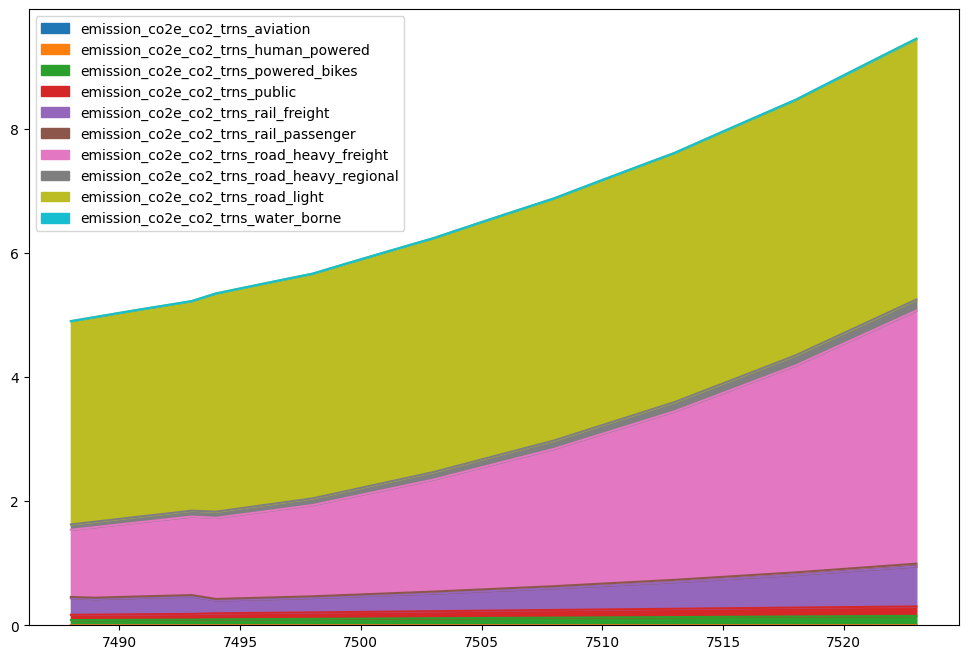

In [6]:
df_plot = df_out[
    df_out["primary_id"].isin([0]) &
    df_out["region"].isin(["guatemala"])
][[x for x in df_out.columns if x.startswith("emission_co2e_co2") and ("trns" in x)]]

fig, ax = plt.subplots(figsize = (12, 8))
df_plot.plot.area(ax = ax)

In [8]:
df_try = df_out[
    df_out["primary_id"].isin([0]) &
    df_out["region"].isin(["brazil"])
];

In [37]:
subsec = "Industrial Energy"
dict_repl = {
    "Carbon Capture and Sequestration": "CCSQ",
    "Stationary Combustion and Other Energy": "SCOE"
}

for subsec in ["Carbon Capture and Sequestration", "Industrial Energy", "Stationary Combustion and Other Energy", "Transportation"]:
    #sisepuede.model_attributes.get_standard_variables(
    #    df_try,
        #"Energy Demand by Fuel in Industrial Energy"
    #    "Energy Consumption from Transportation"
    #)
    
    snm = dict_repl.get(subsec, subsec)
    
    vl_1 = sisepuede.model_attributes.build_varlist(
        subsec, f"Energy Consumption from {snm}"
    )
    vl_2 = sisepuede.model_attributes.build_varlist(
        "Energy Fuels", f"Energy Demand by Fuel in {snm}"
    )
    
    print(subsec)
    print("-"*len(subsec) + "\n")
    
    str_print = " +\n".join(vl_1) + "\n = \n" + " +\n".join(vl_2) + "\n\n\n"
    
    print(str_print)



Carbon Capture and Sequestration
--------------------------------

energy_consumption_ccsq_direct_air_capture
 = 
energy_demand_enfu_subsector_total_pj_ccsq_fuel_biofuels +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_biogas +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_biomass +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_coal +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_coke +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_diesel +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_electricity +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_gas_furnace +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_gas_petroleum_liquid +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_gasoline +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_geothermal +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_hydrogen +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_hydropower +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_kerosene +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_nat

In [17]:
df_out[
    (df_out["time_period"] == 35) &
    (df_out["primary_id"] == 0)
][["primary_id", "region", "energy_demand_enfu_subsector_total_pj_inen_fuel_coal"]]




,primary_id,region,energy_demand_enfu_subsector_total_pj_inen_fuel_coal
35,0,argentina,229.046741
971,0,brazil,1260.032978
1907,0,chile,121.707515
2843,0,colombia,355.019806
3779,0,costa_rica,41.374175
4715,0,dominican_republic,83.226304
5651,0,ecuador,61.921287
6587,0,el_salvador,26.714798
7523,0,guatemala,94.181011
8459,0,honduras,38.230958


In [10]:
df_out[df_out["time_period"] == 35][["primary_id", "region", "energy_demand_enfu_subsector_total_pj_trns_fuel_electricity"]]

,primary_id,region,energy_demand_enfu_subsector_total_pj_trns_fuel_electricity
35,0,argentina,2.422414
71,5005,argentina,2.422414
107,6006,argentina,2.422414
143,7007,argentina,2.422414
179,8008,argentina,2.422414
...,...,...,...
15767,25025,uruguay,0.169664
15803,26026,uruguay,0.169664
15839,27027,uruguay,0.169664
15875,28028,uruguay,0.169664


In [11]:
dict_check = sisepuede.experimental_manager.dict_future_trajectories["brazil"].dict_sampling_units
#for k in dict_check.keys():
#    if "frac_trns_fuelmix_public_electricity" in dict_check[k].variable_specifications:
#        print(k)
su = dict_check.get(1223)
su.generate_future(0, 1, baseline_future_q = True)
su.variable_specifications

['frac_trns_fuelmix_public_electricity']

In [82]:
baseline_future_q = True

In [12]:
baseline_future_q = True
strat_base = 0
rv = su.uncertainty_ramp_vector
vs = su.variable_specifications[0]

dict_ordered_traj_arrays = su.ordered_trajectory_arrays.get((vs, None))
dict_scalar_diff_arrays = su.scalar_diff_arrays.get((vs, None))
dict_var_info = su.dict_variable_info.get((vs, None))

# order the uniform scaling by the ordered trajectory arrays
vec_unif_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["uniform_scaling_q"], (vs, None))
# gives 1s where we keep standard fanning (using the ramp vector) and 0s where we use uniform scaling
vec_base = 1 - vec_unif_scalar
#
if max(vec_unif_scalar) > 0:
    vec_max_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["max_scalar"], (vs, None))
    vec_min_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["min_scalar"], (vs, None))
    vec_unif_scalar = vec_unif_scalar*(vec_min_scalar + lhs_trial_x*(vec_max_scalar - vec_min_scalar)) if not baseline_future_q else np.ones(vec_unif_scalar.shape)

vec_unif_scalar = np.array([vec_unif_scalar]).transpose()
vec_base = np.array([vec_base]).transpose()

In [13]:
delta_max = dict_scalar_diff_arrays.get("max_tp_end_delta")
delta_min = dict_scalar_diff_arrays.get("min_tp_end_delta")
delta_diff = delta_max - delta_min
delta_val = delta_min + 1*delta_diff

In [14]:
# delta and uniform scalar don't apply if operating under baseline future
delta_vec = 0.0 if baseline_future_q else (rv * np.array([delta_val]).transpose())

arr_out = dict_ordered_traj_arrays.get("data") + delta_vec
arr_out = arr_out*vec_base + vec_unif_scalar*dict_ordered_traj_arrays.get("data")

In [18]:
# get series of strategies
series_strats = list(dict_ordered_traj_arrays.get("id_coordinates")[su.key_strategy])
w = np.where(np.array(series_strats) == strat_base)[0]
# get strategy adjustments
lhs_mult_deltas = 1.0 if baseline_future_q else lhs_trial_l
vec_alt = np.zeros((1, len(su.time_periods)))
array_strat_deltas = np.concatenate(
    [
        su.dict_strategy_info["difference_arrays_by_strategy"].get(x, vec_alt)
        for x in series_strats
    ]
)
#array_strat_deltas = np.concatenate(
#	series_strats.apply(
#		self.dict_strategy_info["difference_arrays_by_strategy"].get,
#		args = (np.zeros((1, len(self.time_periods))), )
#	)
#)*lhs_mult_deltas

array_strat_deltas *= lhs_mult_deltas
arr_out = (array_strat_deltas + arr_out[w, :]) if (len(w) > 0) else arr_out

In [20]:
series_strats

[0, 1, 2, 1001, 2001, 3001, 4001, 5001]

In [121]:
xx = series_strats.apply(
    su.dict_strategy_info["difference_arrays_by_strategy"].get,
    args = (np.zeros((1, len(su.time_periods))), )
)

In [130]:
dict_test = {"this": 5, "that": 9}


In [127]:
# get series of strategies
series_strats = list(dict_ordered_traj_arrays.get("id_coordinates")[su.key_strategy])
w = np.where(np.array(series_strats) == strat_base)[0]
# get strategy adjustments
lhs_mult_deltas = 1.0 if baseline_future_q else lhs_trial_l
vec_alt = np.zeros((1, len(su.time_periods)))
array_strat_deltas = np.concatenate(
    [
        su.dict_strategy_info["difference_arrays_by_strategy"].get(x, vec_alt)
        for x in series_strats
    ]
)



In [112]:
su.dict_strategy_info["difference_arrays_by_strategy"].get(series_strats[1])

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03913043,
        0.07826087, 0.1173913 , 0.15652174, 0.19565217, 0.23478261,
        0.27391304, 0.31304348, 0.35217391, 0.39130435, 0.43043478,
        0.46956522, 0.50869565, 0.54782609, 0.58695652, 0.62608696,
        0.66521739, 0.70434783, 0.74347826, 0.7826087 , 0.82173913,
        0.86086957, 0.9       , 0.9       , 0.9       , 0.9       ,
        0.9       ]])

In [30]:
ft = sisepuede.experimental_manager.dict_future_trajectories["brazil"]
df_try = ft.generate_future_from_lhs_vector(
    None,
    None,
    future_id = 0,
    baseline_future_q = True
)

df_try[df_try["time_period"] == 35][["strategy_id", "time_period"] + [x for x in df_try.columns if x.startswith("frac_trns_fuelmix")]]

,strategy_id,time_period,frac_trns_fuelmix_aviation_electricity,frac_trns_fuelmix_aviation_hydrogen,frac_trns_fuelmix_aviation_kerosene,frac_trns_fuelmix_powered_bikes_electricity,frac_trns_fuelmix_powered_bikes_gasoline,frac_trns_fuelmix_public_biofuels,frac_trns_fuelmix_public_diesel,frac_trns_fuelmix_public_electricity,...,frac_trns_fuelmix_road_heavy_regional_natural_gas,frac_trns_fuelmix_road_light_biofuels,frac_trns_fuelmix_road_light_diesel,frac_trns_fuelmix_road_light_electricity,frac_trns_fuelmix_road_light_gasoline,frac_trns_fuelmix_road_light_hydrogen,frac_trns_fuelmix_water_borne_diesel,frac_trns_fuelmix_water_borne_electricity,frac_trns_fuelmix_water_borne_hydrogen,frac_trns_fuelmix_water_borne_natural_gas
35,0,35,0.0,0.13,0.87,0.03,0.97,0.0,0.83244,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
71,1,35,0.0,0.13,0.87,0.03,0.97,0.0,0.83244,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
107,2,35,0.0,0.13,0.87,0.03,0.97,0.0,0.83244,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
143,1001,35,0.0,0.13,0.87,0.03,0.97,0.0,0.83244,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
179,2001,35,0.0,0.13,0.87,0.03,0.97,0.0,0.83244,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
215,3001,35,0.0,0.13,0.87,0.03,0.97,0.0,0.83244,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
251,3002,35,0.0,0.13,0.87,0.03,0.97,0.0,0.83244,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
287,3003,35,0.0,0.13,0.87,0.03,0.97,0.0,0.83244,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
323,3004,35,0.0,0.13,0.87,0.03,0.97,0.0,0.83244,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
359,3005,35,0.0,0.13,0.87,0.03,0.97,0.0,0.83244,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0


In [13]:
2+2

4

In [31]:
df_try.to_csv(
    os.path.join(sisepuede.file_struct.dir_tmp, "temporary_full_inputs.csv"),
    encoding = "UTF-8",
    index = None
)

In [39]:
df_in = su.df_variable_definitions #if not isinstance(df_in, pd.DataFrame) else df_in
fields_id = su.fields_id #if not isinstance(fields_id, list) else fields_id
field_merge_key = su.primary_key_id_coordinates# if (field_merge_key is None) else field_merge_key
tups_id = set([tuple(x) for x in np.array(df_in[fields_id])])

for tg_type in su.required_tg_specs:
    df_check = df_in[df_in[su.field_variable_trajgroup_type] == tg_type]
    for vs in list(df_check[su.field_variable].unique()):
        tups_id = tups_id & set([tuple(x) for x in np.array(df_check[df_check[su.field_variable] == vs][fields_id])])
#
tups_id = sorted(list(tups_id))
df_scen = pd.DataFrame(tups_id, columns = fields_id)
df_in = pd.merge(df_in, df_scen, how = "inner", on = fields_id)
df_scen[field_merge_key] = range(len(df_scen))
tups_id = sorted(list(tups_id))

3386.0

<AxesSubplot: xlabel='time_period'>

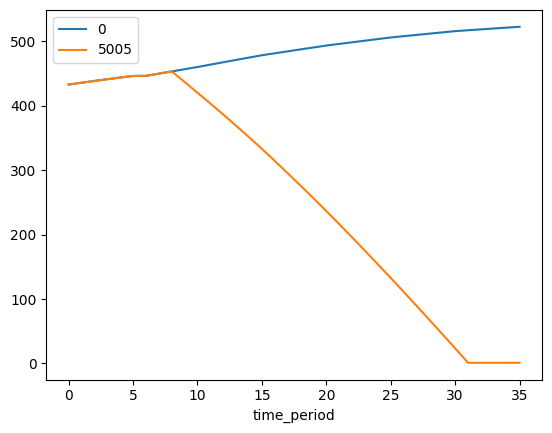

In [7]:
import support_functions as sf
fields = [x for x in df_out.columns if x.startswith("emission_co2e_subsector_total_entc")]
fields = [x for x in df_out.columns if x.startswith("emission_co2e_subsector_total_trns")]
df_wide = df_out[df_out["region"] == "brazil"][["primary_id", "time_period"] + fields]
df_wide = sf.pivot_df_clean(df_wide, ["primary_id"], fields);
df_wide.plot(x = "time_period")


In [24]:
import model_afolu as mafl
import model_ippu as mi
import model_energy as me
import model_circular_economy as mce
import setup_analysis as sa
import importlib
import numpy as np
import os, os.path
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df_input = pd.read_csv("/Users/jsyme/Desktop/df_input_tmp.csv")
df_input["efficfactor_ccsq_heat_energy_direct_air_capture_electricity"] = 0.99

In [106]:
import inspect
#inspect.getmembers(sisepuede.database)
ft = sisepuede.experimental_manager.dict_future_trajectories.get("brazil")
df_input = ft.generate_future_from_lhs_vector(
    None,
    df_row_lhc_sample_l = None,
    future_id = 0,
    baseline_future_q = 0
)

df_input = df_input[df_input["strategy_id"] == 0].reset_index(drop = True).drop(["future_id", "strategy_id"], axis = 1)

In [142]:
df_input.to_csv("/Users/jsyme/Desktop/df_input_tmp.csv", index = None, encoding = "UTF-8")

In [21]:
df_input = pd.read_csv("/Users/jsyme/Desktop/df_input_tmp.csv")

In [392]:
import ordered_direct_product_table as odpt
importlib.reload(odpt)  
            
    
    

vit = odpt.OrderedDirectProductTable(
    {"strategy_id": list(range(100)), "future_id": list(range(1000)), "design_id": [0, 1, 2, 3], "time_series_id": [0, 1, 2]},
    ["design_id", "time_series_id", "strategy_id", "future_id"],
    key_primary = "primary_id"
)


In [399]:
vit.get_dims_from_key(596, return_type = "dict")

{'design_id': 0, 'time_series_id': 0, 'strategy_id': 0, 'future_id': 596}

In [376]:
import time
t0 = time.time()

df1 = vit.get_indexing_dataframe(key_values = {"future_id": list(range(4000)), "strategy_id": [0, 5, 99]}, keys_return = ["primary_id"])

sf.get_time_elapsed(t0, n_digits = 5)

1.41068

In [401]:
vit.get_indexing_dataframe(key_values = {"future_id": list(range(5)), "strategy_id": [0, 5, 99]}, keys_return = ["primary_id"])




['primary_id']


,primary_id
0,0
1,1
2,2
3,3
4,4
...,...
175,1199000
176,1199001
177,1199002
178,1199003


In [332]:
#vit.get_indexing_dataframe(key_values = rands)
vit.get_key_value(**{"design_id": 3, "time_series_id": 0, "strategy_id": 98, "future_id": 71672})

99871672

In [346]:
#vit.get_key_value(**{"design_id": 3, "time_series_id": 0, "strategy_id": 98, "future_id": 71672})





get_dims_from_key(99871672, return_type = "dict")

{'design_id': 3, 'time_series_id': 0, 'strategy_id': 98, 'future_id': 71672}

In [338]:
99871672%30000000

9871672

In [330]:
#rands = np.random.choice(range(10**8), 3000, replace = False);
60/15
0%1

0

In [ ]:
#
# idea: 
#    0. generate output table of proper shape
#    1. generate dimensional vector
#    2. take subset of that vector
#    3. add to output table
#

In [262]:
vit.cardinality_ordered_reversed
vit.cumulative_dimensional_products_reversed
vit.get_key_value(**{"design_id": 3, "strategy_id": 1, "future_id": 0})



0
1
0
3


6400000

In [47]:
key = "this"
def func(**kwargs):
    for k in kwargs.keys():
        val = kwargs.get(k)
        print(f"{k}:\t{val}")
        
func(**{"strategy_id": 0, "primary_id": 2})

strategy_id:	0
primary_id:	2


In [25]:
importlib.reload(sa)
importlib.reload(me)

model_energy = me.NonElectricEnergy(sa.model_attributes)
model_afolu = mafl.AFOLU(sa.model_attributes)
model_ippu = mi.IPPU(sa.model_attributes)
model_ce = mce.CircularEconomy(sa.model_attributes)


df_ins = df_input.copy()

# afolu
df_out_afolu = model_afolu.project(df_ins)
df_ins = sa.model_attributes.transfer_df_variables(
    df_ins,
    df_out_afolu,
    model_ce.integration_variables + model_ippu.integration_variables + model_energy.integration_variables_non_fgtv
)

# circular economy
df_out_ce = model_ce.project(df_ins)
df_ins = sa.model_attributes.transfer_df_variables(
    df_ins,
    df_out_ce,
    model_ippu.integration_variables + model_energy.integration_variables_non_fgtv
)

# ippu
if False:
    df_out_ippu = model_ippu.project(df_ins)
    df_ins = sa.model_attributes.transfer_df_variables(
        df_ins,
        df_out_ippu,
        model_energy.integration_variables_non_fgtv
    )

    df_out_energy = model_energy.project(df_ins)



In [95]:
#sa.model_attributes.get_subsector_variables("Carbon Capture and Sequestration")
subsec = "ccsq"

for subsec in ["ccsq", "scoe", "trns", "inen"]:
    check1 = np.array(df_out_energy[
        [x for x in df_out_energy.columns if f"energy_demand_enfu_subsector_total_pj_{subsec}" in x]
    ].sum(axis = 1))

    check2 = np.array(df_out_energy[
        [x for x in df_out_energy.columns if (f"energy_consumption_{subsec}" in x) and ("total" not in x)]
    ].sum(axis = 1))
    
    check3 = np.array(df_out_energy[
        [x for x in df_out_energy.columns if (f"energy_consumption_{subsec}" in x) and ("total" in x)]
    ].sum(axis = 1))
    
    print(f"subsec {subsec}:")
    print(check1 - check2)
    print(check1 - check3)
    print("")

subsec ccsq:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

subsec scoe:
[ 0.00000000e+00 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  2.27373675e-13  2.27373675e-13  0.00000000e+00  2.27373675e-13
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.27373675e-13
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.27373675e-13
  0.00000000e+00 -2.27373675e-13 -2.27373675e-13  0.00000000e+00
 -2.27373675e-13  0.00000000e+00  0.00000000e+00  2.27373675e-13
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
[-2.27373675e-13 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  2.27373675e-13  2.27373675e-13  0

In [63]:
print(subsec)
df_out_energy[
    [x for x in df_out_energy.columns if (f"energy_demand_enfu_subsector_total_pj_{subsec}" in x)]
].sum(axis = 1)

df_out_energy[
    [x for x in df_out_energy.columns if (f"energy_consumption_{subsec}" in x) and ("total" not in x)]
]
df_out_energy[
    [x for x in df_out_energy.columns if (f"energy_demand_enfu_subsector_total_pj_{subsec}" in x)]
]

inen


,energy_demand_enfu_subsector_total_pj_inen_fuel_biofuels,energy_demand_enfu_subsector_total_pj_inen_fuel_biogas,energy_demand_enfu_subsector_total_pj_inen_fuel_biomass,energy_demand_enfu_subsector_total_pj_inen_fuel_coal,energy_demand_enfu_subsector_total_pj_inen_fuel_coke,energy_demand_enfu_subsector_total_pj_inen_fuel_diesel,energy_demand_enfu_subsector_total_pj_inen_fuel_electricity,energy_demand_enfu_subsector_total_pj_inen_fuel_gas_furnace,energy_demand_enfu_subsector_total_pj_inen_fuel_gas_petroleum_liquid,energy_demand_enfu_subsector_total_pj_inen_fuel_gasoline,...,energy_demand_enfu_subsector_total_pj_inen_fuel_hydropower,energy_demand_enfu_subsector_total_pj_inen_fuel_kerosene,energy_demand_enfu_subsector_total_pj_inen_fuel_natural_gas,energy_demand_enfu_subsector_total_pj_inen_fuel_nuclear,energy_demand_enfu_subsector_total_pj_inen_fuel_ocean,energy_demand_enfu_subsector_total_pj_inen_fuel_oil,energy_demand_enfu_subsector_total_pj_inen_fuel_other,energy_demand_enfu_subsector_total_pj_inen_fuel_solar,energy_demand_enfu_subsector_total_pj_inen_fuel_waste,energy_demand_enfu_subsector_total_pj_inen_fuel_wind
0,0.0,0.0,2392.550271,1156.498987,977.969437,1.795398,5660.577095,264.509709,0.126464,0.241881,...,0.0,0.0,7676.644206,0.0,0.0,6992.150941,0.0,25.121778,0.0,0.0
1,0.0,0.0,2390.047010,1155.288973,976.932265,1.802197,5654.652551,264.226550,0.126943,0.242797,...,0.0,0.0,7668.603903,0.0,0.0,6984.826270,0.0,25.095494,0.0,0.0
2,0.0,0.0,2387.535988,1154.075208,975.892071,1.801933,5648.705836,263.942613,0.126925,0.242762,...,0.0,0.0,7660.538798,0.0,0.0,6977.479001,0.0,25.069128,0.0,0.0
3,0.0,0.0,2385.017195,1152.857687,974.848951,1.807626,5642.744148,263.657947,0.127326,0.243529,...,0.0,0.0,7652.448915,0.0,0.0,6970.109206,0.0,25.042681,0.0,0.0
4,0.0,0.0,2382.490633,1151.636410,973.803042,1.810135,5636.762524,263.372617,0.127503,0.243867,...,0.0,0.0,7644.334349,0.0,0.0,6962.716958,0.0,25.016152,0.0,0.0
5,0.0,0.0,2379.956288,1150.411371,972.754439,1.848598,5630.782554,263.086672,0.130212,0.249049,...,0.0,0.0,7636.195115,0.0,0.0,6955.302400,0.0,24.989541,0.0,0.0
6,0.0,0.0,2389.686941,1155.114925,976.744397,1.888368,5653.827919,264.166795,0.133013,0.254407,...,0.0,0.0,7667.423370,0.0,0.0,6983.747337,0.0,25.091713,0.0,0.0
7,0.0,0.0,2399.293969,1159.758722,980.671442,1.929625,5676.575460,265.227176,0.135919,0.259965,...,0.0,0.0,7698.247286,0.0,0.0,7011.822795,0.0,25.192587,0.0,0.0
8,0.0,0.0,2408.786445,1164.347148,984.551620,1.972318,5699.052796,266.274868,0.138926,0.265717,...,0.0,0.0,7728.703626,0.0,0.0,7039.563453,0.0,25.292258,0.0,0.0
9,0.0,0.0,2418.167497,1168.881714,988.386211,2.016493,5721.267356,267.310219,0.142038,0.271668,...,0.0,0.0,7758.802431,0.0,0.0,7066.978456,0.0,25.390759,0.0,0.0


In [77]:
import inspect
import time
inspect.getmembers(sisepuede.database.db)

dir_exp = os.path.join(sisepuede.file_struct.dir_out, f"csvs_{sisepuede.analysis_id.id_fs_safe}")
if not os.path.exists(dir_exp):
    os.makedirs(dir_exp, exist_ok = True)
    
t0 = time.time()
for k in sisepuede.database.db.dict_iterative_database_tables:
    
    print(f"Starting table {k}...")
    
    fp_write = os.path.join(dir_exp, f"{k}.csv")
    
    if not os.path.exists(fp_write):
        idt = sisepuede.database.db.dict_iterative_database_tables.get(k)
        tab = idt.read_table()

        tab.to_csv(
            fp_write,
            index = None,
            encoding = "UTF-8"
        ) if (tab is not None) else None
    
    t_elapse = np.round(time.time() - t0, decimals = 4)
    print(f"Table {k} complete at {t_elapse} seconds.\n\n")
    


Starting table ANALYSIS_METADATA...
Table ANALYSIS_METADATA complete at 0.0016 seconds.


Starting table ATTRIBUTE_DESIGN...
Table ATTRIBUTE_DESIGN complete at 0.0017 seconds.


Starting table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES...
Table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES complete at 0.0017 seconds.


Starting table ATTRIBUTE_LHC_SAMPLES_LEVER_EFFECTS...
Table ATTRIBUTE_LHC_SAMPLES_LEVER_EFFECTS complete at 0.0018 seconds.


Starting table ATTRIBUTE_PRIMARY...
Table ATTRIBUTE_PRIMARY complete at 0.0019 seconds.


Starting table ATTRIBUTE_STRATEGY...
Table ATTRIBUTE_STRATEGY complete at 0.0019 seconds.


Starting table MODEL_BASE_INPUT_DATABASE...
Table MODEL_BASE_INPUT_DATABASE complete at 0.002 seconds.


Starting table MODEL_INPUT...
Table MODEL_INPUT complete at 0.0022 seconds.


Starting table MODEL_OUTPUT...
Table MODEL_OUTPUT complete at 23.5008 seconds.




In [64]:
df = sisepuede.database.db.dict_iterative_database_tables.get("MODEL_OUTPUT").read_table();


##  RUBBER AND LEATHER ISSUES

In [ ]:
dict_inputs = sisepuede.generate_scenario_database_from_primary_key(0);


In [30]:
region_check = "brazil"
df_input_check = dict_inputs.get(region_check)
df_output_check = df_out[
    df_out["primary_id"].isin([0]) &
    df_out["region"].isin([region_check])
].reset_index(drop = True)

In [31]:
df_input_check[[x for x in df_input_check.columns if "rubber" in x]].head()

,consumpinit_inen_energy_tj_per_tonne_production_recycled_rubber_and_leather,consumpinit_inen_energy_tj_per_tonne_production_rubber_and_leather,demscalar_ippu_rubber_and_leather,ef_waso_incineration_tonne_n2o_per_tonne_rubber_leather,elasticity_ippu_rubber_and_leather_production_to_gdp,elasticity_waso_msw_to_gdppc_rubber_leather,factor_waso_waste_per_capita_scalar_rubber_leather,frac_inen_energy_recycled_rubber_and_leather_coal,frac_inen_energy_recycled_rubber_and_leather_coke,frac_inen_energy_recycled_rubber_and_leather_diesel,...,frac_waso_recycled_rubber_leather,physparam_waso_k_rubber_leather,prodinit_ippu_recycled_rubber_and_leather_tonne,prodinit_ippu_rubber_and_leather_tonne,qty_ippu_recycled_rubber_and_leather_tonne_cod_per_m3_ww,qty_ippu_rubber_and_leather_tonne_cod_per_m3_ww,scalar_inen_energy_demand_recycled_rubber_and_leather,scalar_inen_energy_demand_rubber_and_leather,vol_ippu_recycled_rubber_and_leather_m3_ww_per_tonne_production,vol_ippu_rubber_and_leather_m3_ww_per_tonne_production
0,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.050828,0.005648,0.000187,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
1,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
2,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
3,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
4,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182


In [32]:
df_input_check[[x for x in df_input_check.columns if "cement" in x]].head()

,consumpinit_inen_energy_tj_per_tonne_production_cement,dem_ippu_average_materials_tonne_per_household_cement,demscalar_ippu_cement,ef_ippu_tonne_co2_per_tonne_production_cement_clinker,elasticity_ippu_cement_production_to_gdp,frac_inen_energy_cement_coal,frac_inen_energy_cement_coke,frac_inen_energy_cement_diesel,frac_inen_energy_cement_electricity,frac_inen_energy_cement_gas_furnace,...,frac_inen_energy_cement_natural_gas,frac_inen_energy_cement_oil,frac_inen_energy_cement_solar,frac_inen_energy_cement_solid_biomass,frac_ippu_cement_clinker,net_imports_cement_clinker_tonne,prodinit_ippu_cement_tonne,qty_ippu_cement_tonne_cod_per_m3_ww,scalar_inen_energy_demand_cement,vol_ippu_cement_m3_ww_per_tonne_production
0,0.02,3.0,0.995377,0.264371,0.25,0.318215,0.035357,0.059189,0.158820,0.0,...,0.064766,0.276215,0.0,0.028249,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
1,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
2,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
3,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
4,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123


In [28]:
df_input_check[[x for x in df_input_check.columns if ("rubber" in x) and x.startswith("frac_waso")]].head()

,frac_waso_initial_composition_ind_rubber_leather,frac_waso_initial_composition_mun_rubber_leather,frac_waso_recycled_rubber_leather
0,0.0,0.0,0.066
1,0.0,0.0,0.066
2,0.0,0.0,0.066
3,0.0,0.0,0.066
4,0.0,0.0,0.066


In [27]:
import inspect
import sqlalchemy
import sql_utilities as sq
engine = sqlalchemy.create_engine(
    f"sqlite:///{sisepuede.models.fp_nemomod_temp_sqlite_db}"
)



In [43]:
df_iar = sq.sql_table_to_df(
    engine,
    "InputActivityRatio"
    #"InputActivityRatio"
)
df_oar = sq.sql_table_to_df(
    engine,
    "OutputActivityRatio"
    #"InputActivityRatio"
)
df_oar

,id,r,t,f,m,y,val
0,1,costa_rica,pp_biogas,fuel_electricity,generate,1000,1.0
1,2,costa_rica,pp_biogas,fuel_electricity,generate,1001,1.0
2,3,costa_rica,pp_biogas,fuel_electricity,generate,1002,1.0
3,4,costa_rica,pp_biogas,fuel_electricity,generate,1003,1.0
4,5,costa_rica,pp_biogas,fuel_electricity,generate,1004,1.0
...,...,...,...,...,...,...,...
967,968,costa_rica,supply_fuel_wind,fuel_wind,generate,1031,1.0
968,969,costa_rica,supply_fuel_wind,fuel_wind,generate,1032,1.0
969,970,costa_rica,supply_fuel_wind,fuel_wind,generate,1033,1.0
970,971,costa_rica,supply_fuel_wind,fuel_wind,generate,1034,1.0


In [2]:
sq.sql_table_to_df(
    engine,
    "FUELS"
    #"InputActivityRatio"
)

NameError: name 'sq' is not defined

In [36]:
engine.table_names()

['AccumulatedAnnualDemand',
 'AnnualEmissionLimit',
 'AnnualExogenousEmission',
 'AvailabilityFactor',
 'CapacityFactor',
 'CapacityOfOneTechnologyUnit',
 'CapacityToActivityUnit',
 'CapitalCost',
 'CapitalCostStorage',
 'DefaultParams',
 'DepreciationMethod',
 'DiscountRate',
 'EMISSION',
 'EmissionActivityRatio',
 'EmissionsPenalty',
 'FUEL',
 'FixedCost',
 'InputActivityRatio',
 'InterestRateStorage',
 'InterestRateTechnology',
 'LTsGroup',
 'MODE_OF_OPERATION',
 'MinShareProduction',
 'MinStorageCharge',
 'MinimumUtilization',
 'ModelPeriodEmissionLimit',
 'ModelPeriodExogenousEmission',
 'NODE',
 'NodalDistributionDemand',
 'NodalDistributionStorageCapacity',
 'NodalDistributionTechnologyCapacity',
 'OperationalLife',
 'OperationalLifeStorage',
 'OutputActivityRatio',
 'REGION',
 'REMinProductionTarget',
 'RETagTechnology',
 'RampRate',
 'RampingReset',
 'ReserveMargin',
 'ReserveMarginTagFuel',
 'ReserveMarginTagTechnology',
 'ResidualCapacity',
 'ResidualStorageCapacity',
 'STOR

In [16]:
ft = sisepuede.experimental_manager.dict_future_trajectories["brazil"]
df_try = ft.generate_future_from_lhs_vector(
    None,
    None,
    future_id = 0,
    baseline_future_q = True
)

In [38]:
df_try[[
    x for x in df_try.columns if ("aviation" in x)
]];
# occrate in aviation is 
df_try2 = df_try[
    df_try["time_period"].isin([0, 1, 2]) & 
    df_try["strategy_id"].isin([0])
].reset_index(drop = True);

df_try2[[
    x for x in df_try2.columns if ("trde" in x)
]]


,deminit_trde_freight_mt_km,deminit_trde_private_and_public_per_capita_passenger_km,deminit_trde_regional_per_capita_passenger_km,demscalar_trde_freight,demscalar_trde_private_and_public,demscalar_trde_regional,elasticity_trde_mtkm_to_gdp_freight,elasticity_trde_pkm_to_gdppc_private_and_public,elasticity_trde_pkm_to_gdppc_regional
0,1.988759e+06,0.008526,0.005480,1.0,1.0,1.0,1.0,0.14,0.3
1,1.955245e+06,0.008501,0.005401,1.0,1.0,1.0,1.0,0.14,0.3
2,1.955245e+06,0.008501,0.005401,1.0,1.0,1.0,1.0,0.14,0.3


In [25]:
df_check = df_out[
    df_out["region"].isin(["brazil"]) &
    df_out["primary_id"].isin([0])
].reset_index(drop = True)
df_check[[
    x for x in df_check.columns if ("regional" in x) and ("trde" in x)
]]


,dem_trde_regional_passenger_km
0,1.120458e+06
1,1.125540e+06
2,1.130507e+06
3,1.135304e+06
4,1.139856e+06
5,1.144110e+06
6,1.147918e+06
7,1.158527e+06
8,1.169114e+06
9,1.179678e+06


In [36]:
df_check[
    df_check["time_period"].isin([0, 2])
][[
    x for x in df_check.columns if ("emission" in x) and ("trns" in x)
]]

,emission_co2e_ch4_trns_aviation,emission_co2e_ch4_trns_human_powered,emission_co2e_ch4_trns_powered_bikes,emission_co2e_ch4_trns_public,emission_co2e_ch4_trns_rail_freight,emission_co2e_ch4_trns_rail_passenger,emission_co2e_ch4_trns_road_heavy_freight,emission_co2e_ch4_trns_road_heavy_regional,emission_co2e_ch4_trns_road_light,emission_co2e_ch4_trns_water_borne,...,emission_co2e_n2o_trns_human_powered,emission_co2e_n2o_trns_powered_bikes,emission_co2e_n2o_trns_public,emission_co2e_n2o_trns_rail_freight,emission_co2e_n2o_trns_rail_passenger,emission_co2e_n2o_trns_road_heavy_freight,emission_co2e_n2o_trns_road_heavy_regional,emission_co2e_n2o_trns_road_light,emission_co2e_n2o_trns_water_borne,emission_co2e_subsector_total_trns
0,4.865727e-09,0.0,1.978793e-08,0.000002,0.012289,0.000004,0.455738,0.000004,0.000005,0.000139,...,0.0,5.395002e-08,0.000012,0.828718,0.000241,1.586244,0.000032,0.000013,0.000389,95.992430
2,4.909364e-09,0.0,2.004421e-08,0.000002,0.012187,0.000004,0.087895,0.000004,0.000005,0.000138,...,0.0,5.464875e-08,0.000012,0.821786,0.000248,0.578974,0.000033,0.000013,0.000386,47.141113


In [54]:
flds = list(df_try2.columns)#[x for x in df_try2.columns if ("road_heavy_freight" in x)]
fld_check = []

for fld in flds:
    vec = np.array(df_try2[fld])
    v0, v2 = vec[0], vec[2]
    delta = np.abs(vec[2]/vec[0] - 1)
    
    if (delta > 0.05) and (("trns" in fld) or ("trde" in fld)):
        print(f"field '{fld}':\n\tv0:\t{v0}\n\tv2:\t{v2}\n")
        fld_check.append(fld)

field 'frac_trns_fuelmix_public_electricity':
	v0:	0.0014800197335964
	v2:	0.0009078529278256

field 'frac_trns_fuelmix_road_light_diesel':
	v0:	0.0273322508679524
	v2:	0.0291327470632048

field 'frac_trns_fuelmix_road_light_electricity':
	v0:	0.0002244135545786
	v2:	0.000431209084138

